In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [86]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

response = requests.get(url)
html_content = response.text

html_content_io = StringIO(html_content)
tables = pd.read_html(html_content_io)
df = tables[0]
tickers = df['Symbol'].tolist()

print(tickers)

df['Symbol'].to_csv('sp500_tickers.csv', index=False)
print("Tickers saved to sp500_tickers.csv")


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [87]:
data = {}
for ticker in tickers:
    try:
        df = yf.download(ticker, start="2018-01-01", interval="1d")
        df.reset_index(inplace=True)
        df['ticker'] = ticker
        data[ticker] = df
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

non_empty_data = {k: v for k, v in data.items() if not v.empty}

if non_empty_data:
    data = pd.concat(non_empty_data.values())
else:
    data = pd.DataFrame()  # Empty DataFrame if no data was successfully downloaded

data.reset_index(drop=True, inplace=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

$BF.B: possibly delisted; No price data found  (1d 2018-01-01 -> 2024-06-12)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [88]:
data

Date        Open        High         Low       Close   Adj Close  \
0      2018-01-02  197.140472  198.219070  194.657196  197.023407  146.127548   
1      2018-01-03  196.546829  197.098663  195.058533  197.015045  146.121353   
2      2018-01-04  198.160538  200.200668  197.717392  199.590302  148.031357   
3      2018-01-05  199.540131  201.421402  198.779266  201.145493  149.184769   
4      2018-01-08  200.150497  201.454849  199.983276  200.493317  148.701065   
...           ...         ...         ...         ...         ...         ...   
800160 2024-06-05  172.899994  176.729996  172.899994  175.820007  175.820007   
800161 2024-06-06  174.520004  176.899994  173.990005  176.779999  176.779999   
800162 2024-06-07  175.899994  177.119995  175.250000  176.919998  176.919998   
800163 2024-06-10  176.570007  179.759995  176.020004  178.830002  178.830002   
800164 2024-06-11  178.500000  179.000000  177.460007  178.539993  178.539993   

         Volume ticker  
0       3505476    MMM  
1       2623665    MMM  
2       2682748    MMM  
3       2195736    MMM  
4       2235324    MMM  
...         ...    ...  
800160  1870800    ZTS  
800161  2722200    ZTS  
800162  1819400    ZTS  
800163  2506900    ZTS  
800164  1843969    ZTS  

[800165 rows x 8 columns]

In [89]:
# Pivot the data to have dates as rows and tickers as columns with adjusted close prices
data = data.pivot(index='Date', columns='ticker', values='Adj Close')

In [90]:
data

ticker               A        AAL        AAPL        ABBV        ABNB  \
Date                                                                    
2018-01-02   64.520721  51.647564   40.615883   73.593399         NaN   
2018-01-03   66.162399  51.014027   40.608822   74.745018         NaN   
2018-01-04   65.666092  51.335663   40.797440   74.318787         NaN   
2018-01-05   66.715988  51.316174   41.261929   75.612534         NaN   
2018-01-08   66.859138  50.809349   41.108669   74.401054         NaN   
...                ...        ...         ...         ...         ...   
2024-06-05  133.559998  11.620000  195.869995  165.440002  145.779999   
2024-06-06  132.820007  11.430000  194.479996  168.570007  147.000000   
2024-06-07  132.979996  11.500000  196.889999  169.419998  146.660004   
2024-06-10  133.029999  11.490000  193.119995  170.460007  148.070007   
2024-06-11  132.110001  11.280000  207.149994  167.699997  147.750000   

ticker             ABT        ACGL         ACN        ADBE         ADI  ...  \
Date                                                                    ...   
2018-01-02   52.570995   29.433332  139.834564  177.699997   79.776627  ...   
2018-01-03   52.687248   29.459999  140.479965  181.039993   80.766319  ...   
2018-01-04   52.597839   29.570000  142.143387  183.220001   80.677963  ...   
2018-01-05   52.749847   29.453333  143.315918  185.339996   81.004906  ...   
2018-01-08   52.597839   29.456667  144.461182  185.039993   81.146309  ...   
...                ...         ...         ...         ...         ...  ...   
2024-06-05  103.230003   99.680000  291.019989  455.799988  235.679993  ...   
2024-06-06  104.269997  100.080002  291.739990  458.130005  237.410004  ...   
2024-06-07  107.580002  100.570000  288.399994  465.429993  234.770004  ...   
2024-06-10  107.489998  100.580002  290.429993  459.940002  235.369995  ...   
2024-06-11  105.809998   99.580002  294.220001  462.690002  236.300003  ...   

ticker             WTW         WY        WYNN        XEL         XOM  \
Date                                                                   
2018-01-02  134.380692  27.040955  152.771881  39.708061   62.133781   
2018-01-03  136.894821  27.278423  151.116776  39.442299   63.354099   
2018-01-04  138.284348  27.056274  151.934998  39.134991   63.441780   
2018-01-05  139.171158  27.017979  152.948532  38.860920   63.390625   
2018-01-08  138.421570  27.194164  150.912201  39.151608   63.675602   
...                ...        ...         ...        ...         ...   
2024-06-05  253.610001  29.450001   93.360001  55.160000  113.120003   
2024-06-06  254.520004  29.760000   92.480003  54.820000  113.970001   
2024-06-07  255.490005  29.360001   93.139999  54.740002  112.750000   
2024-06-10  255.619995  29.370001   92.870003  55.240002  113.080002   
2024-06-11  257.209991  29.139999   91.739998  55.040001  112.169998   

ticker             XYL         YUM         ZBH        ZBRA         ZTS  
Date                                                                    
2018-01-02   62.936836   72.576637  114.772141  103.709999   68.611481  
2018-01-03   63.704231   72.514397  115.567757  105.769997   68.926956  
2018-01-04   64.129547   73.252594  115.401237  107.860001   69.338058  
2018-01-05   64.009346   73.679520  116.548386  109.540001   70.131516  
2018-01-08   64.240479   73.804039  116.770416  110.629997   70.972794  
...                ...         ...         ...         ...         ...  
2024-06-05  139.669998  140.529999  112.639999  307.500000  175.820007  
2024-06-06  136.869995  140.830002  113.370003  307.489990  176.779999  
2024-06-07  137.320007  139.970001  113.339996  300.829987  176.919998  
2024-06-10  139.250000  137.809998  112.879997  302.600006  178.830002  
2024-06-11  138.520004  137.009995  109.230003  301.380005  178.539993  

[1621 rows x 501 columns]

In [91]:
data.to_csv('sp500_data.csv')

In [4]:
data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)
data.describe().T.round(3).head(10)

count     mean      std      min      25%      50%      75%      max
A     1621.0  106.961   32.423   58.485   73.280  114.695  133.082  176.085
AAL   1621.0   22.372   10.783    9.040   14.040   17.880   29.561   56.989
AAPL  1621.0  113.560   52.832   34.029   52.972  126.134  160.692  207.150
ABBV  1621.0  103.969   35.552   50.957   72.394   95.018  138.785  180.415
ABNB   880.0  140.992   27.555   82.490  118.457  142.705  161.775  216.840
ABT   1621.0   92.586   20.987   50.558   75.589   99.836  109.049  135.071
ACGL  1621.0   46.506   19.534   22.240   31.137   40.560   55.440  103.360
ACN   1621.0  240.808   71.763  123.693  171.033  249.982  303.553  400.401
ADBE  1621.0  401.587  128.189  177.700  282.130  385.150  496.910  688.370
ADI   1621.0  134.288   39.096   69.785   99.577  141.036  165.042  239.209

In [5]:
data.isnull().values.any()

True

In [6]:
import missingno  # type: ignore
missingno.matrix(data)

ModuleNotFoundError: No module named 'missingno'

In [7]:
#remove all the columns with more than 20% of missing data

print(data.shape) #shape before removing columns
data = data.loc[:, data.isnull().mean() < 0.01] #remove columns 
print(data.shape) #shape after removing columns

(1621, 501)
(1621, 485)


In [8]:
#fill the missing values by the last available value in the column:
data.fillna(method='ffill', inplace=True)

C:\Users\shash\AppData\Local\Temp\ipykernel_18740\1082126189.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [9]:
missingno.matrix(data)

NameError: name 'missingno' is not defined

In [10]:
data.isnull().values.any()

False

In [11]:
data.to_csv('s&p500_data_clean.csv')


In [12]:
data

A        AAL        AAPL        ABBV         ABT  \
Date                                                                    
02-01-2018   64.520721  51.647564   40.615883   73.593399   52.570995   
03-01-2018   66.162399  51.014027   40.608822   74.745018   52.687248   
04-01-2018   65.666092  51.335663   40.797440   74.318787   52.597839   
05-01-2018   66.715988  51.316174   41.261929   75.612534   52.749847   
08-01-2018   66.859138  50.809349   41.108669   74.401054   52.597839   
...                ...        ...         ...         ...         ...   
05-06-2024  133.559998  11.620000  195.869995  165.440002  103.230003   
06-06-2024  132.820007  11.430000  194.479996  168.570007  104.269997   
07-06-2024  132.979996  11.500000  196.889999  169.419998  107.580002   
10-06-2024  133.029999  11.490000  193.119995  170.460007  107.489998   
11-06-2024  132.110001  11.280000  207.149994  167.699997  105.809998   

                  ACGL         ACN        ADBE         ADI        ADM  ...  \
Date                                                                   ...   
02-01-2018   29.433332  139.834564  177.699997   79.776627  33.472794  ...   
03-01-2018   29.459999  140.479965  181.039993   80.766319  33.213963  ...   
04-01-2018   29.570000  142.143387  183.220001   80.677963  33.773376  ...   
05-01-2018   29.453333  143.315918  185.339996   81.004906  33.547935  ...   
08-01-2018   29.456667  144.461182  185.039993   81.146309  33.472794  ...   
...                ...         ...         ...         ...        ...  ...   
05-06-2024   99.680000  291.019989  455.799988  235.679993  61.070000  ...   
06-06-2024  100.080002  291.739990  458.130005  237.410004  61.169998  ...   
07-06-2024  100.570000  288.399994  465.429993  234.770004  61.270000  ...   
10-06-2024  100.580002  290.429993  459.940002  235.369995  61.950001  ...   
11-06-2024   99.580002  294.220001  462.690002  236.300003  61.490002  ...   

                   WTW         WY        WYNN        XEL         XOM  \
Date                                                                   
02-01-2018  134.380692  27.040955  152.771881  39.708061   62.133781   
03-01-2018  136.894821  27.278423  151.116775  39.442299   63.354099   
04-01-2018  138.284347  27.056274  151.934998  39.134991   63.441780   
05-01-2018  139.171158  27.017979  152.948532  38.860920   63.390625   
08-01-2018  138.421570  27.194164  150.912201  39.151608   63.675602   
...                ...        ...         ...        ...         ...   
05-06-2024  253.610001  29.450001   93.360001  55.160000  113.120003   
06-06-2024  254.520004  29.760000   92.480003  54.820000  113.970001   
07-06-2024  255.490005  29.360001   93.139999  54.740002  112.750000   
10-06-2024  255.619995  29.370001   92.870003  55.240002  113.080002   
11-06-2024  257.209992  29.139999   91.739998  55.040001  112.169998   

                   XYL         YUM         ZBH        ZBRA         ZTS  
Date                                                                    
02-01-2018   62.936836   72.576637  114.772141  103.709999   68.611481  
03-01-2018   63.704231   72.514397  115.567757  105.769997   68.926956  
04-01-2018   64.129547   73.252594  115.401237  107.860001   69.338058  
05-01-2018   64.009346   73.679520  116.548386  109.540001   70.131516  
08-01-2018   64.240479   73.804039  116.770416  110.629997   70.972794  
...                ...         ...         ...         ...         ...  
05-06-2024  139.669998  140.529999  112.639999  307.500000  175.820007  
06-06-2024  136.869995  140.830002  113.370003  307.489990  176.779999  
07-06-2024  137.320007  139.970001  113.339996  300.829987  176.919998  
10-06-2024  139.250000  137.809998  112.879997  302.600006  178.830002  
11-06-2024  138.520004  137.009995  109.230003  301.380005  178.539993  

[1621 rows x 485 columns]

In [13]:
data.dropna(inplace=True)
data.replace(0, 1e-10, inplace=True)
data = data.apply(pd.to_numeric)
returns = data.pct_change().mean() * 266
volatility = data.pct_change().std() * np.sqrt(266)
returns = pd.DataFrame({'returns': returns, 'volatility': volatility})
print(returns.head())

       returns  volatility
A     0.162080    0.297546
AAL  -0.078995    0.590943
AAPL  0.319156    0.321000
ABBV  0.173726    0.275831
ABT   0.148595    0.259761


In [14]:
data = returns
len(data)

485

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(data)
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

returns  volatility
A    -0.037322   -0.557946
AAL  -2.153431    2.601144
AAPL  1.341452   -0.305404
ABBV  0.064903   -0.791758
ABT  -0.155693   -0.964783

In [142]:
len(X)


485

# applying clustering algorithms

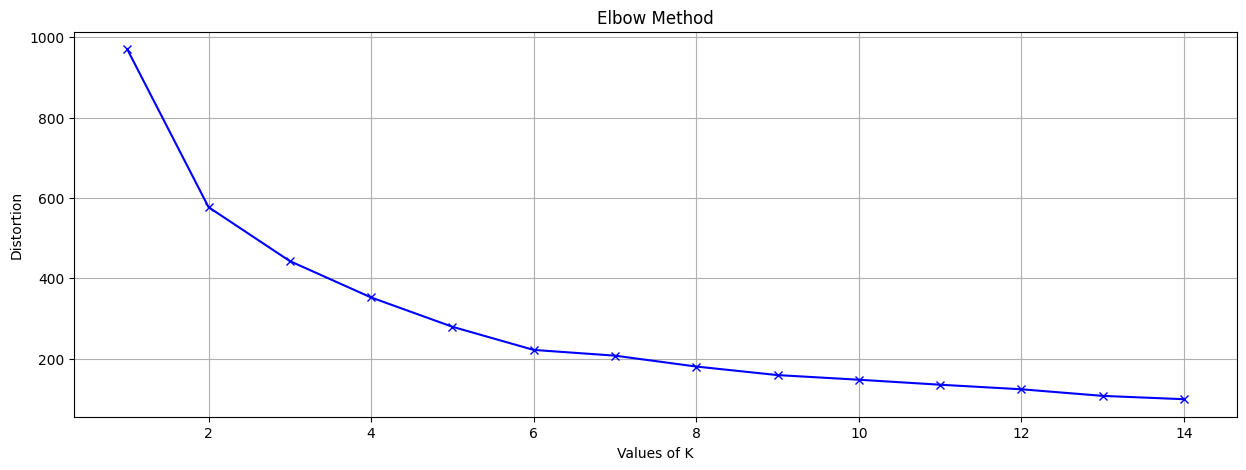

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

 kneed library that finds the optimal number.

In [19]:
from kneed import KneeLocator # type: ignore
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

5

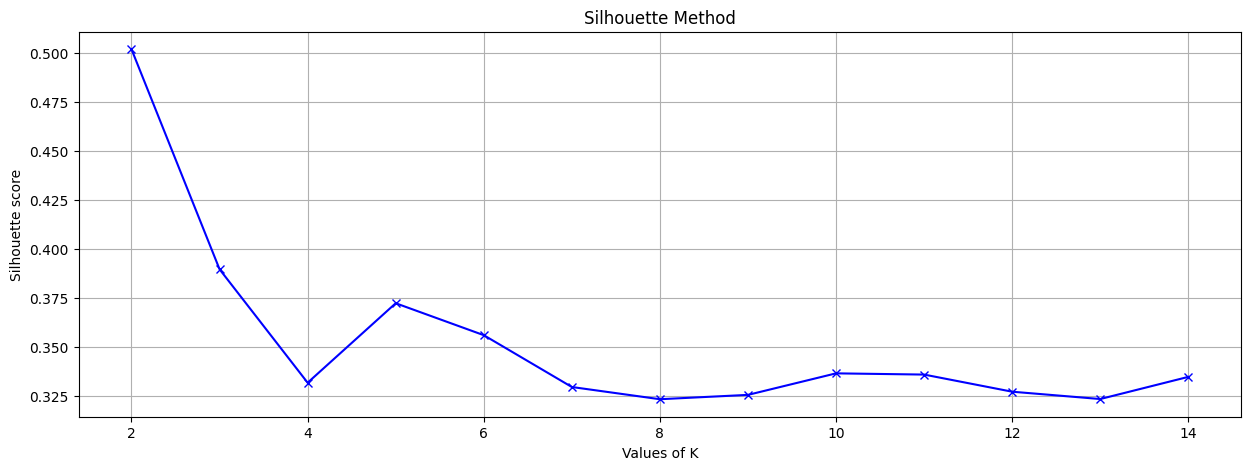

Suggested number of clusters:  4


In [20]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

# k-Means algorithm with 5 clusters.

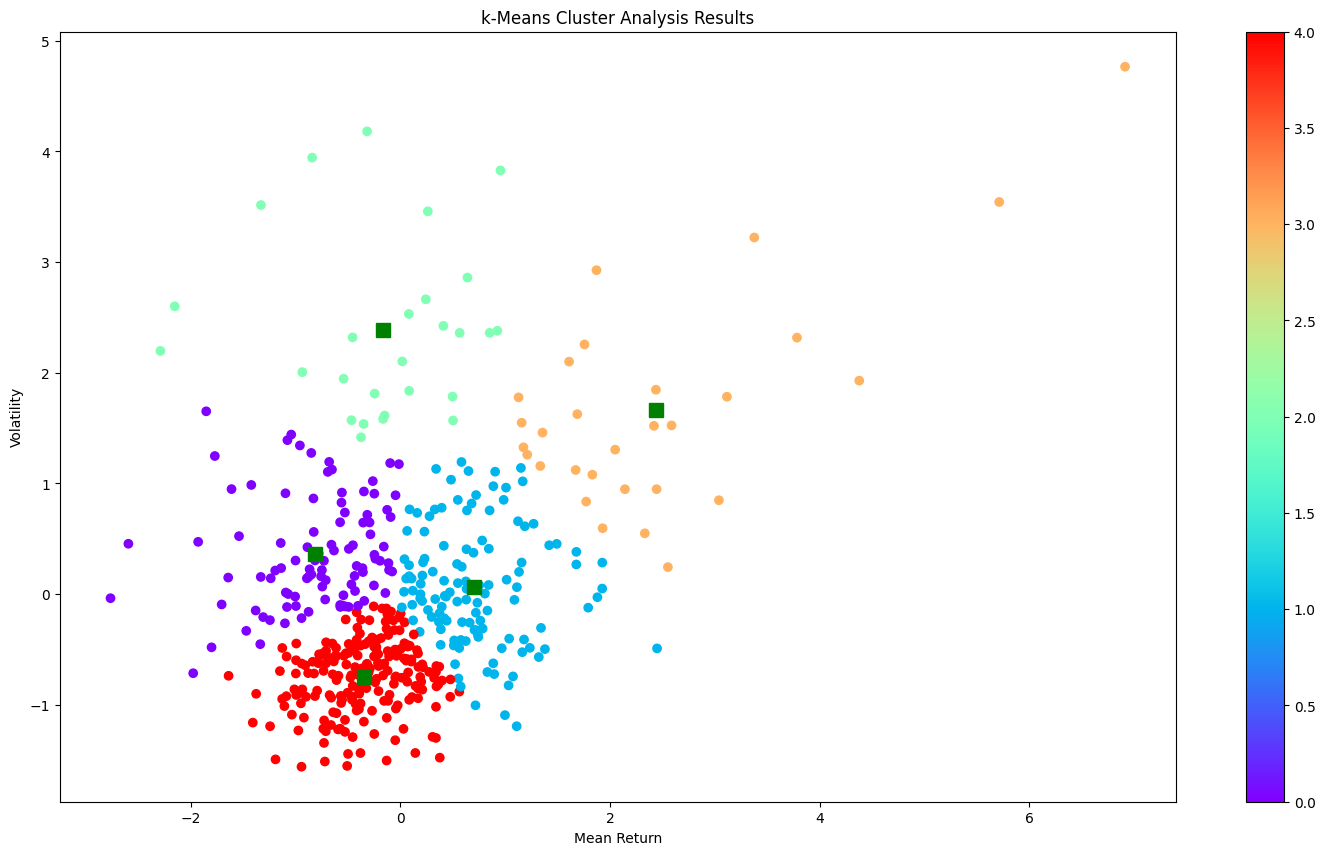

In [21]:
c = 5
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

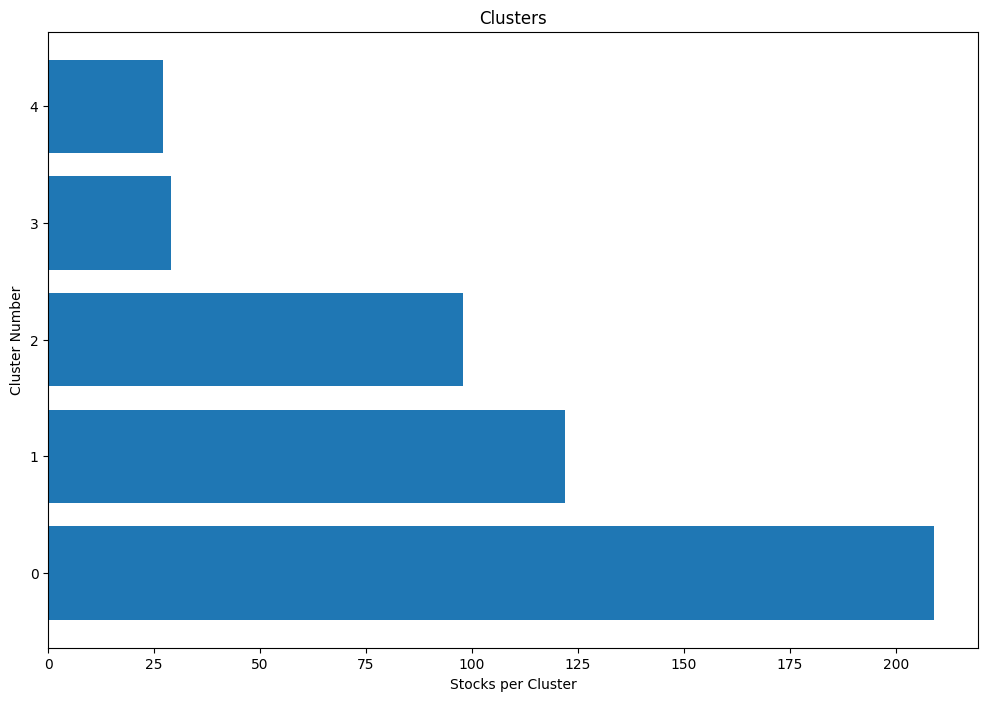

In [22]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()



In [148]:
clustered_series 

A       2
AAL     3
AAPL    2
ABBV    0
ABT     0
       ..
XYL     2
YUM     0
ZBH     0
ZBRA    1
ZTS     2
Length: 485, dtype: int32

# Hierarchical Clustering

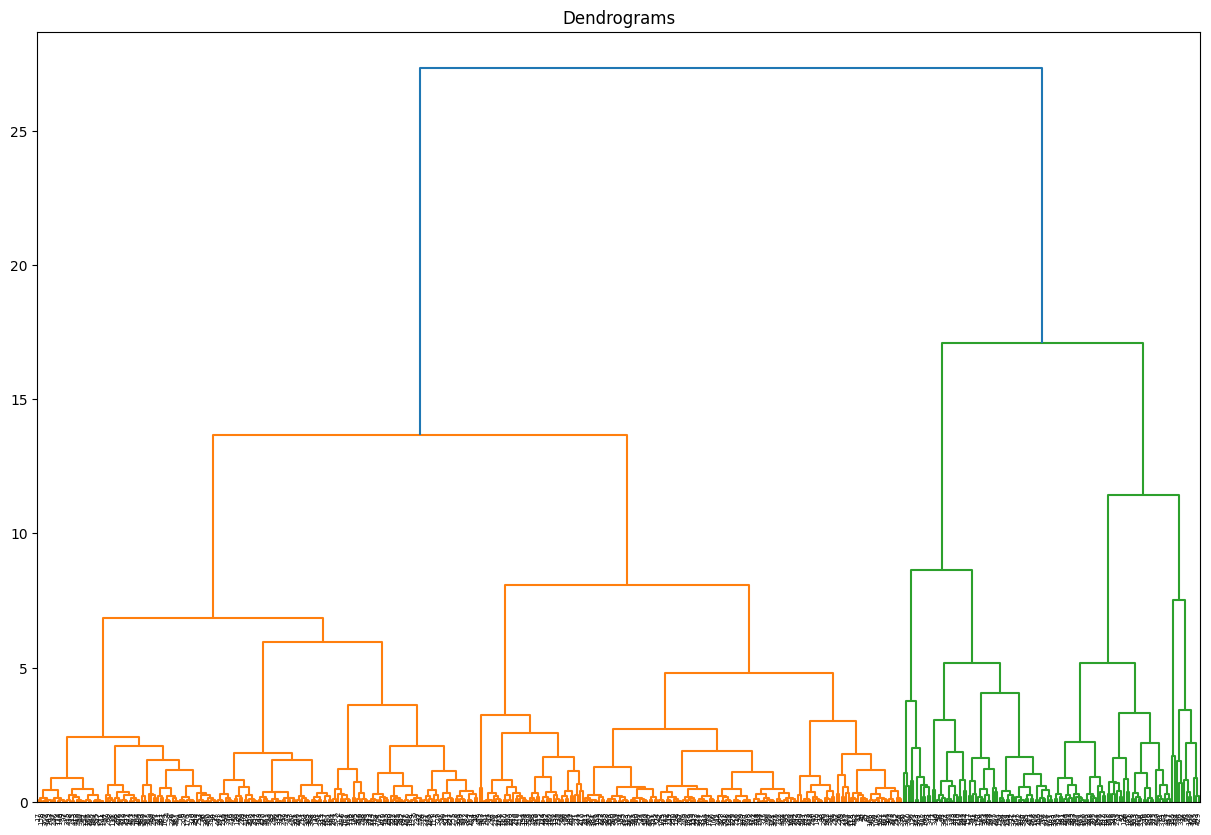

In [23]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

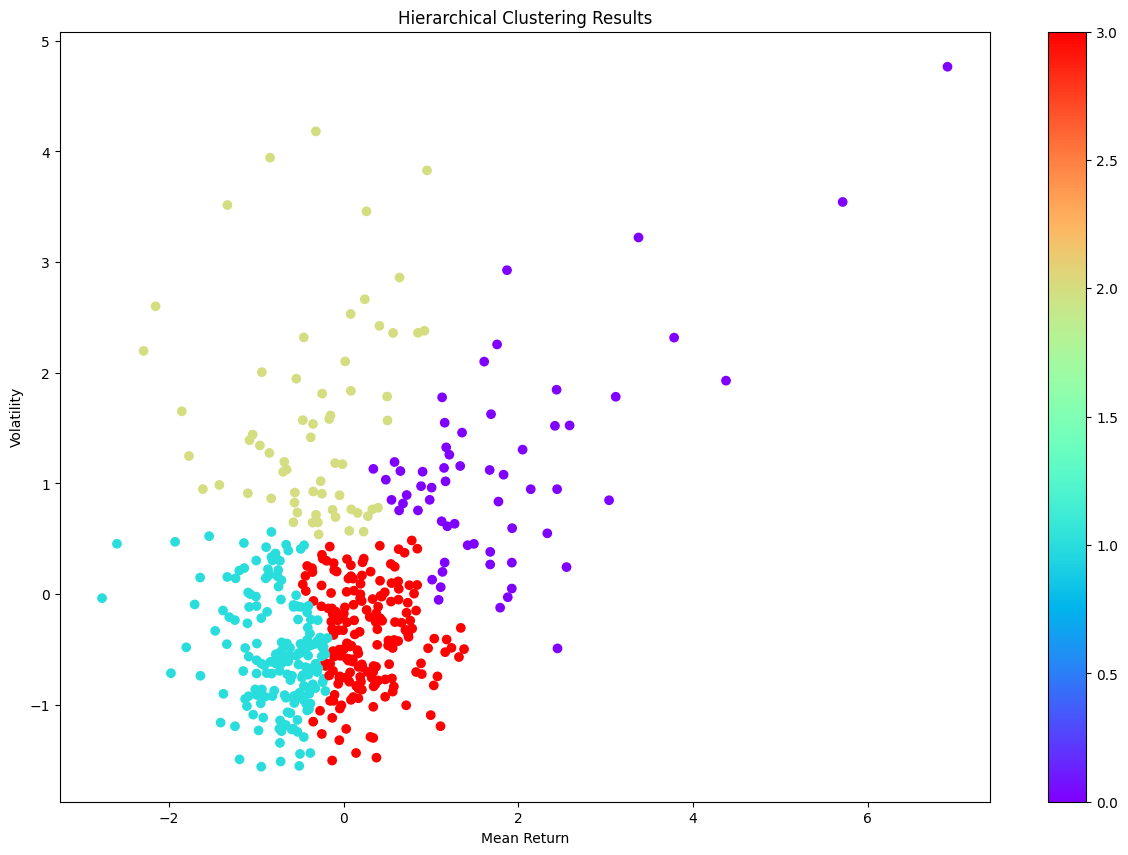

In [24]:
# Fit the model
clusters = 4
hc = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
labels = hc.fit_predict(X)

# Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

# evaluate and compare clustering models

In [25]:
print("k-Means Clustering", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))

k-Means Clustering 0.36855415439820144
Hierarchical Clustering 0.31207565119695496


In [26]:
data1 = pd.read_csv('s&p500_data_clean.csv', index_col='Date', parse_dates=True)


In [27]:
cluster_size_limit = 1000
counts = clustered_series.value_counts() # type: ignore
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())


Number of clusters: 5
Number of Pairs: 69254


In [29]:
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2) # type: ignore
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs


In [30]:
cluster_dict = {}

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data1[tickers])
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)



Number of pairs: 12
In those pairs, we found 16 unique tickers.
[('A', 'DGX'), ('A', 'HON'), ('A', 'IEX'), ('A', 'KDP'), ('A', 'NDAQ'), ('A', 'NSC'), ('A', 'TXN'), ('AAPL', 'LOW'), ('AAPL', 'MCHP'), ('AIG', 'HPE'), ('AAL', 'CCL'), ('AAL', 'NCLH')]


In [31]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

returns  volatility
A    -0.037322   -0.557946
AAL  -2.153431    2.601144
AAPL  1.341452   -0.305404
AIG  -0.248317    0.355198
CCL  -1.330845    3.515824

In [32]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(X_pairs)
X_tsne

array([[  21.396744  ,  -19.068829  ],
       [ -79.365295  ,   82.031105  ],
       [  41.966526  ,   34.640965  ],
       [ -25.922125  ,   42.066402  ],
       [ -86.412926  ,   65.11714   ],
       [  45.789444  ,  -60.481514  ],
       [  28.356543  ,  -70.76966   ],
       [ -12.253264  ,   32.53278   ],
       [  45.48573   ,  -80.39397   ],
       [   0.33691382,  -45.505104  ],
       [  22.346146  ,   20.606817  ],
       [  -4.2448187 ,   58.24029   ],
       [-100.594864  ,   75.162315  ],
       [  -3.5953093 ,  -29.10731   ],
       [  38.232643  ,  -25.586926  ],
       [  19.09793   ,    1.0154138 ]], dtype=float32)

C:\Users\shash\AppData\Local\Temp\ipykernel_18740\3774293952.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');


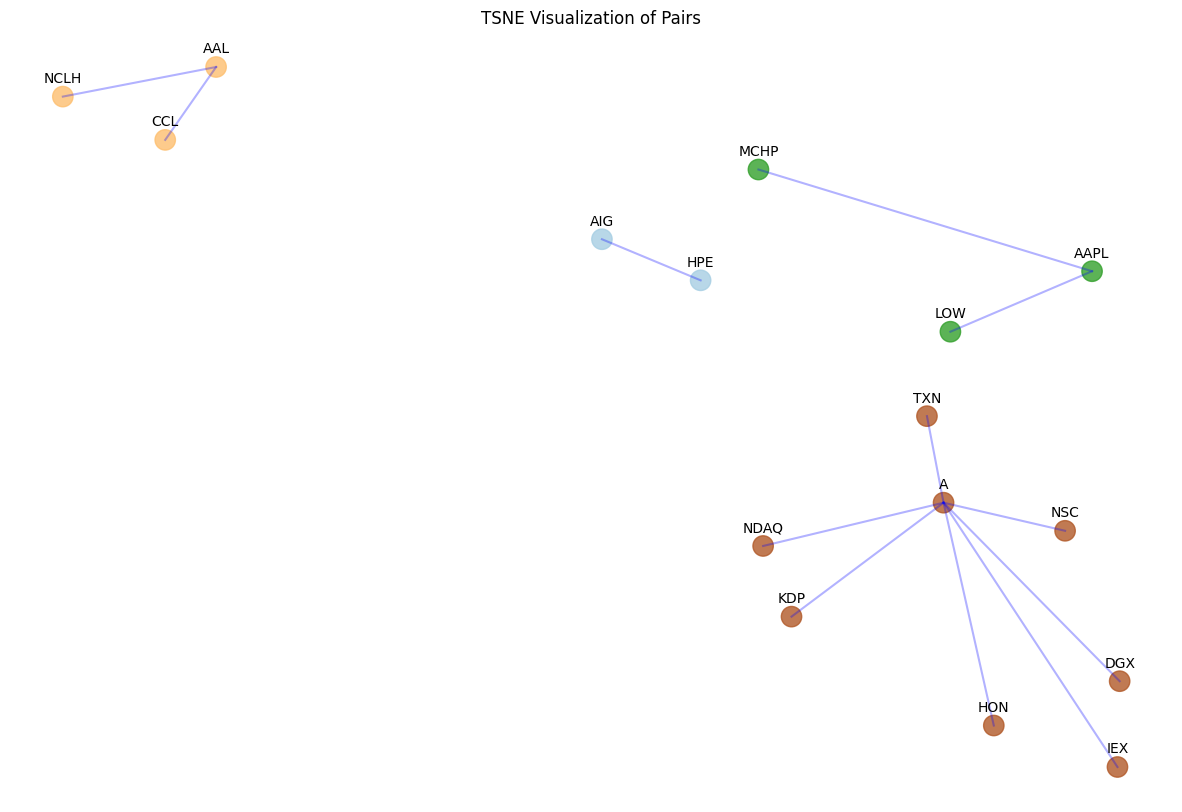

In [33]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()

In [34]:
pairs

[('A', 'DGX'),
 ('A', 'HON'),
 ('A', 'IEX'),
 ('A', 'KDP'),
 ('A', 'NDAQ'),
 ('A', 'NSC'),
 ('A', 'TXN'),
 ('AAPL', 'LOW'),
 ('AAPL', 'MCHP'),
 ('AIG', 'HPE'),
 ('AAL', 'CCL'),
 ('AAL', 'NCLH')]

In [36]:
def plot_zscore(data_sanitized, ticker1, ticker2):
    # Determine the training size (85% of the total data)
    TRAIN = int(len(data_sanitized[ticker1]) * 0.85)
    
    # Training data for each ticker
    ticker1_ts = data_sanitized[ticker1][:TRAIN]
    ticker2_ts = data_sanitized[ticker2][:TRAIN]
    
    # Calculate price ratio (C_ts / AAVE_ts)
    ratios = ticker2_ts / ticker1_ts
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Calculate Z-score
    ratios_mean = np.mean(ratios)
    ratios_std = np.std(ratios)
    ratios_zscore = (ratios - ratios_mean) / ratios_std
    
    # Plot Z-score
    ax.plot(ratios.index, ratios_zscore, label="Z-Score", color='blue')
    
    # Plot reference lines
    ax.axhline(1.0, color="green", linestyle='--', label="Upper Threshold (1.0)")
    ax.axhline(-1.0, color="red", linestyle='--', label="Lower Threshold (-1.0)")
    ax.axhline(0, color="black", linestyle='--', label="Mean")
    
    # Set titles and labels
    ax.set_title(f'{ticker1} / {ticker2}: Price Ratio and Z-Score', fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price Ratio / Z-Score')
    
    # Add legend
    ax.legend()
    
    # Improve layout and display plot
    plt.tight_layout()
    plt.show()


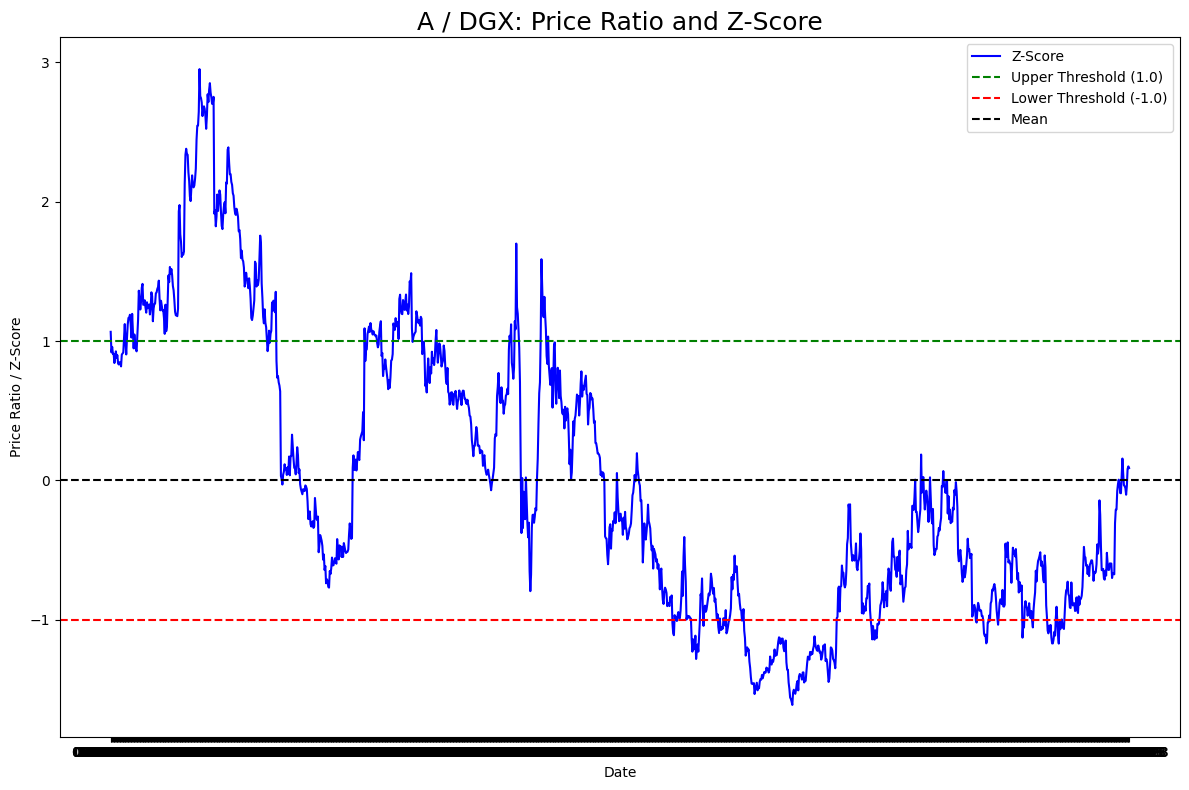

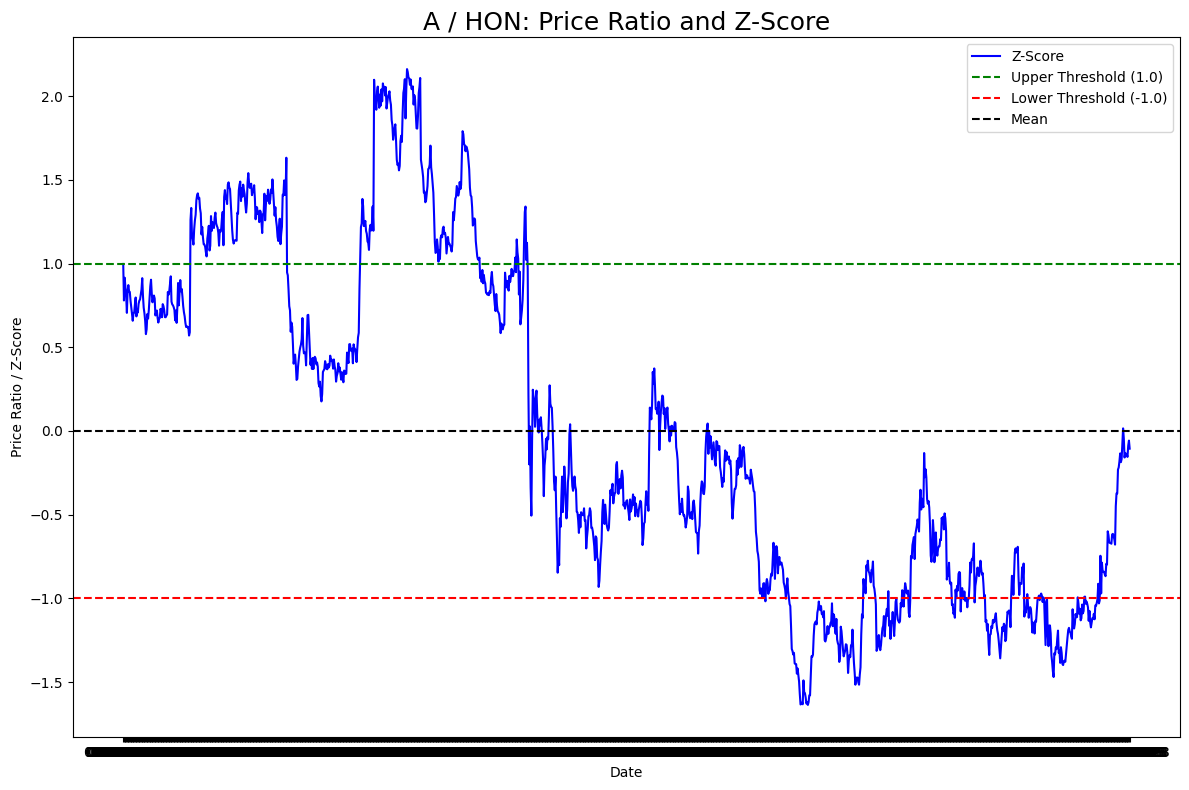

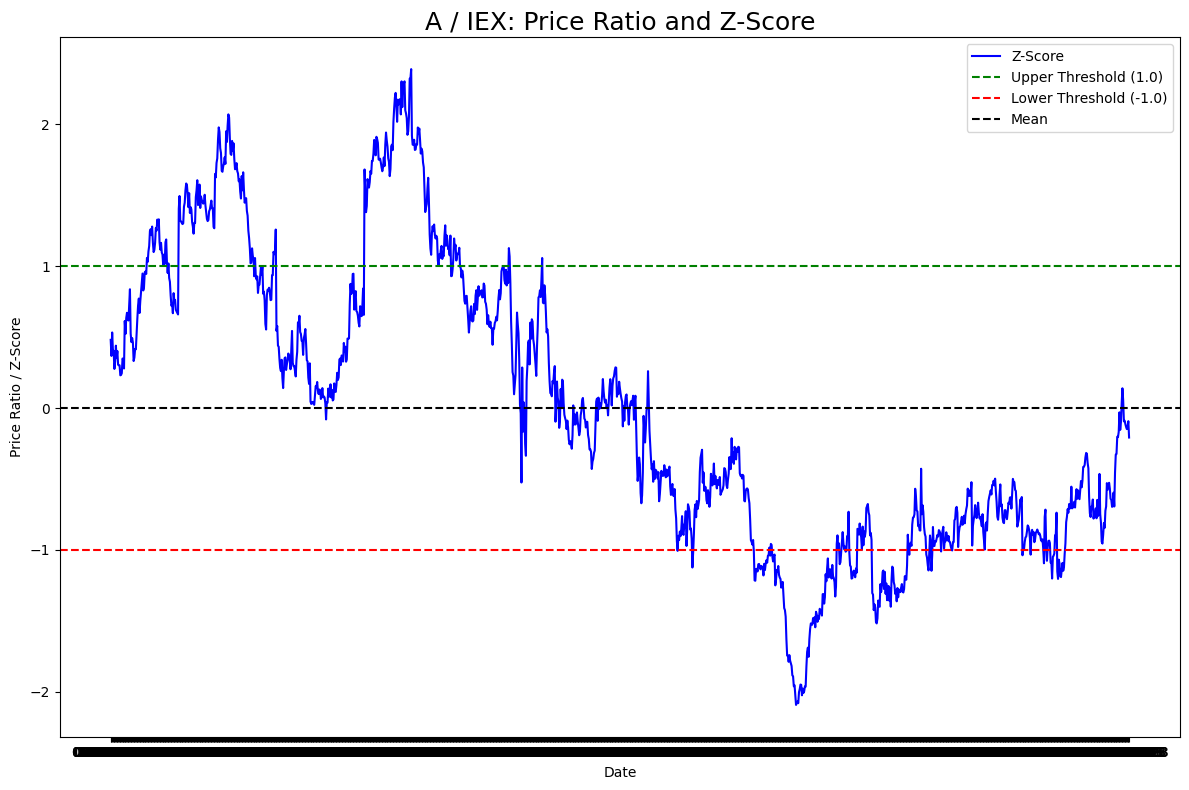

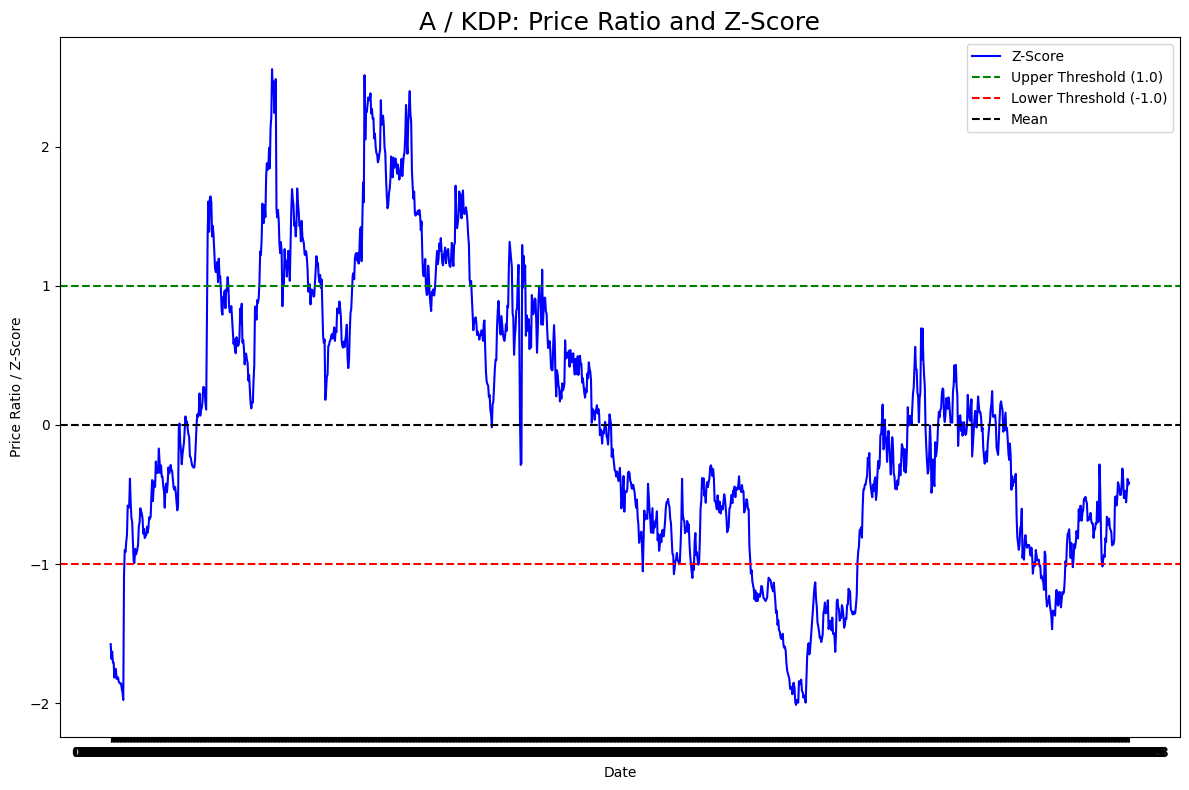

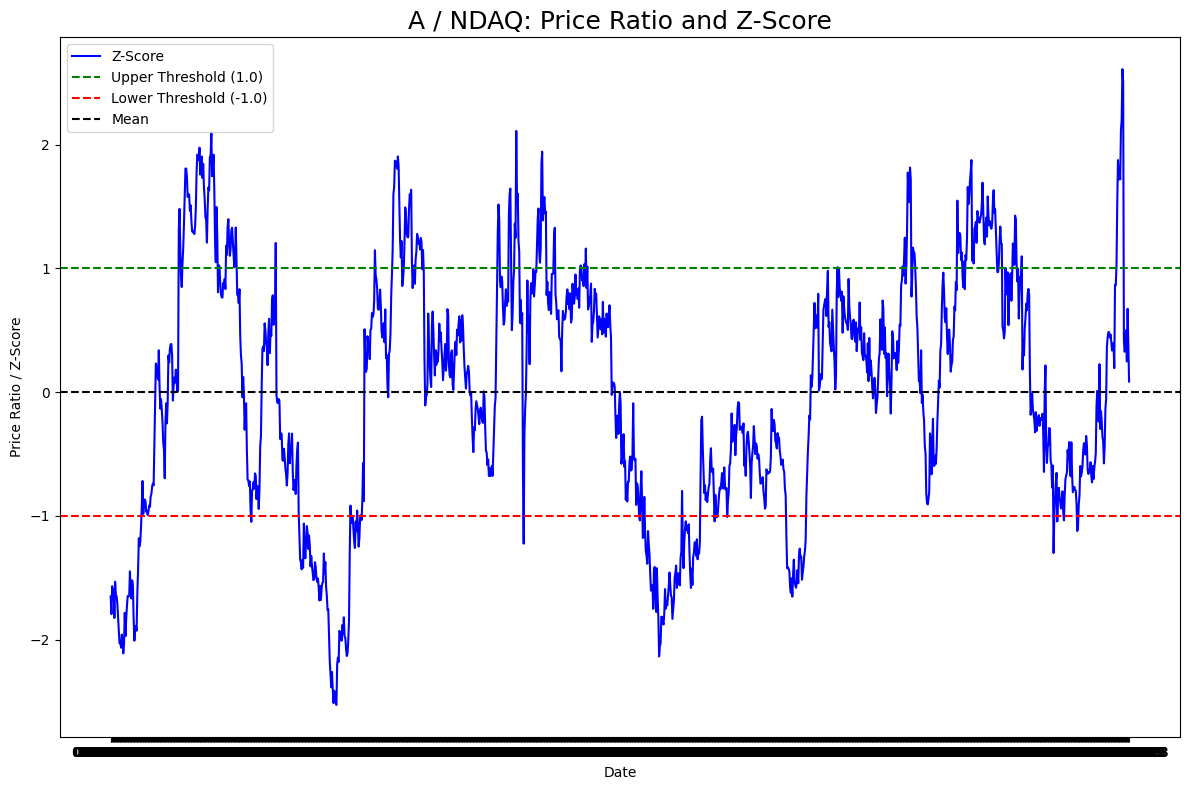

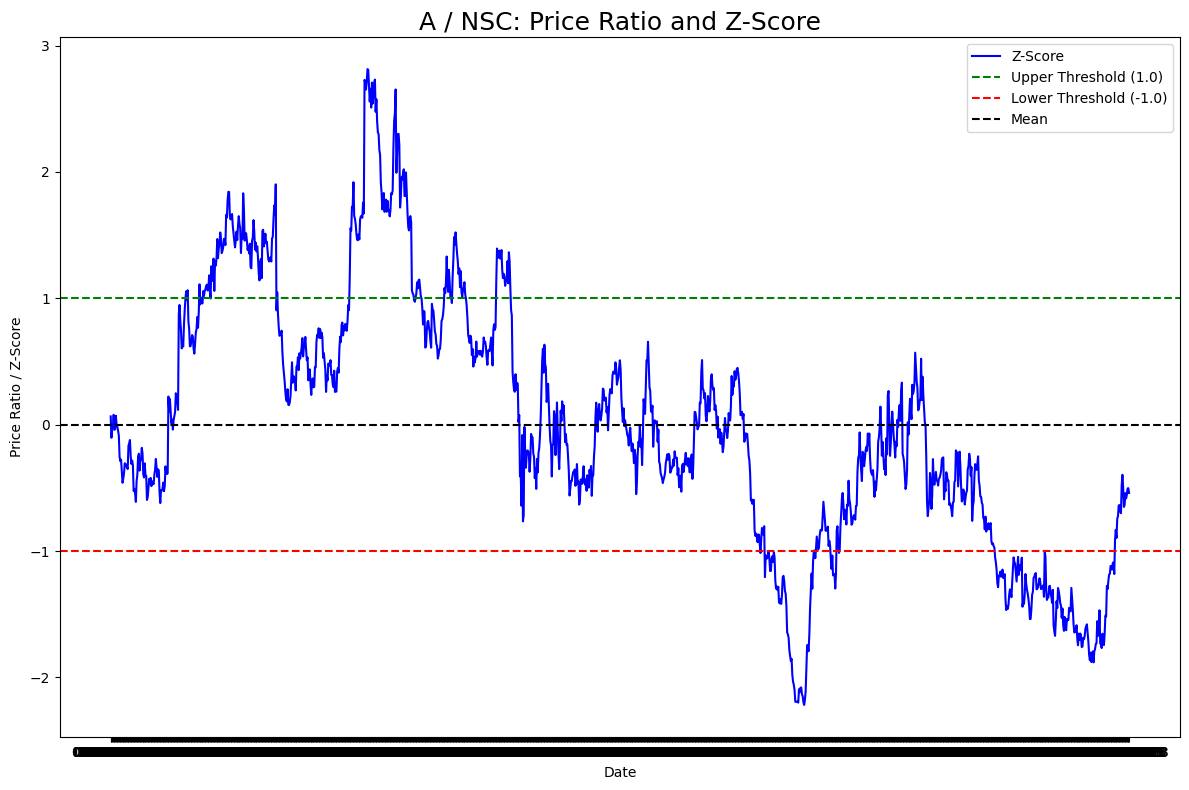

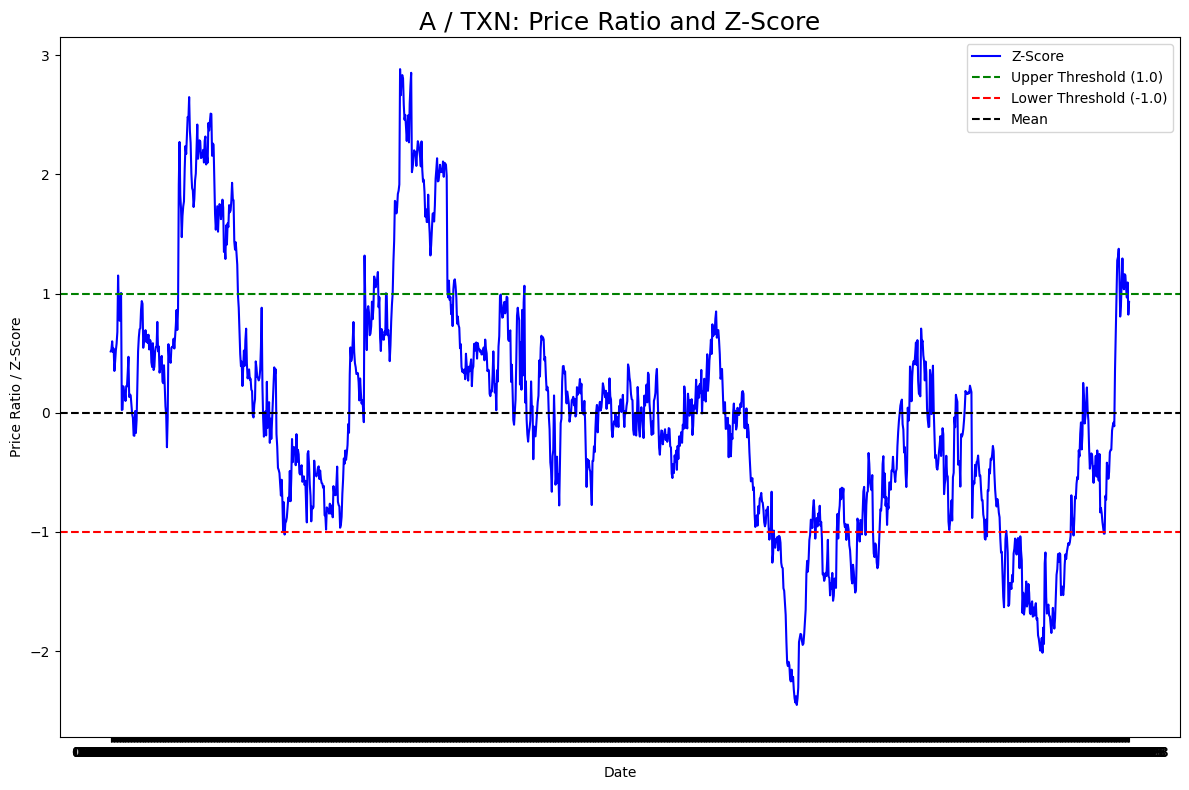

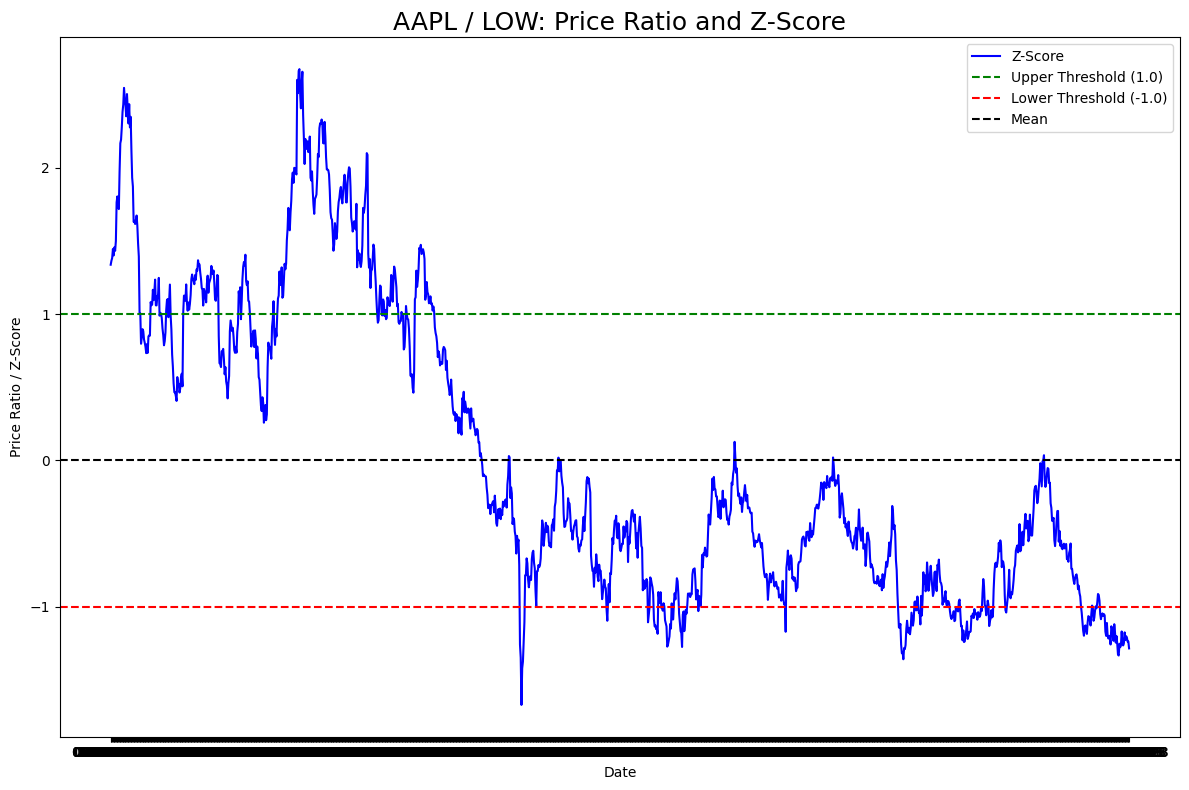

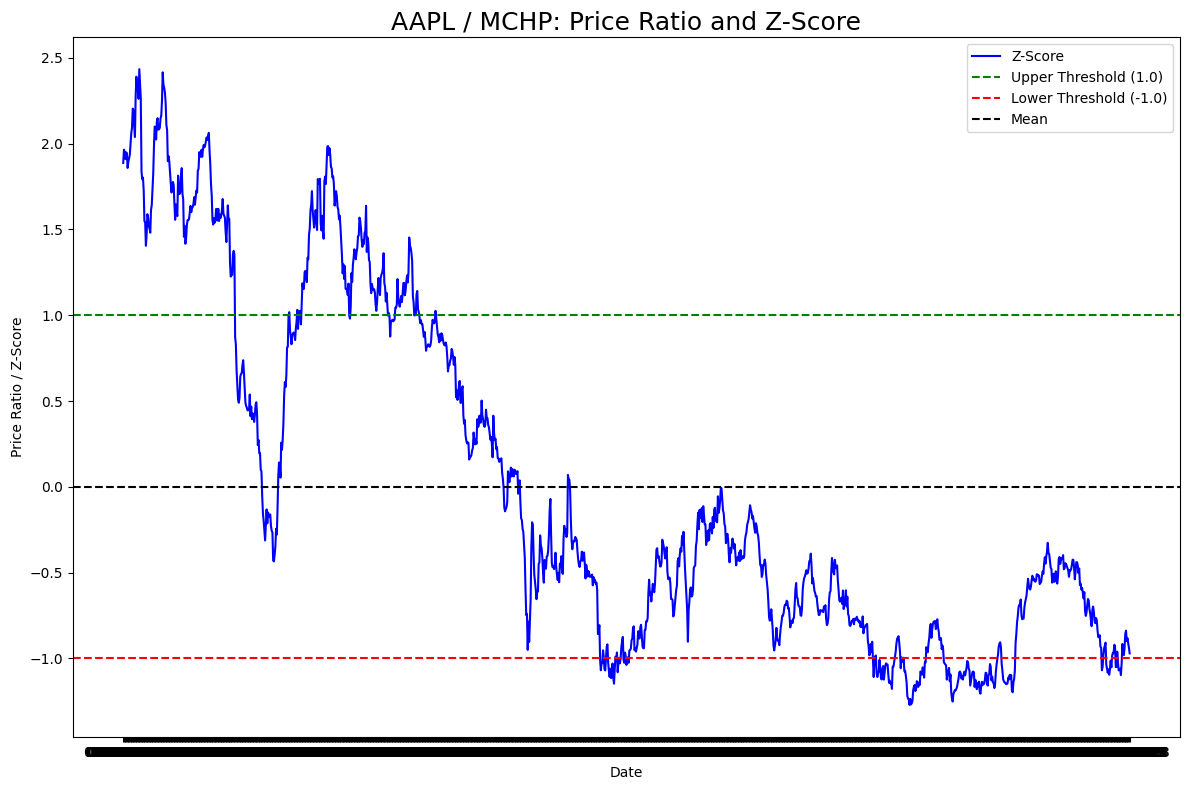

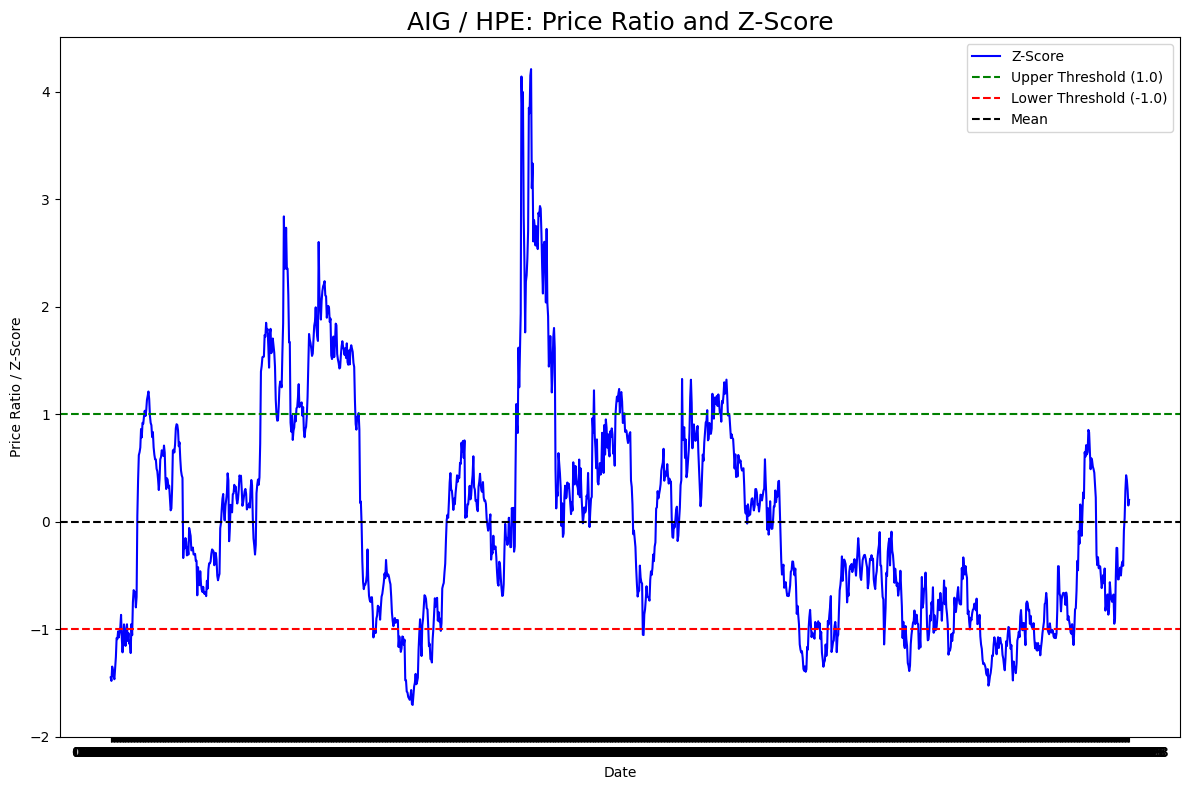

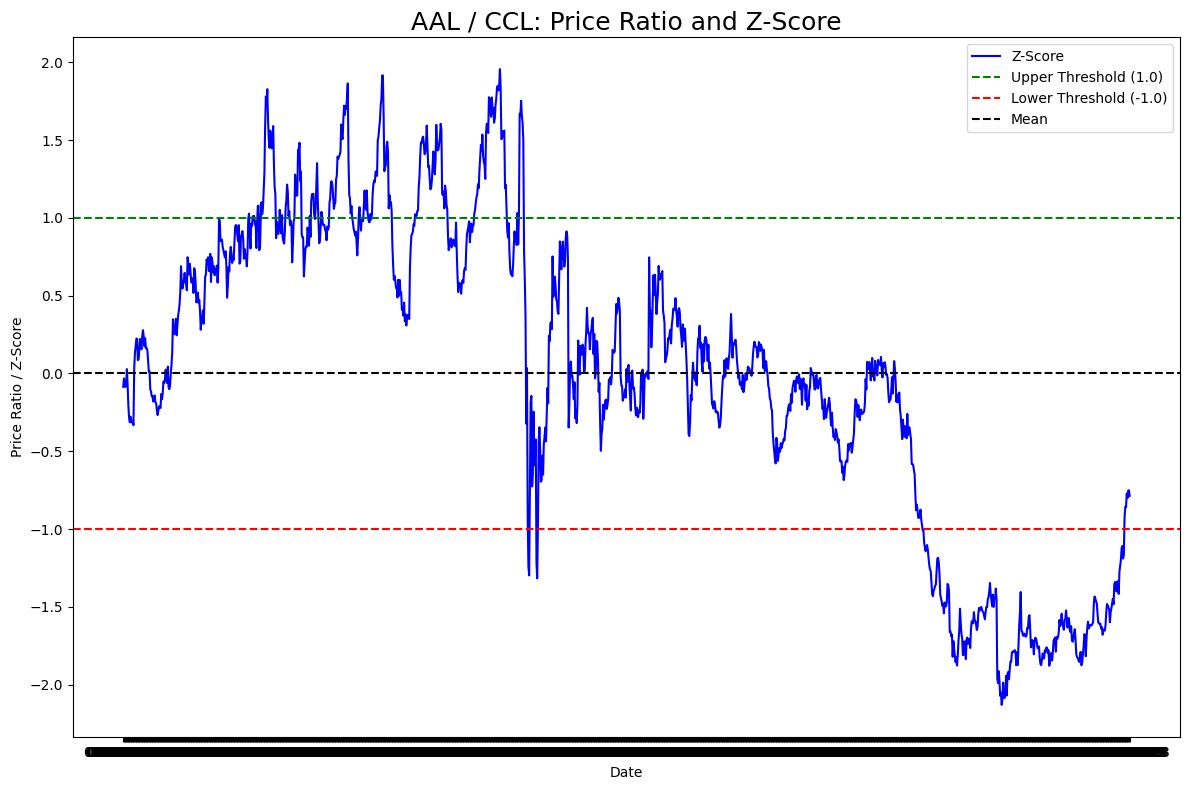

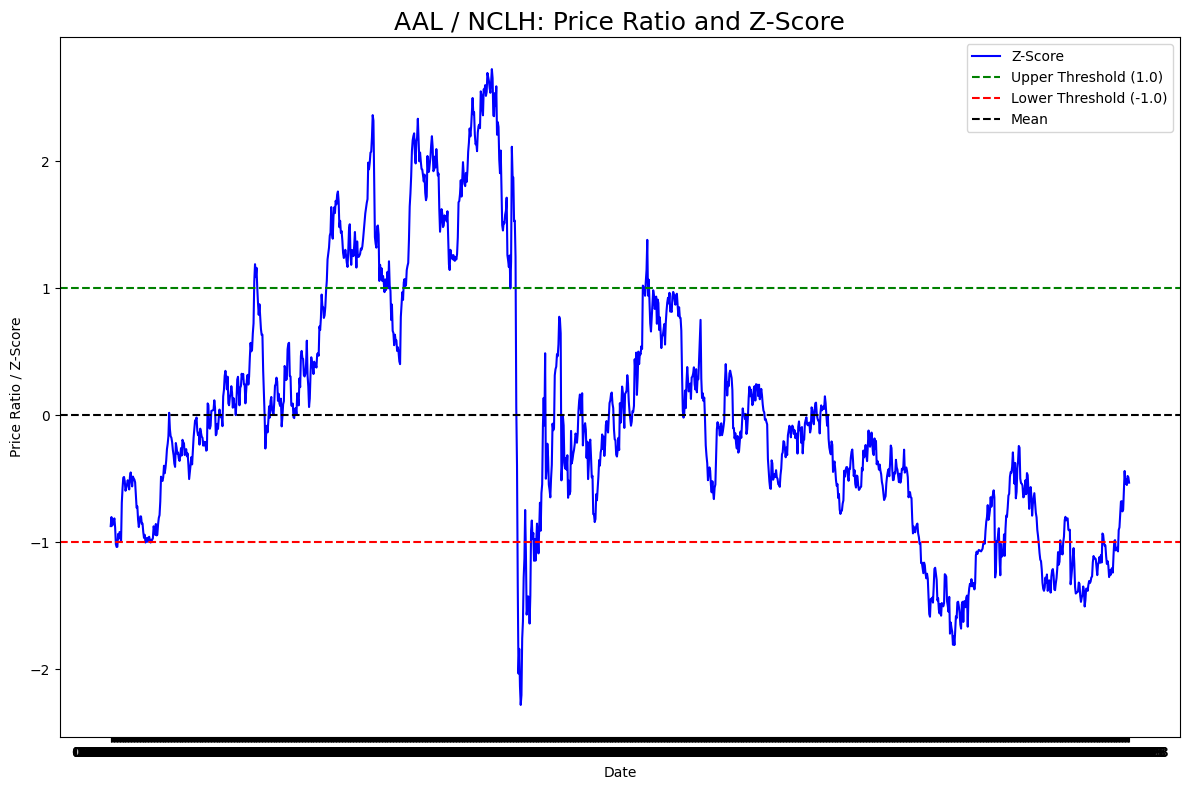

In [37]:
for i in range(0, len(pairs)):
    pair = pairs[i]
    plot_zscore(data1, pair[0], pair[1])

In [56]:
def calculate_profit(signals, prices):
    profit = pd.DataFrame(index=prices.index)
    profit['profit'] = 0.0

    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index

    # Ensure we start with a buy signal
    while len(sells) > 0 and sells[0] < buys[0]:
        sells = sells[1:]

    if len(buys) == 0 or len(sells) == 0:
        return profit

    if len(sells) < len(buys):
        sells = sells.append(pd.Index(prices.tail(1).index))

    buy_prices = prices.loc[buys]
    sell_prices = prices.loc[sells]

    # Ensure buy and sell arrays are of the same length
    min_length = min(len(buy_prices), len(sell_prices))
    buy_prices = buy_prices[:min_length]
    sell_prices = sell_prices[:min_length]

    profit.loc[sells[:min_length], 'profit'] = sell_prices.values - buy_prices.values
    profit['profit'] = profit['profit'].fillna(0)

    profit['cum_profit'] = profit['profit'].cumsum()

    return profit['cum_profit']



def plot_strategy(prices_df, signal_df, profit):
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': (3, 1)},
                                   figsize=(18, 12))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price in $')
    ax1.plot(prices_df.index, prices_df, color='g', lw=0.25)

    ax1.plot(signal_df.loc[signal_df.orders == 1.0].index,
             prices_df[signal_df.orders == 1.0],
             '^', markersize=12, color='blue', label='Buy')
    ax1.plot(signal_df.loc[signal_df.orders == -1.0].index,
             prices_df[signal_df.orders == -1.0],
             'v', markersize=12, color='red', label='Sell')

    ax2.plot(profit.index, profit, color='b')
    ax2.set_ylabel('Cumulative Profit (%)')
    ax2.set_xlabel('Date')

    return ax1, ax2 


def signals_zscore_evolution(ticker1_ts, ticker2_ts, window_size=15, first_ticker=True):
    ratios = ticker1_ts / ticker2_ts
    ratios_mean = ratios.rolling(window=window_size, min_periods=1, center=False).mean()
    ratios_std = ratios.rolling(window=window_size, min_periods=1, center=False).std()
    z_scores = (ratios - ratios_mean) / ratios_std
    buy = ratios.copy()
    sell = ratios.copy()
    if first_ticker:
        buy[z_scores > -1] = 0
        sell[z_scores < 1] = 0
    else:
        buy[z_scores < 1] = 0
        sell[z_scores > -1] = 0
    signals_df = pd.DataFrame(index=ticker1_ts.index)
    signals_df['signal'] = np.where(buy > 0, 1, np.where(sell < 0, -1, 0))
    signals_df['orders'] = signals_df['signal'].diff()
    signals_df.loc[signals_df['orders'] == 0, 'orders'] = None
    return signals_df


def plot_signals_cumu_profit(ticker1, ticker2, data_sanitized):
    AAVE_ts = data_sanitized[ticker1]
    C_ts = data_sanitized[ticker2]
    plt.figure(figsize=(26, 18))

    signals_df1 = signals_zscore_evolution(AAVE_ts, C_ts)
    profit_df1 = calculate_profit(signals_df1, AAVE_ts)
    ax1, _ = plot_strategy(AAVE_ts, signals_df1, profit_df1)

    signals_df2 = signals_zscore_evolution(AAVE_ts, C_ts, first_ticker=False)
    profit_df2 = calculate_profit(signals_df2, C_ts)
    ax2, _ = plot_strategy(C_ts, signals_df2, profit_df2)

    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_title(f'{ticker2} Paired with {ticker1}', fontsize=18)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_title(f'{ticker1} Paired with {ticker2}', fontsize=18)

    plt.figure(figsize=(12, 6))
    cumulative_profit_combined = profit_df1 + profit_df2
    ax2_combined = cumulative_profit_combined.plot(label='Profit%', color='green')
    plt.legend(loc='upper left', fontsize=10)
    plt.title(f'{ticker1} & {ticker2} Paired - Cumulative Profit', fontsize=18)

    plt.tight_layout()
    plt.show()
    
    return cumulative_profit_combined


def portfolio_analysis(ticker1, ticker2, data_sanitized, invested_amount):
    cumulative_profit_combined = plot_signals_cumu_profit(ticker1, ticker2, data_sanitized)
    
    # Calculate final return
    final_cumulative_profit = cumulative_profit_combined.iloc[-1]
    total_return = invested_amount + (invested_amount * final_cumulative_profit / 100)
    
    print(f"Invested Amount: ${invested_amount}")
    print(f"Final Cumulative Profit: {final_cumulative_profit}%")
    print(f"Total Return: ${total_return}")

    return total_return


<Figure size 2600x1800 with 0 Axes>

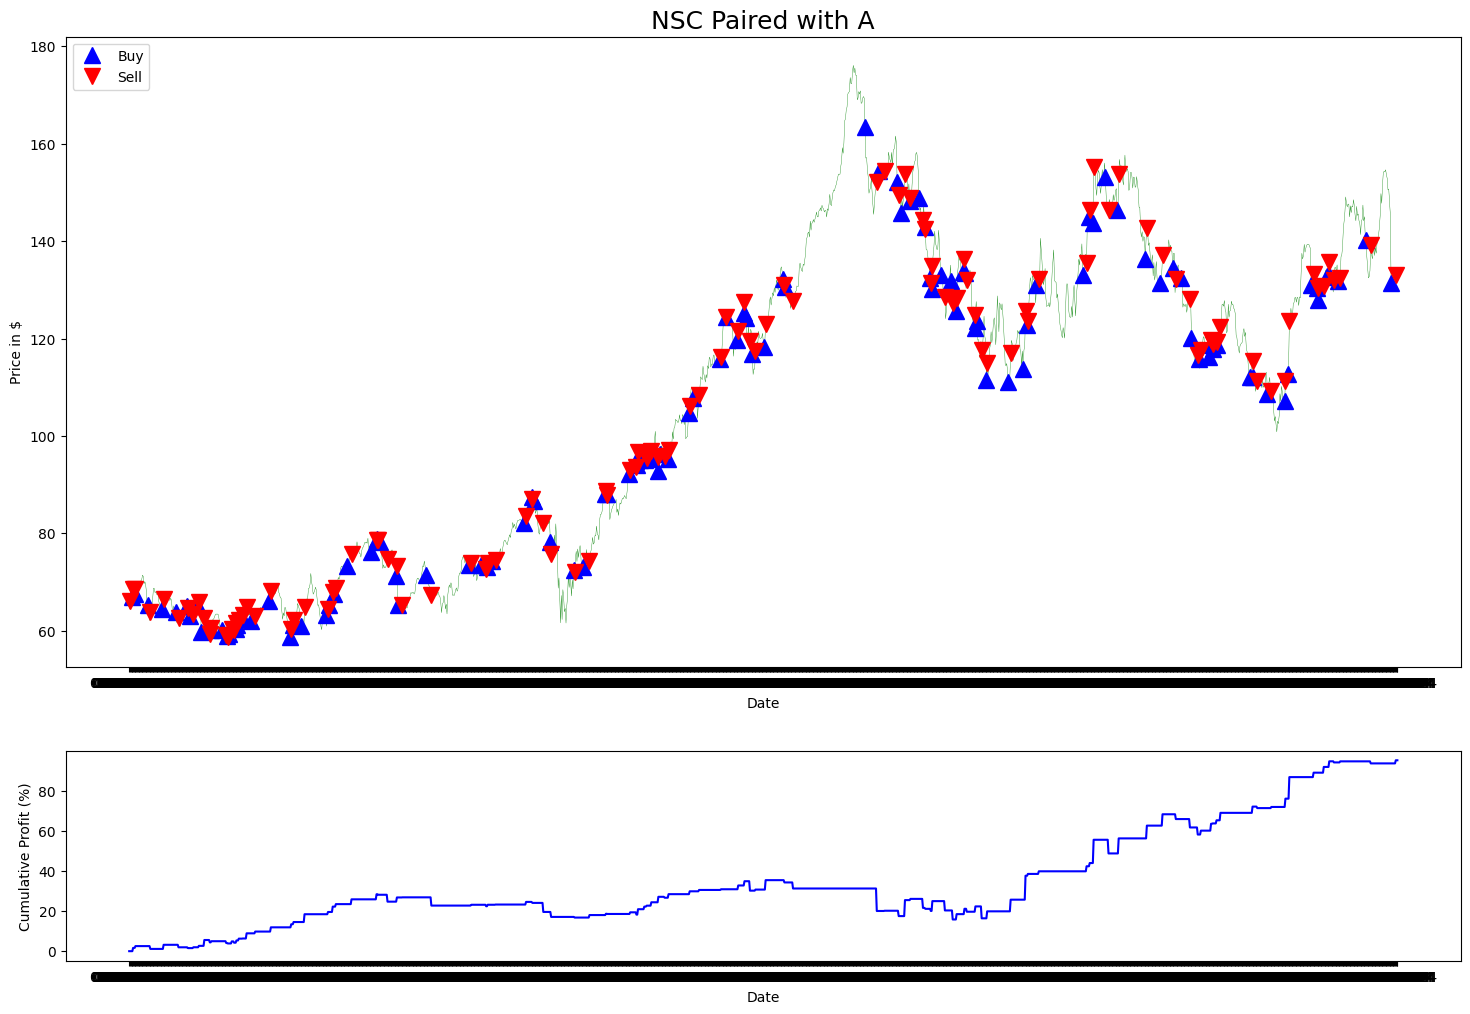

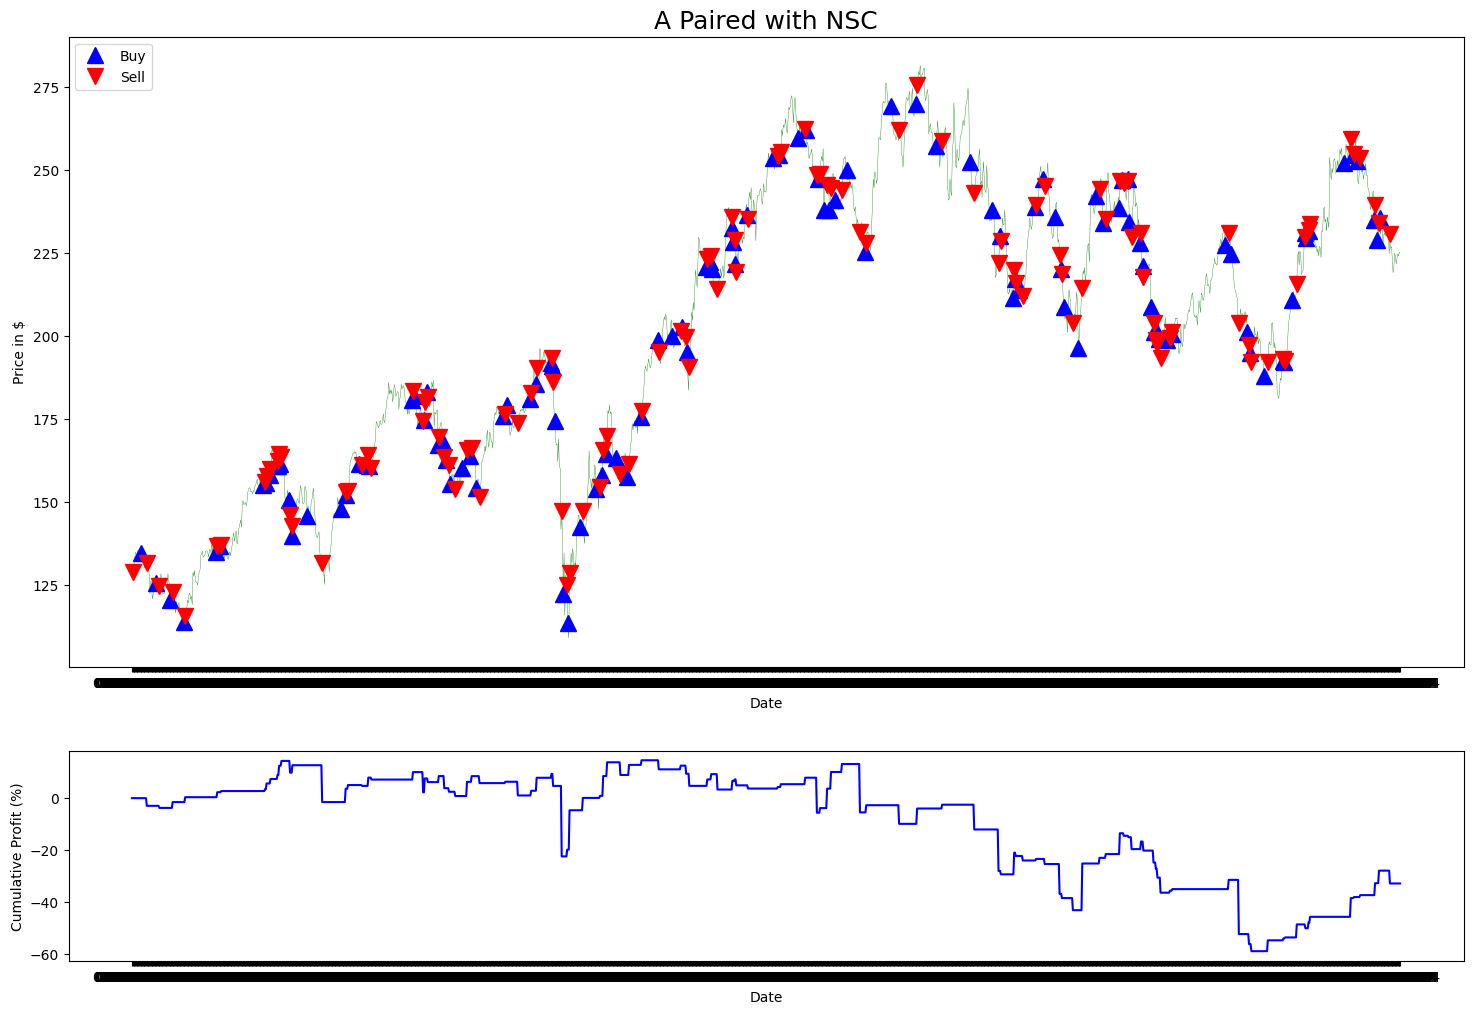

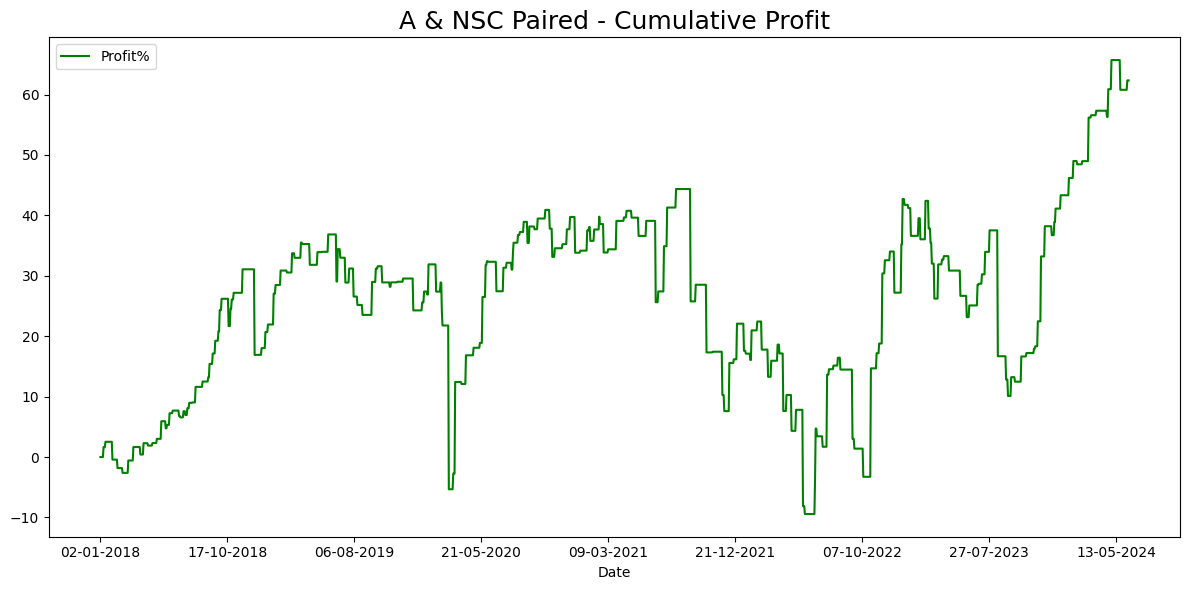

Invested Amount: $10000
Final Cumulative Profit: 62.34172511000004%
Total Return: $16234.172511000004


16234.172511000004

In [57]:
portfolio_analysis('A', 'NSC', data1, 10000)

<Figure size 2600x1800 with 0 Axes>

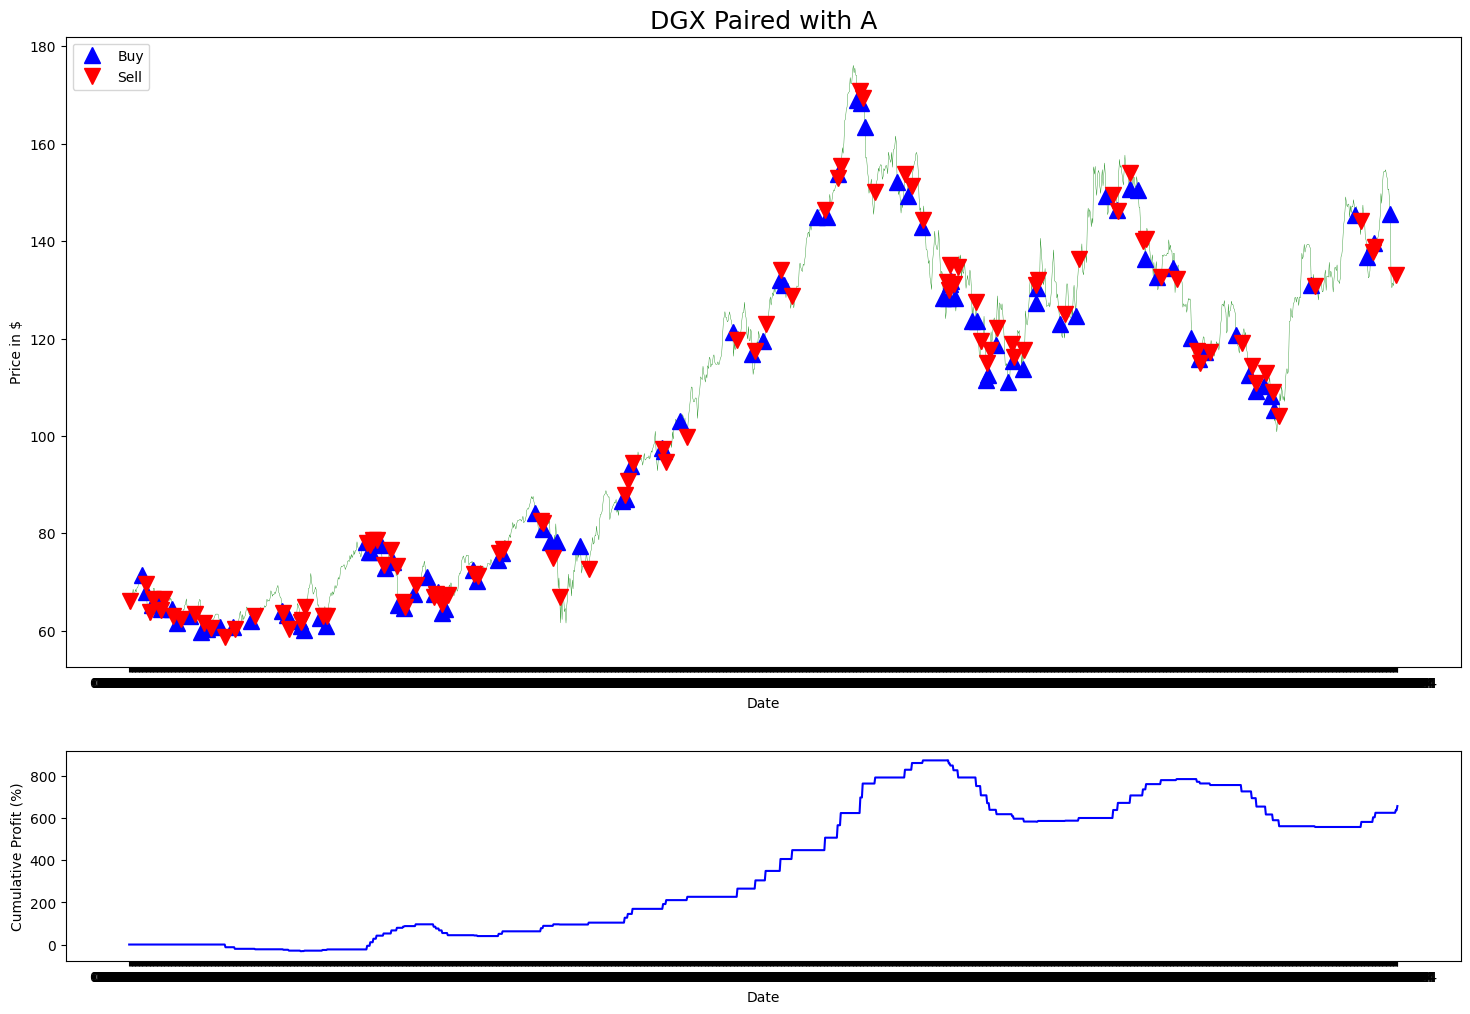

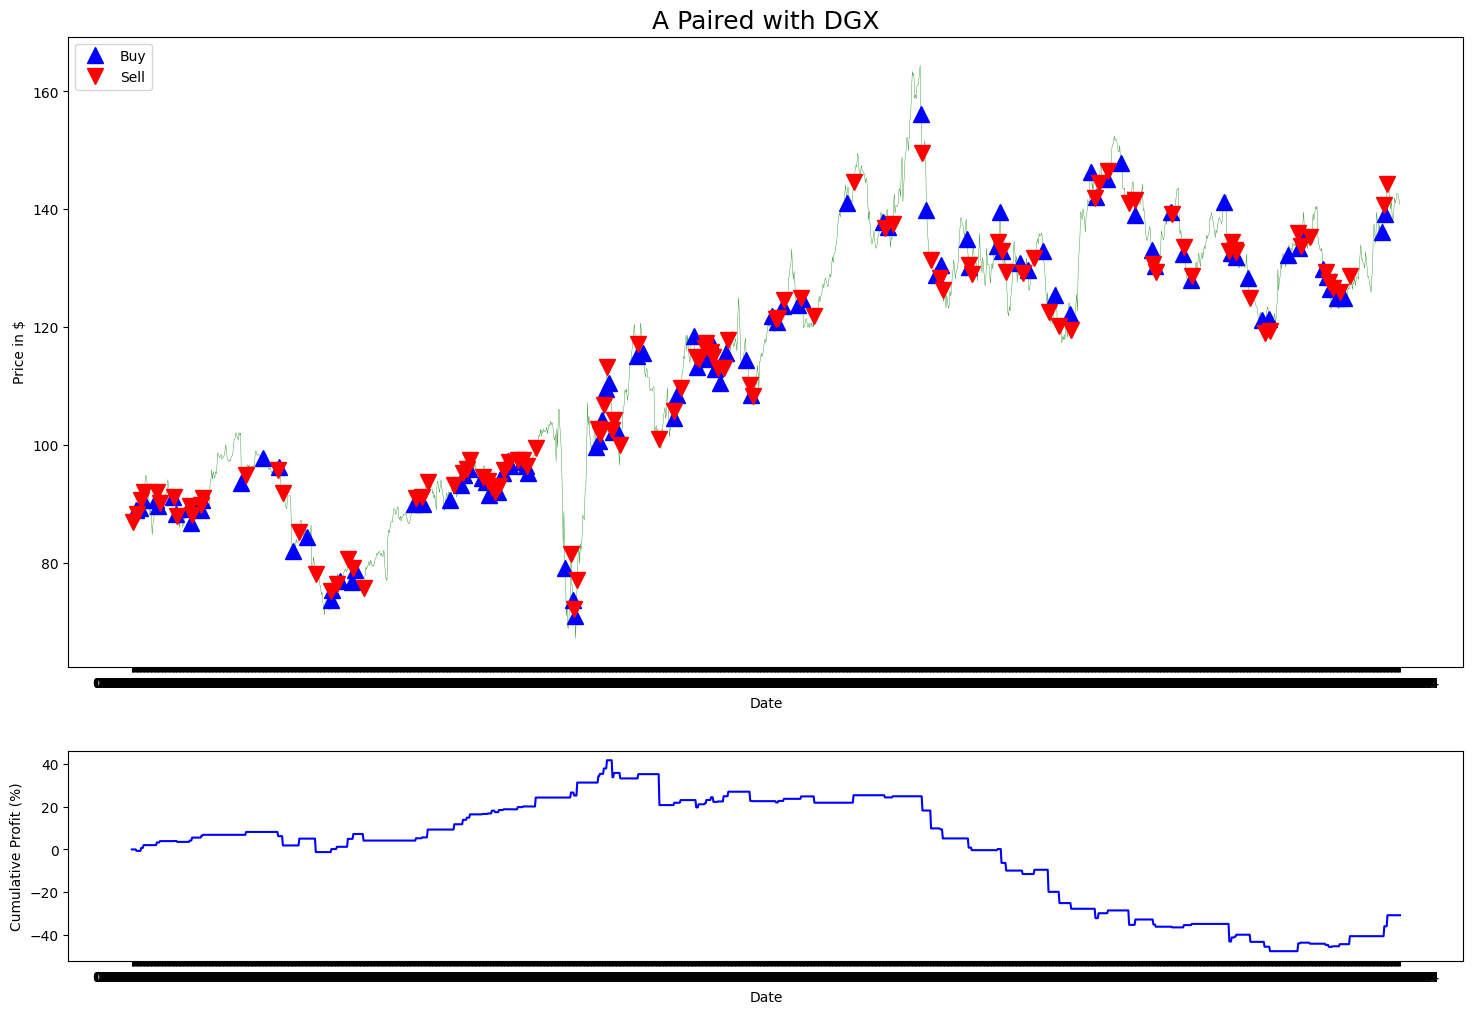

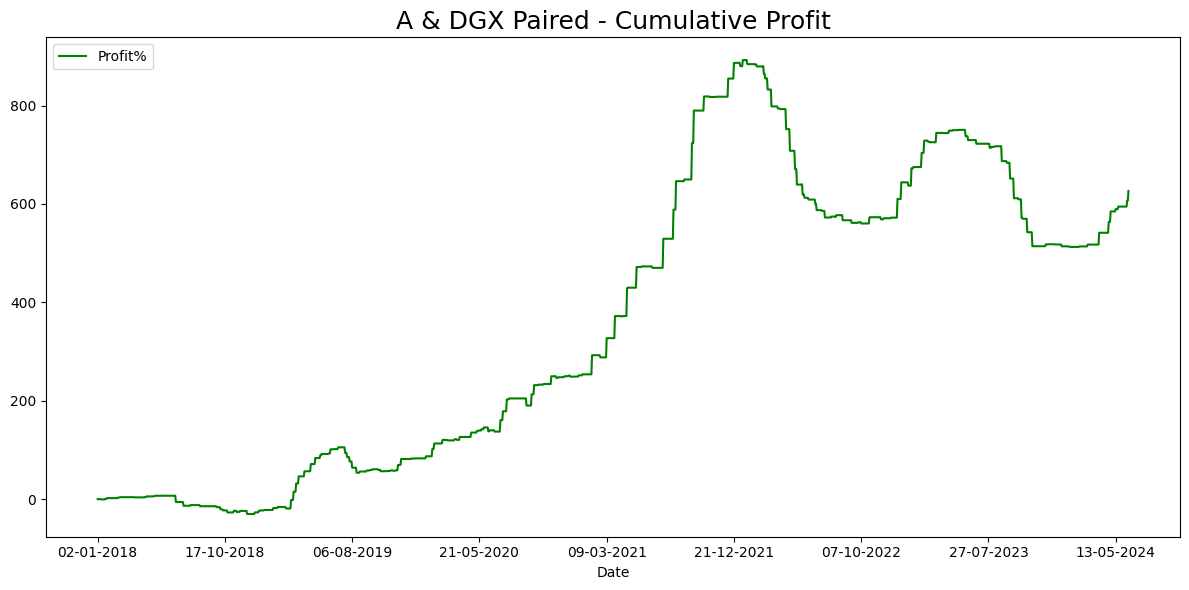

Invested Amount: $10000
Final Cumulative Profit: 626.5609927599997%
Total Return: $72656.09927599996
Profit for pair A and DGX: $72656.09927599996


<Figure size 2600x1800 with 0 Axes>

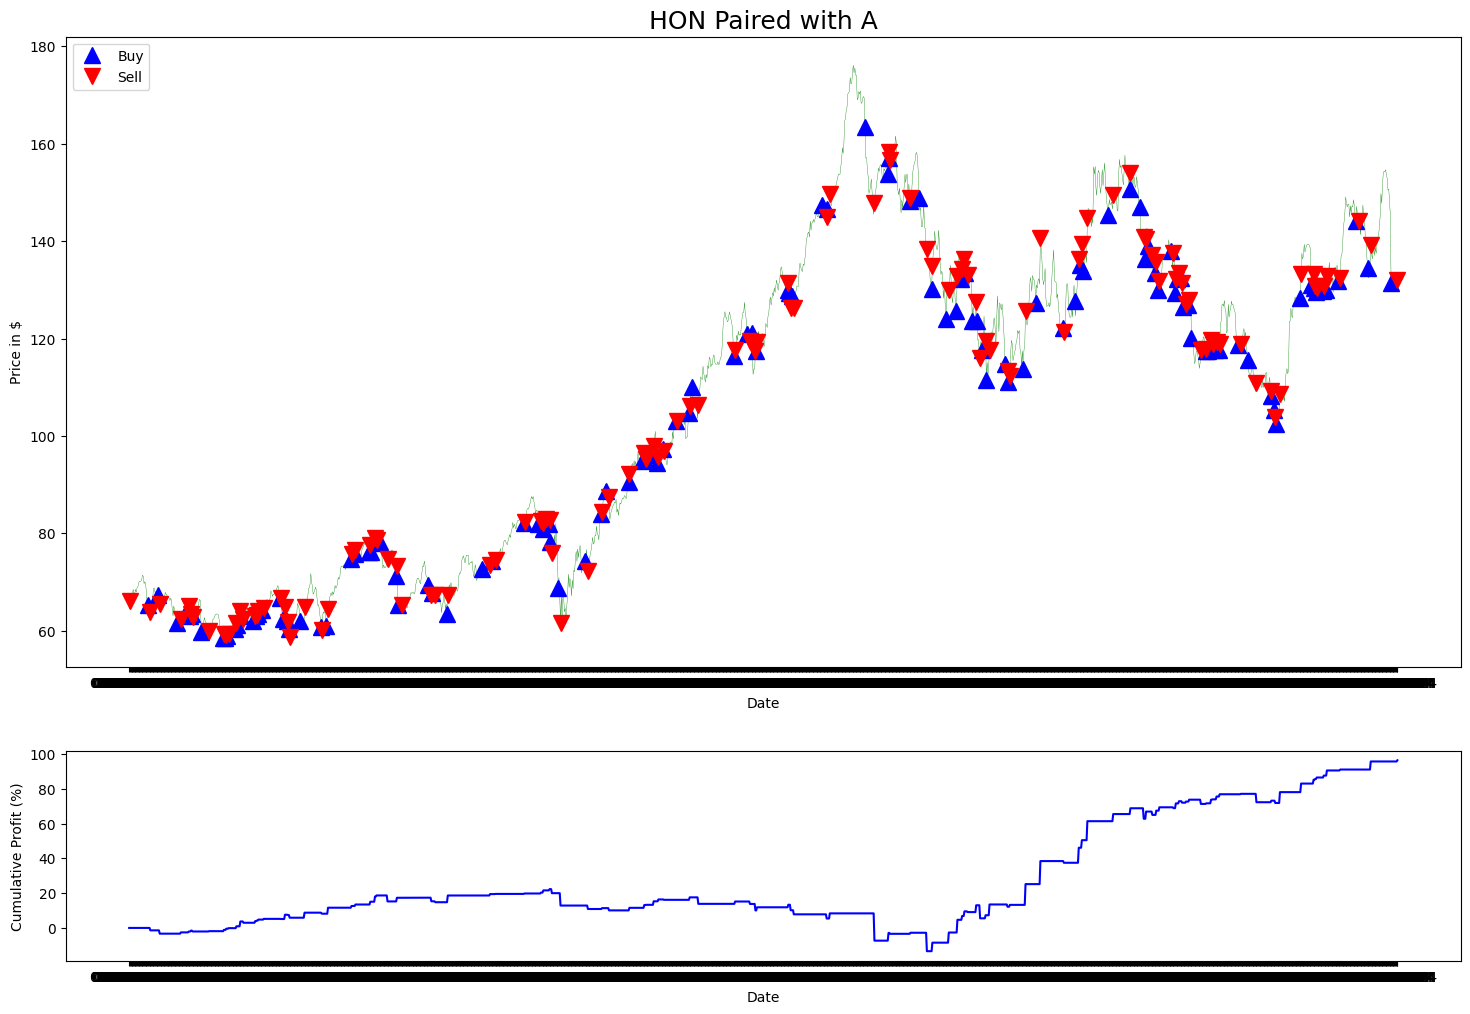

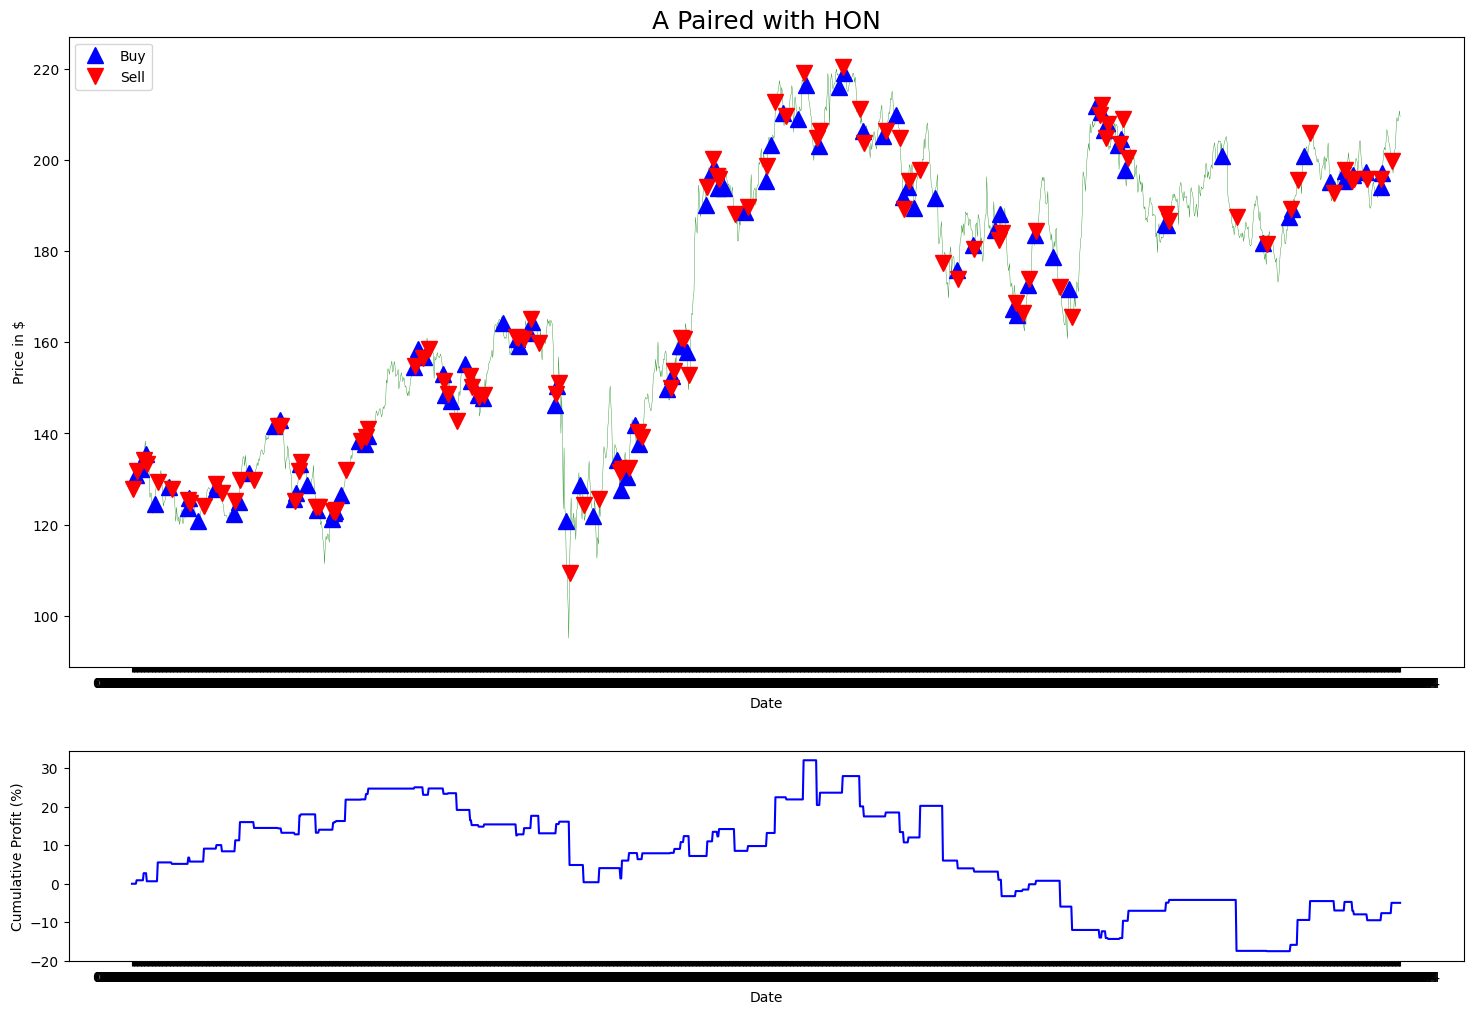

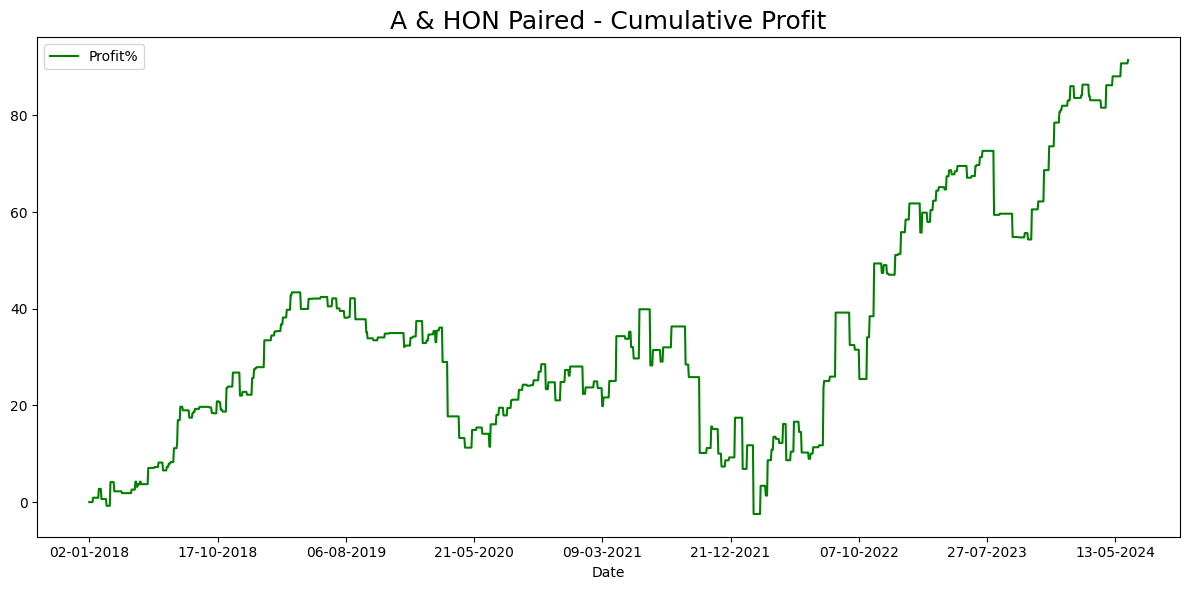

Invested Amount: $10000
Final Cumulative Profit: 91.46776142000012%
Total Return: $19146.77614200001
Profit for pair A and HON: $19146.77614200001


<Figure size 2600x1800 with 0 Axes>

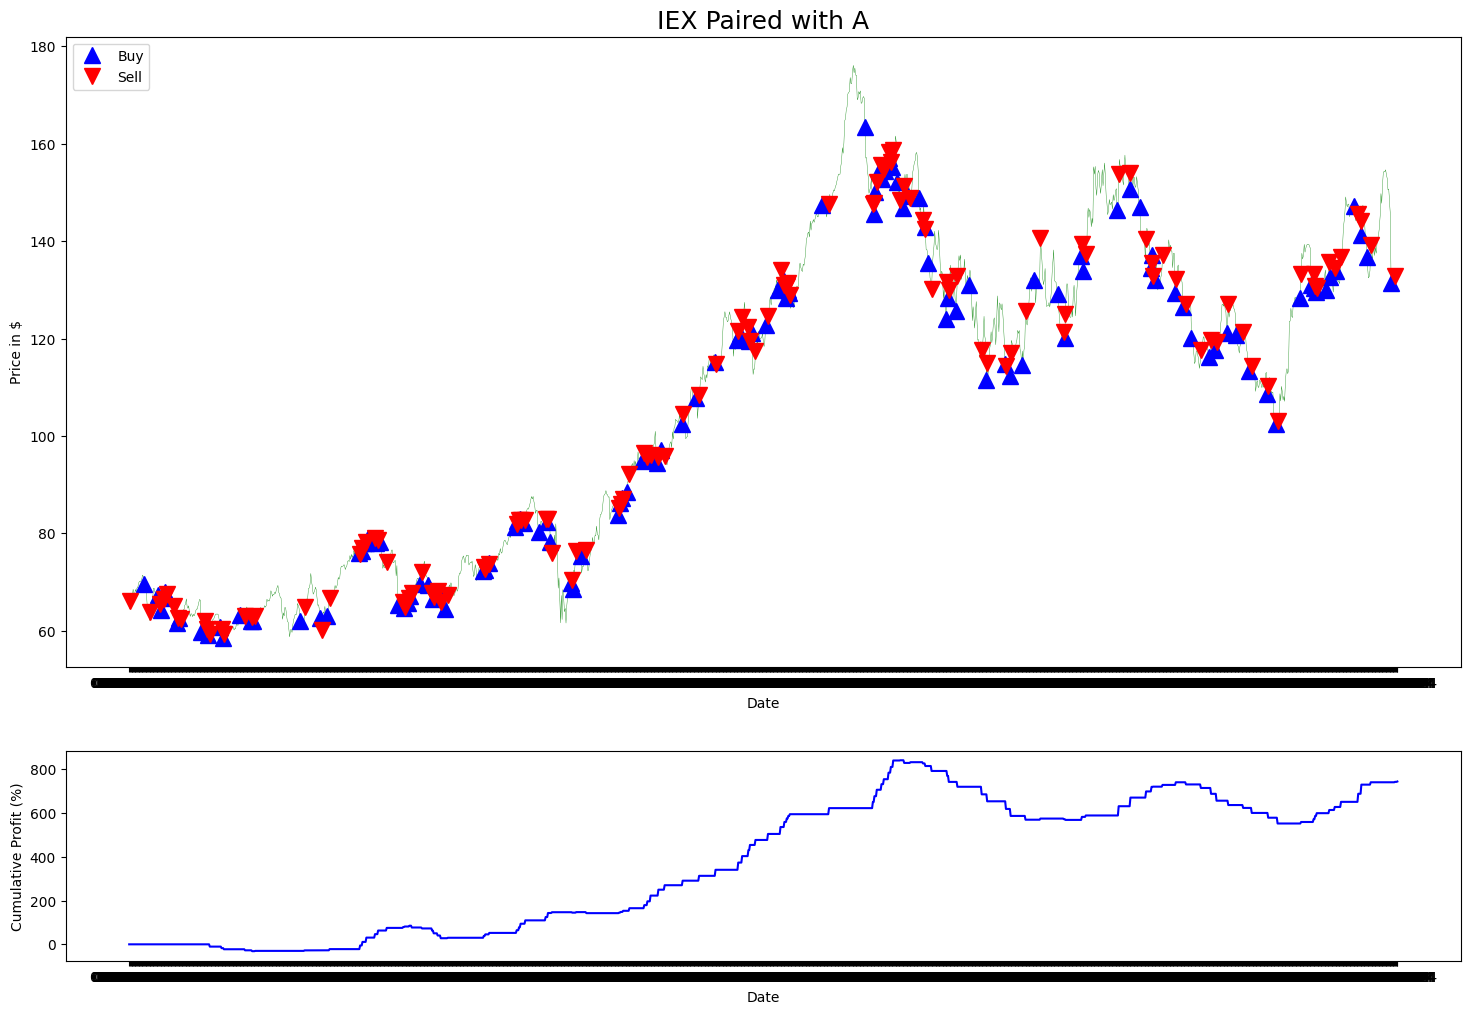

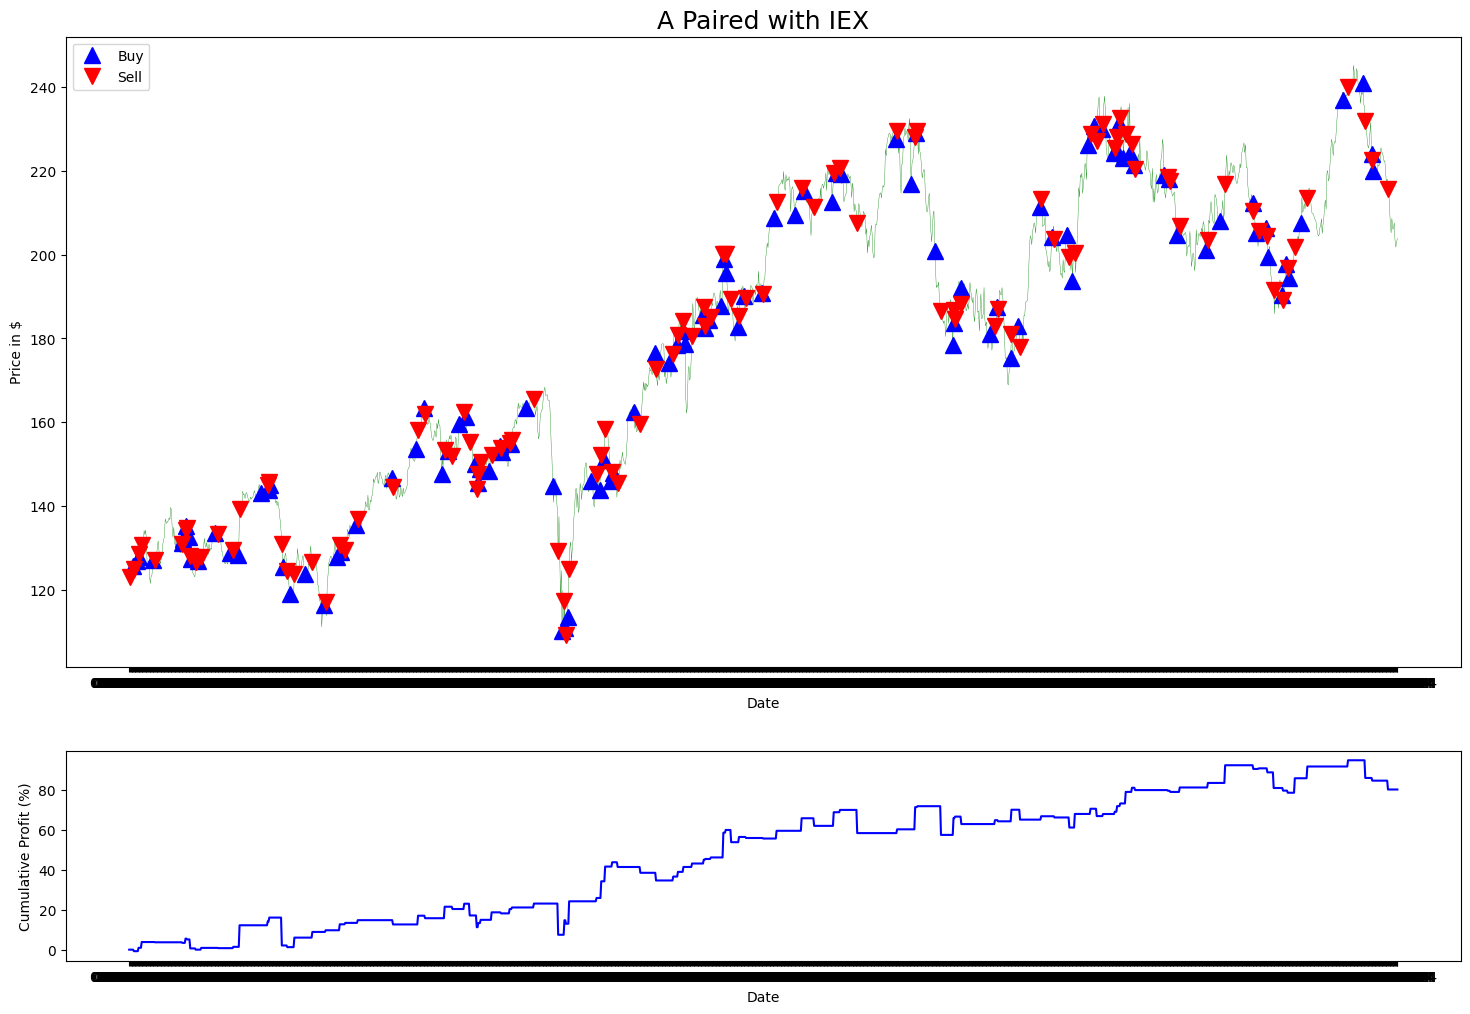

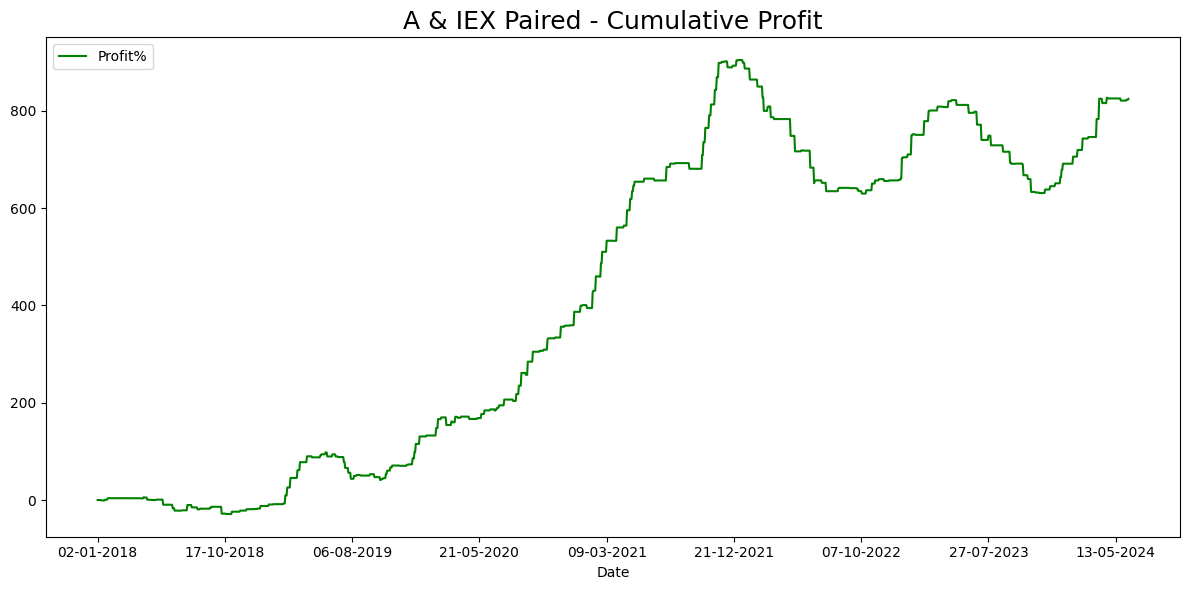

Invested Amount: $10000
Final Cumulative Profit: 824.70177849%
Total Return: $92470.177849
Profit for pair A and IEX: $92470.177849


<Figure size 2600x1800 with 0 Axes>

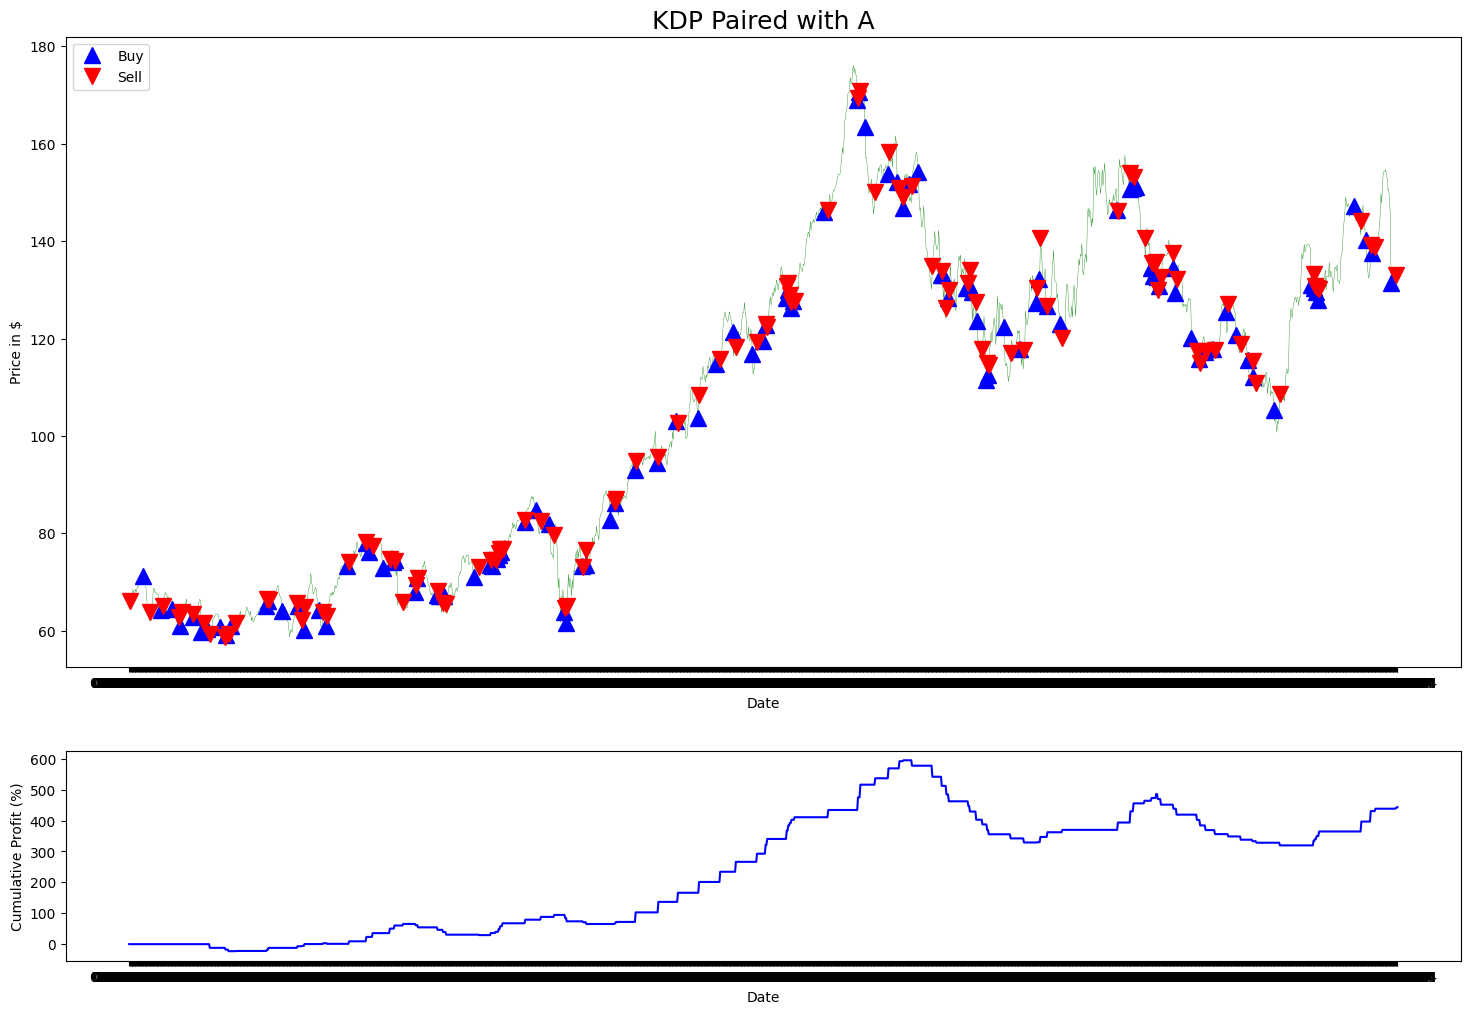

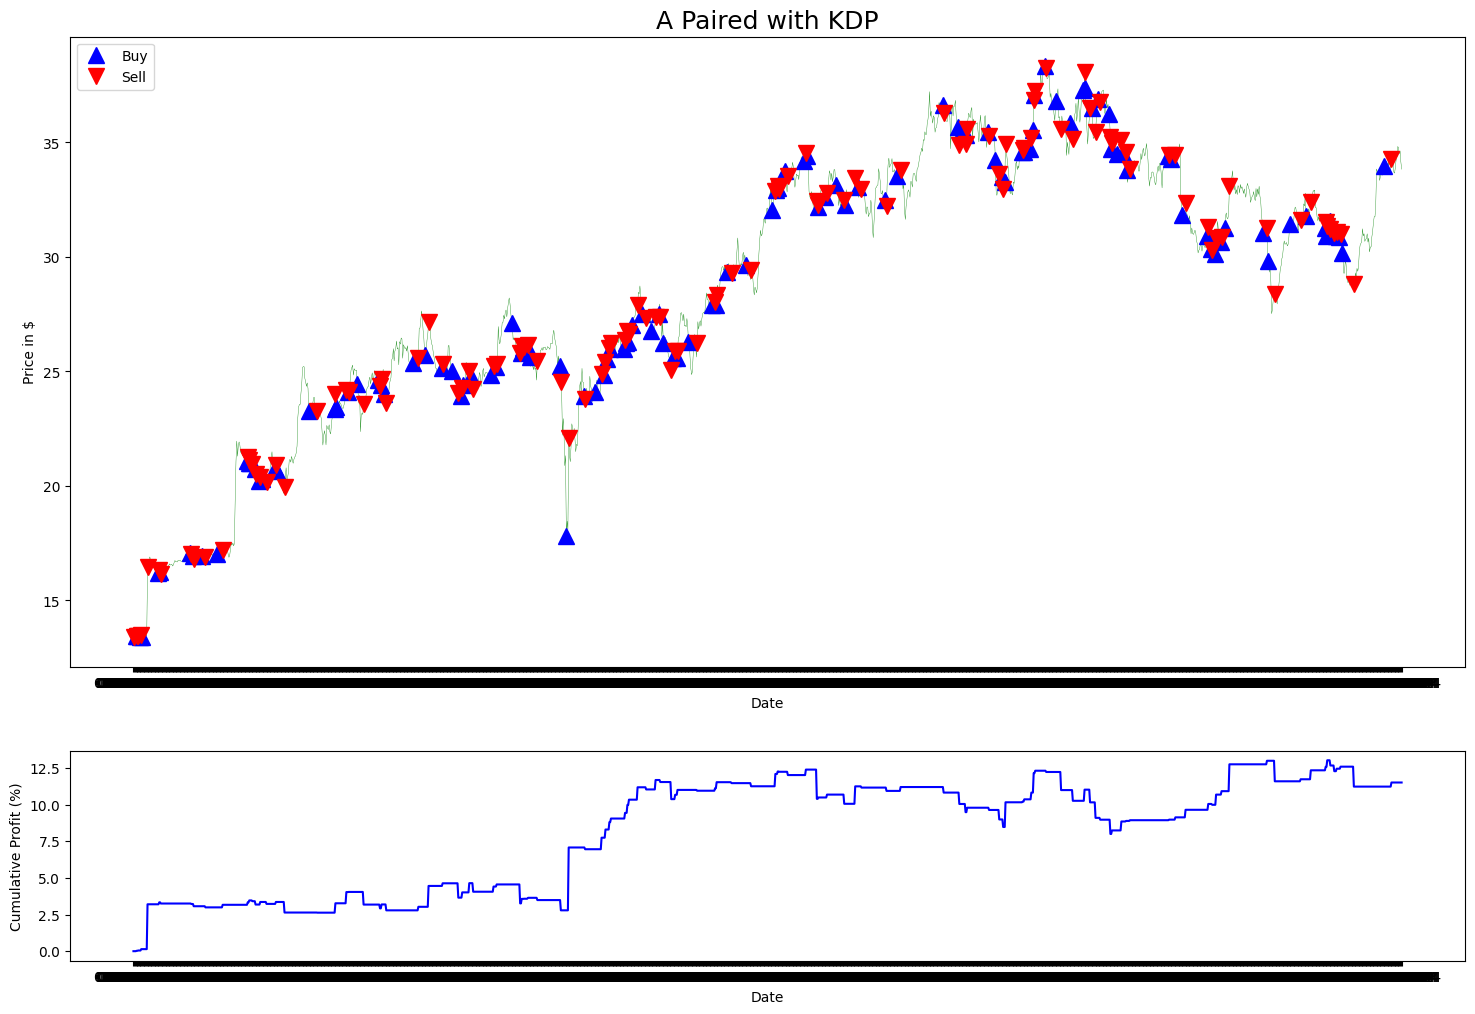

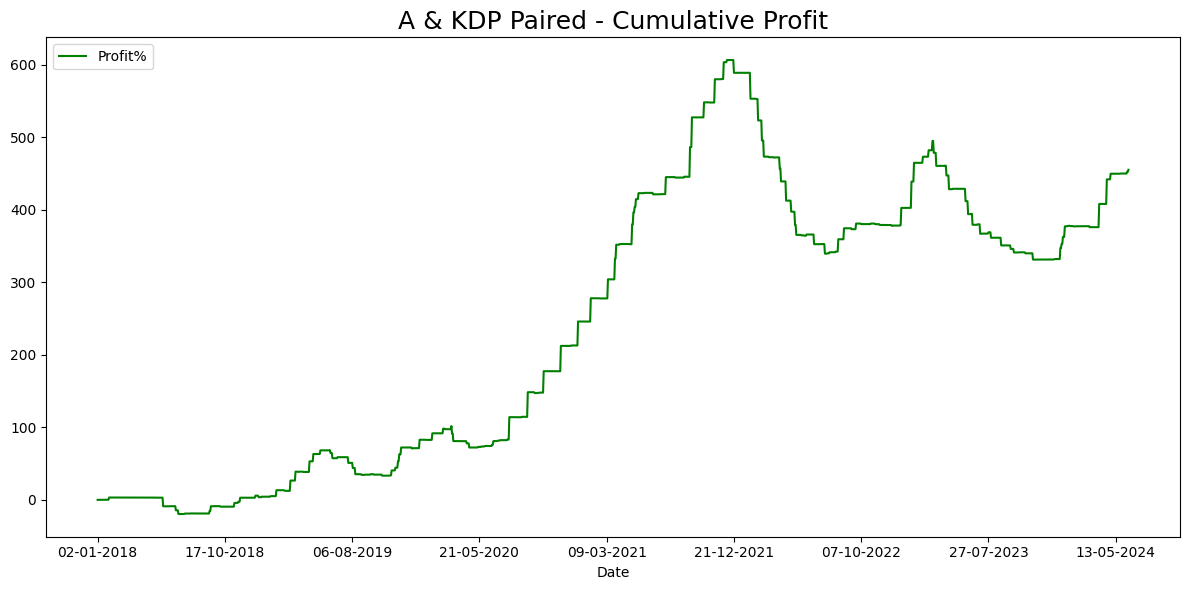

Invested Amount: $10000
Final Cumulative Profit: 455.1036239299999%
Total Return: $55510.362392999996
Profit for pair A and KDP: $55510.362392999996


<Figure size 2600x1800 with 0 Axes>

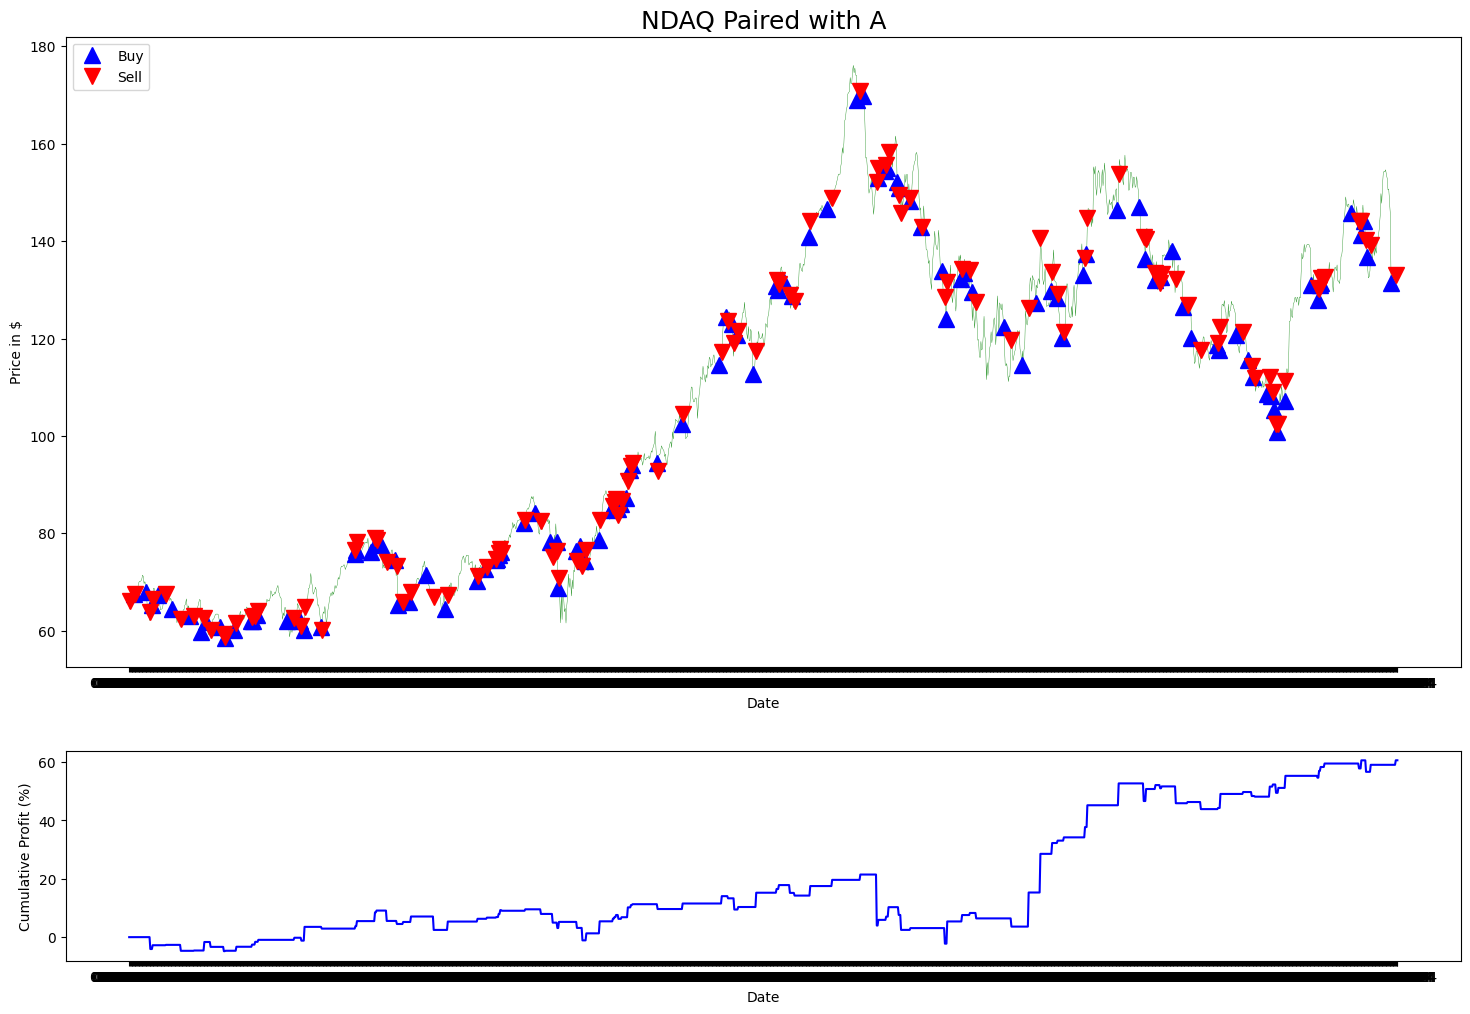

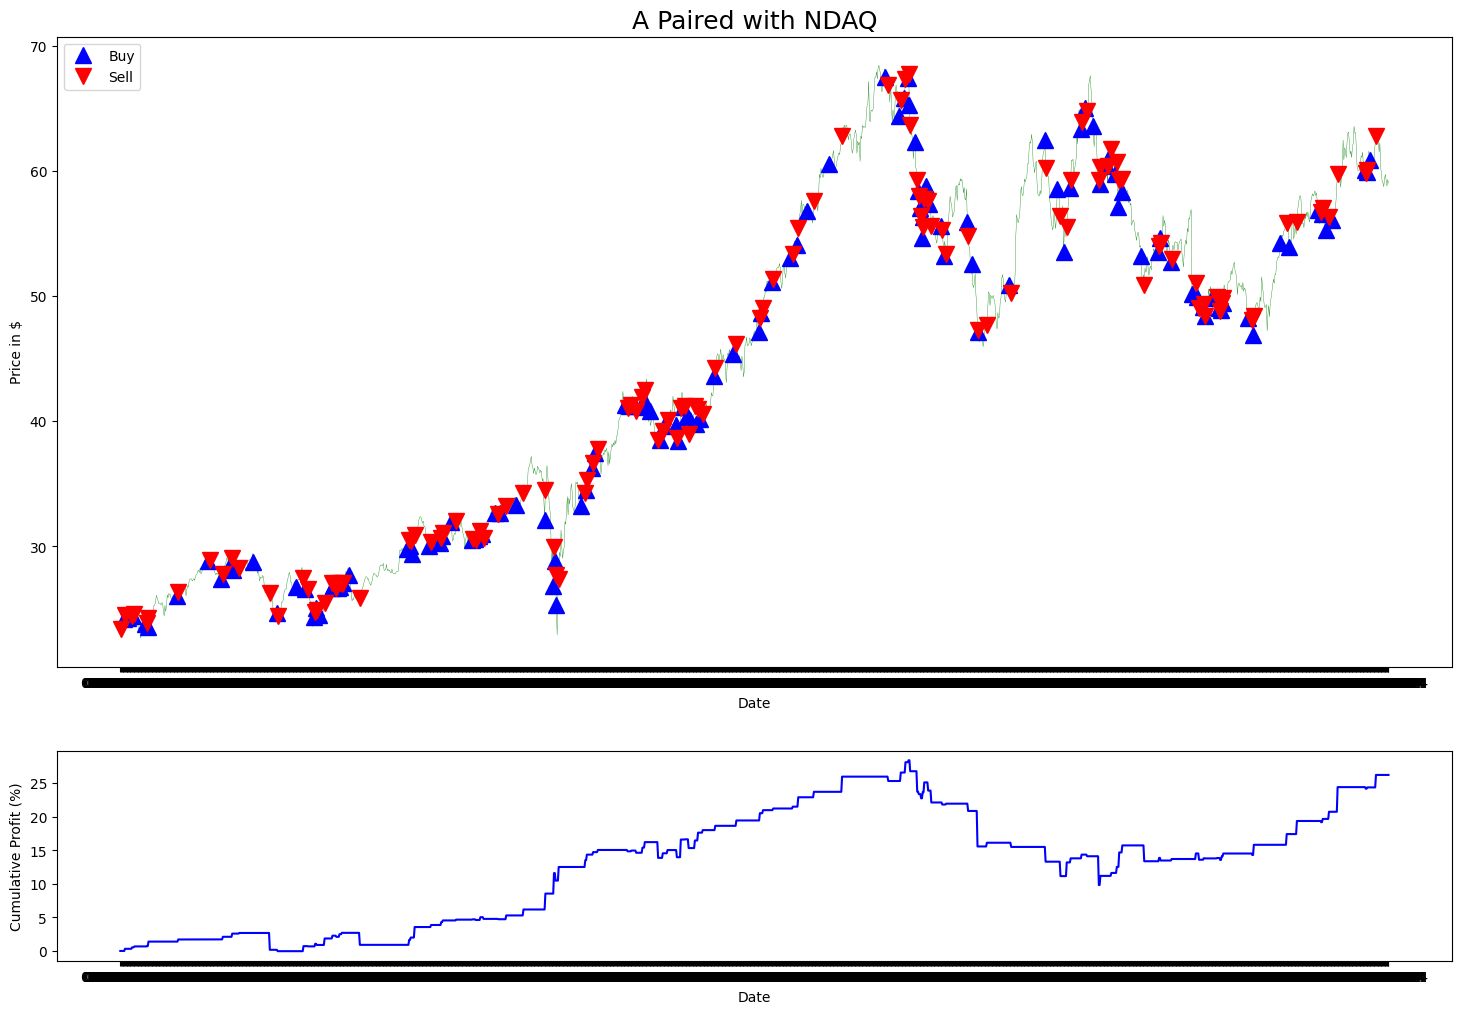

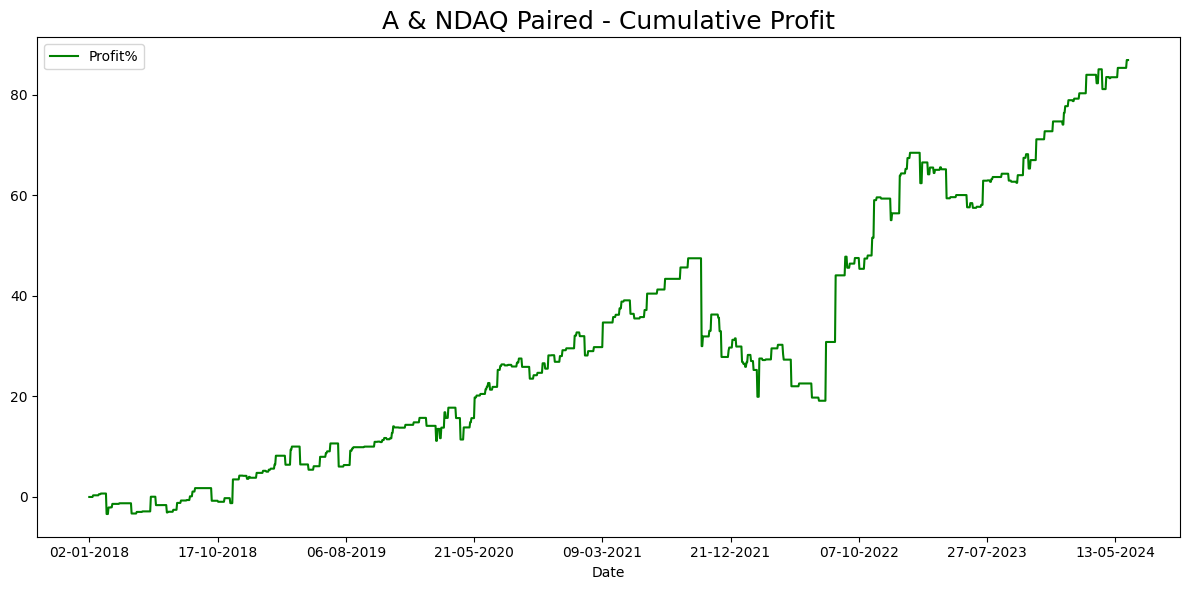

Invested Amount: $10000
Final Cumulative Profit: 86.89229738000002%
Total Return: $18689.229738
Profit for pair A and NDAQ: $18689.229738


<Figure size 2600x1800 with 0 Axes>

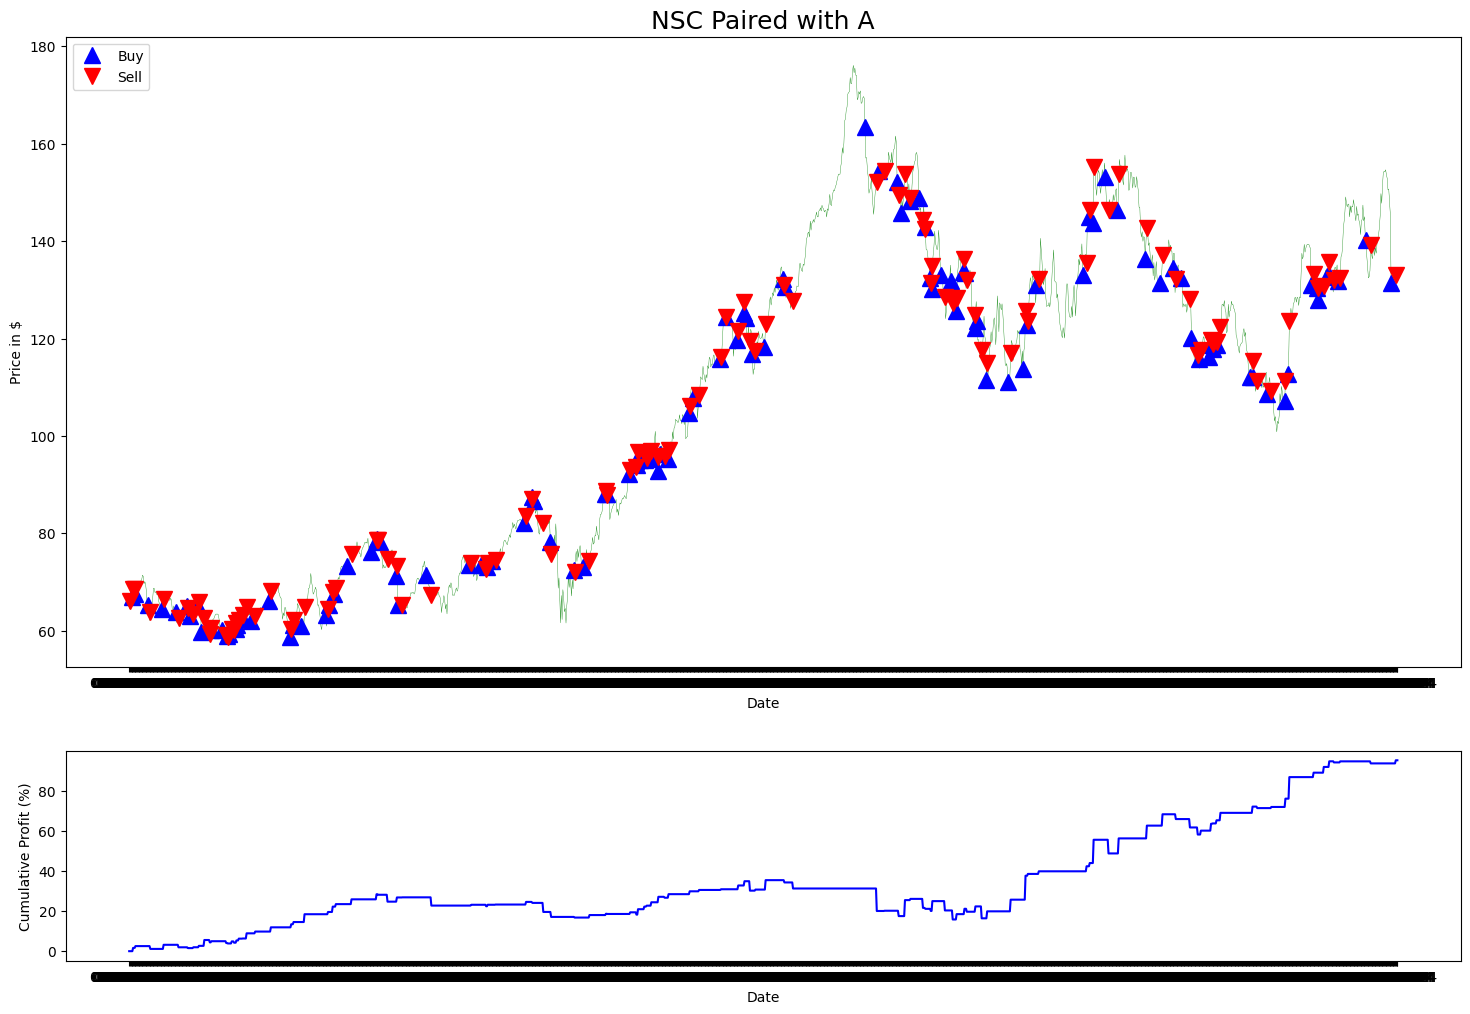

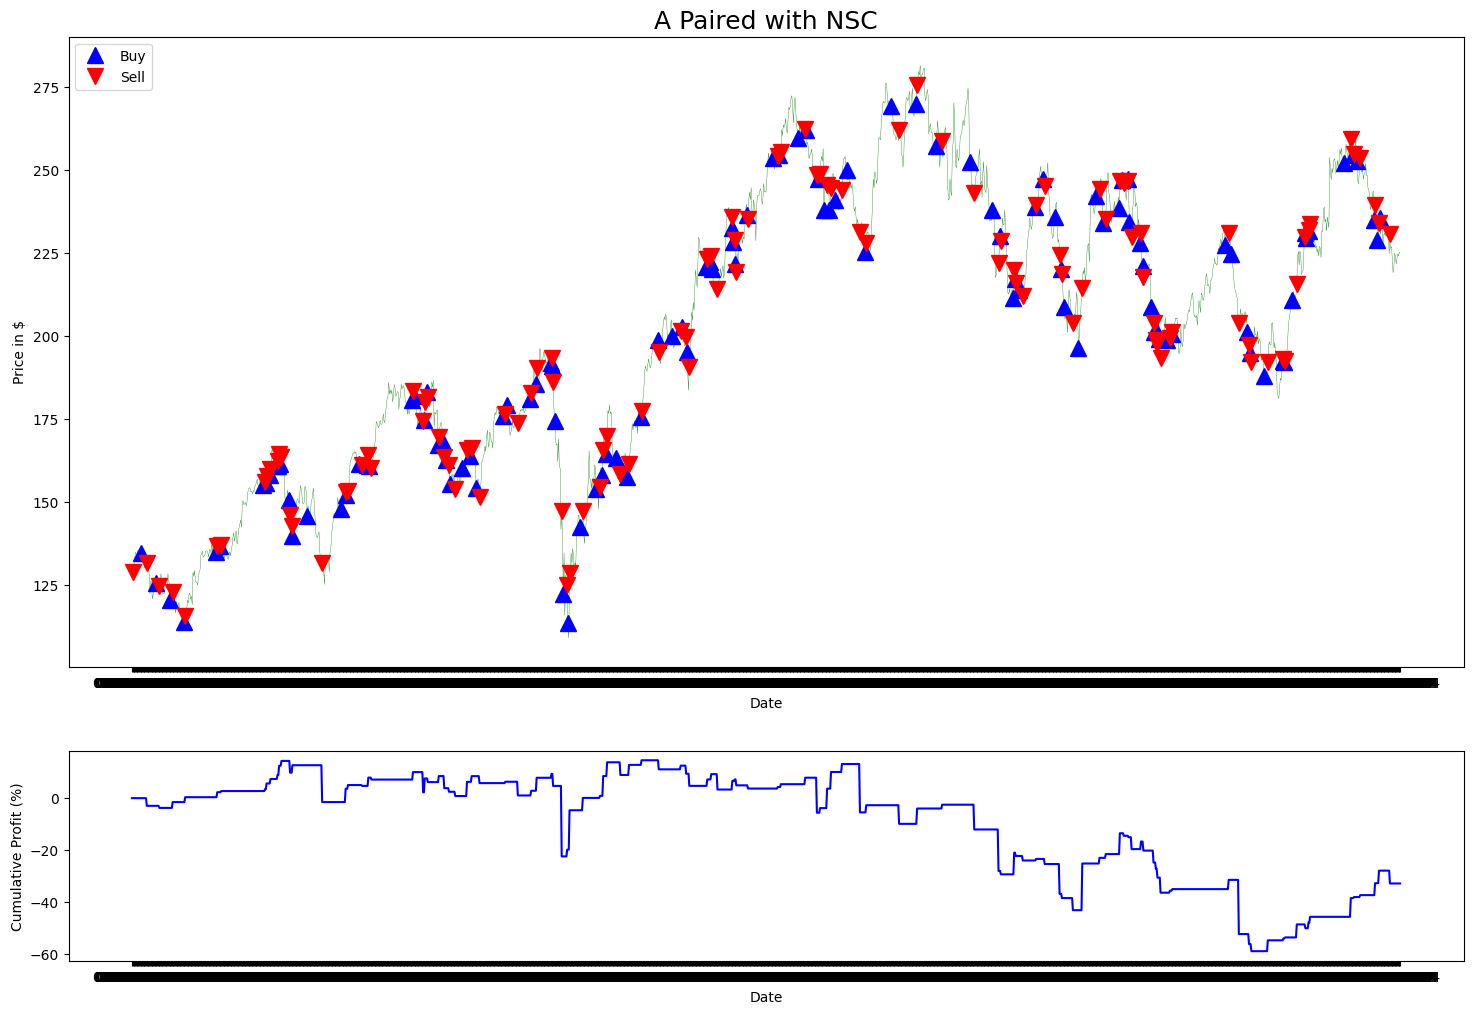

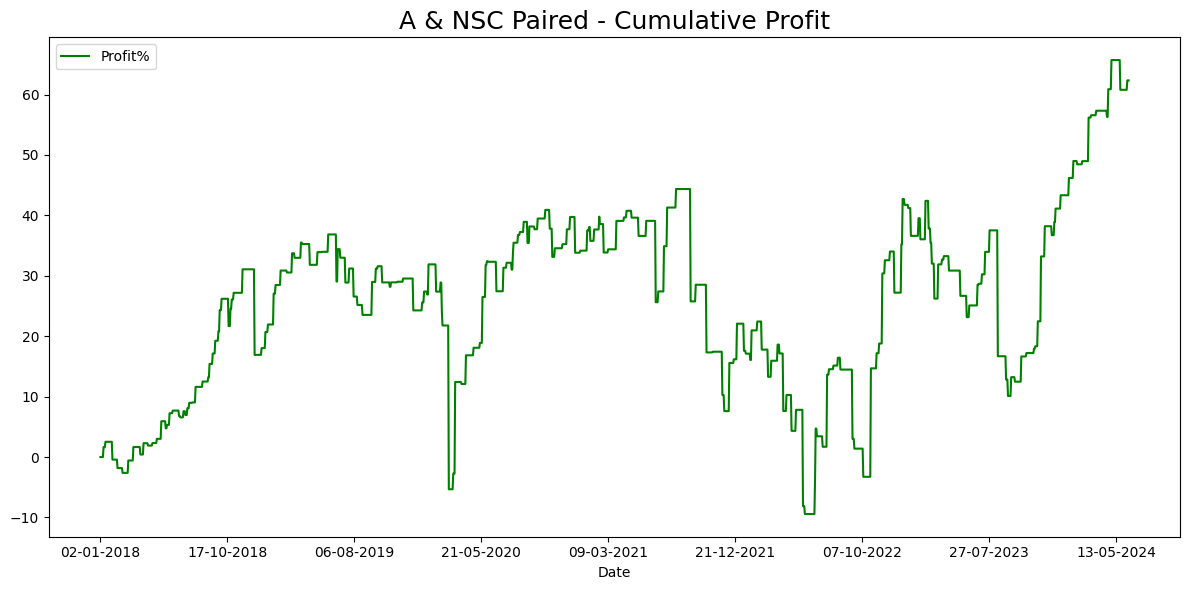

Invested Amount: $10000
Final Cumulative Profit: 62.34172511000004%
Total Return: $16234.172511000004
Profit for pair A and NSC: $16234.172511000004


<Figure size 2600x1800 with 0 Axes>

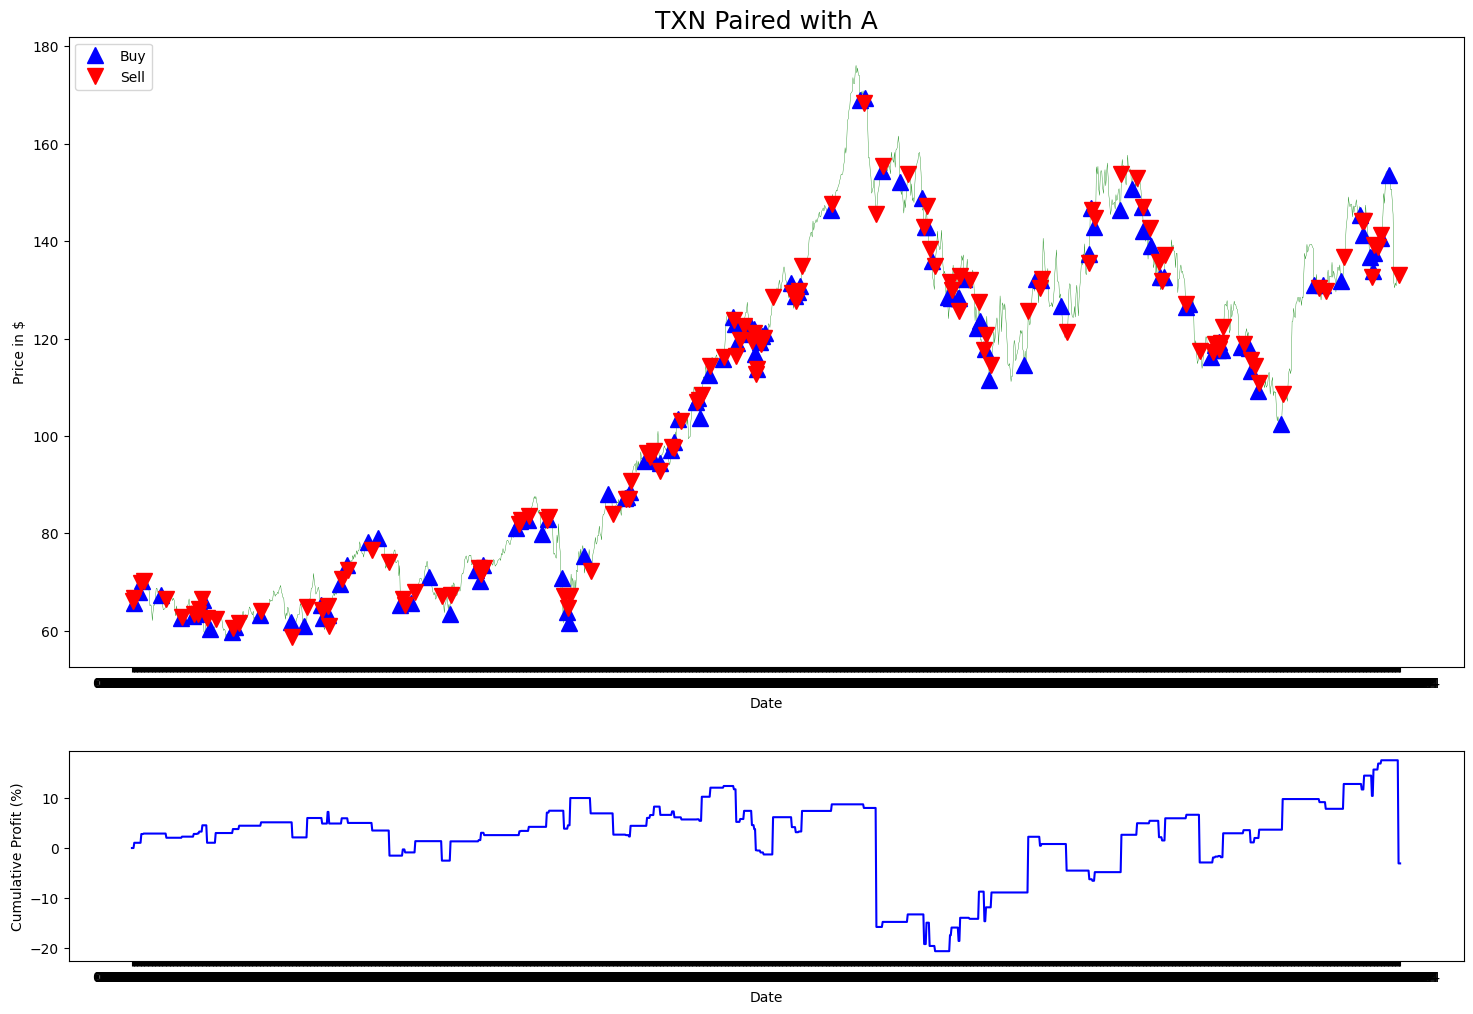

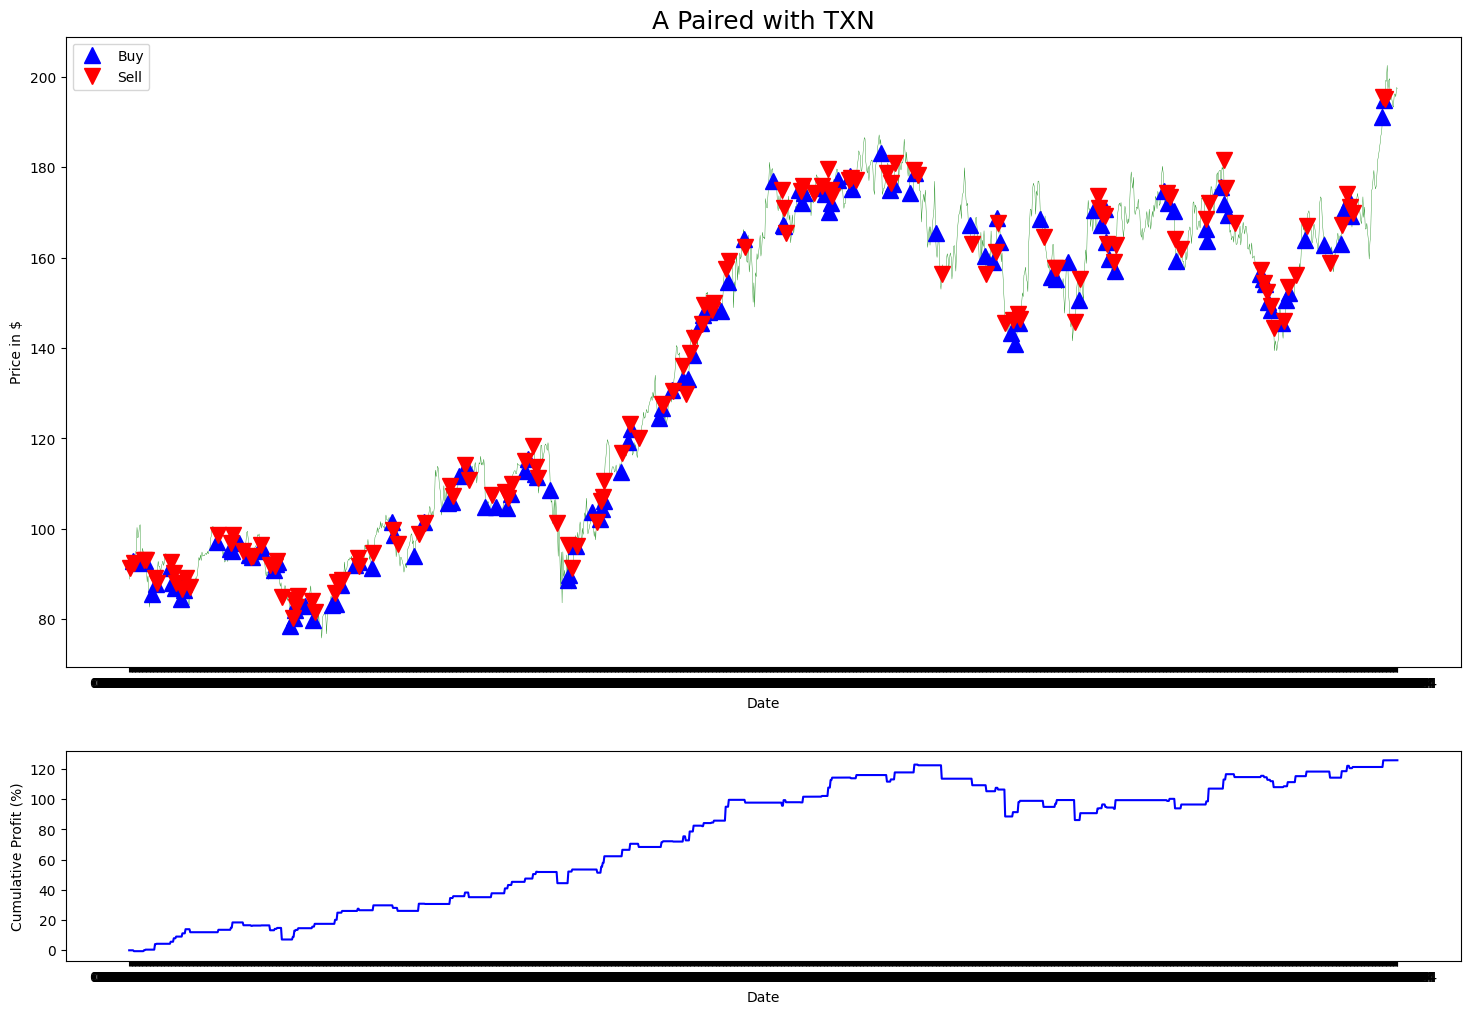

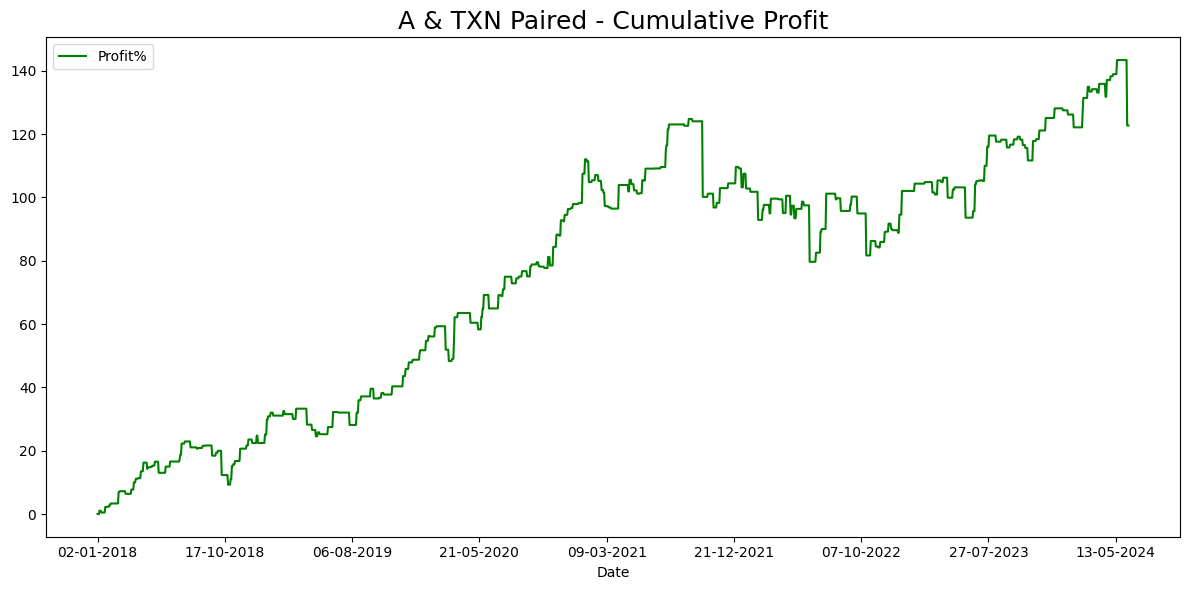

Invested Amount: $10000
Final Cumulative Profit: 122.71379124999966%
Total Return: $22271.379124999967
Profit for pair A and TXN: $22271.379124999967


<Figure size 2600x1800 with 0 Axes>

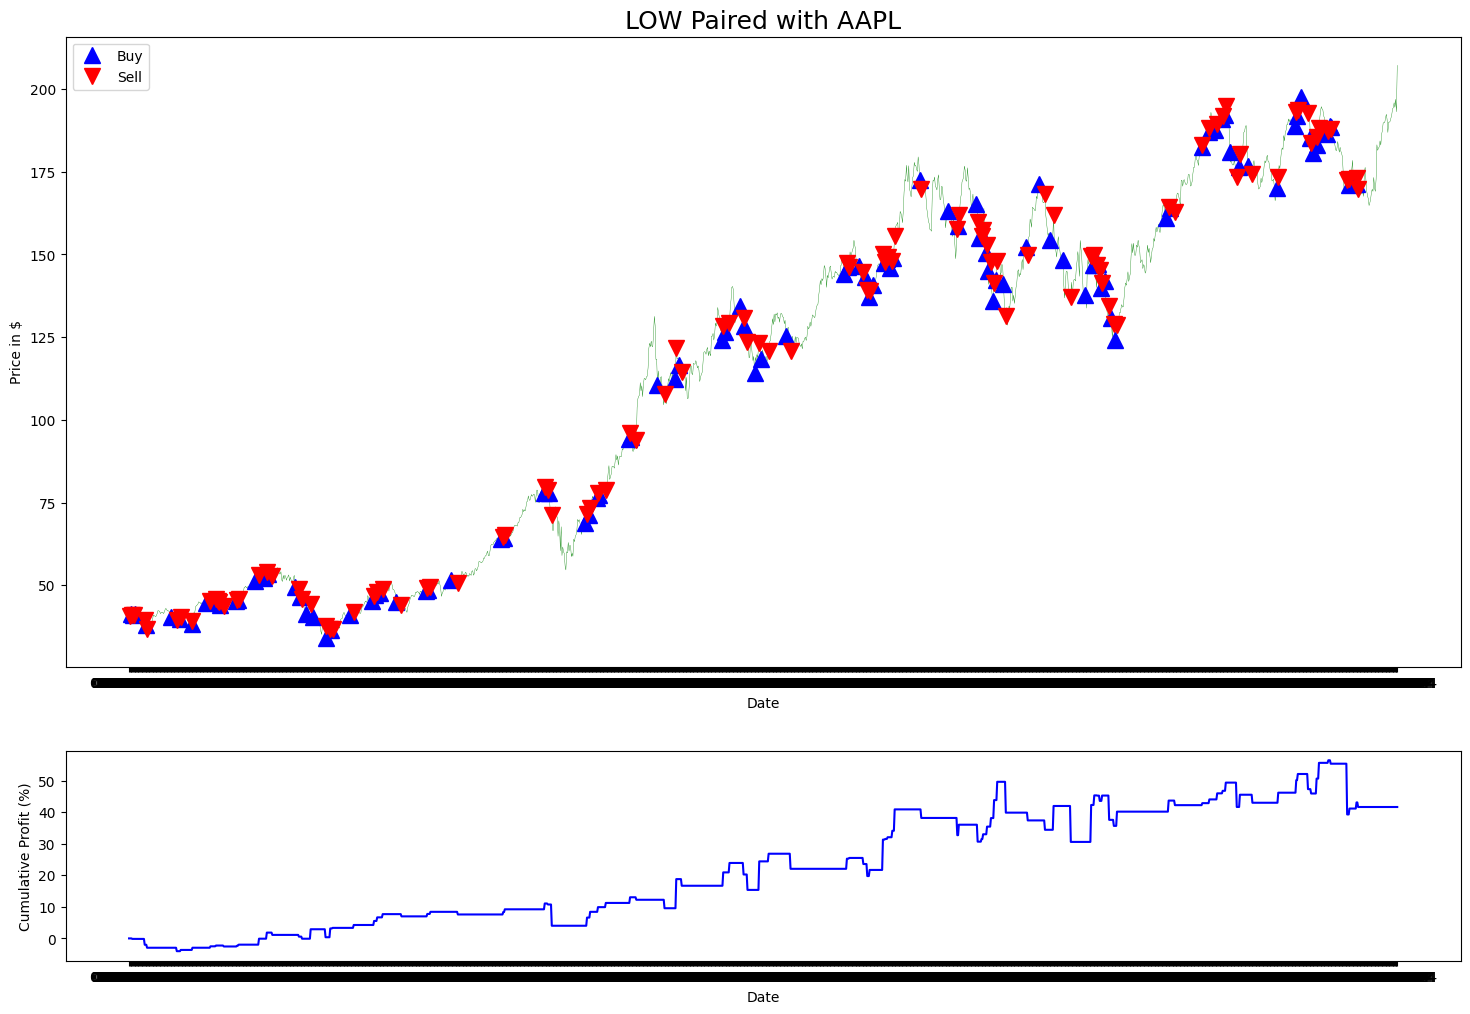

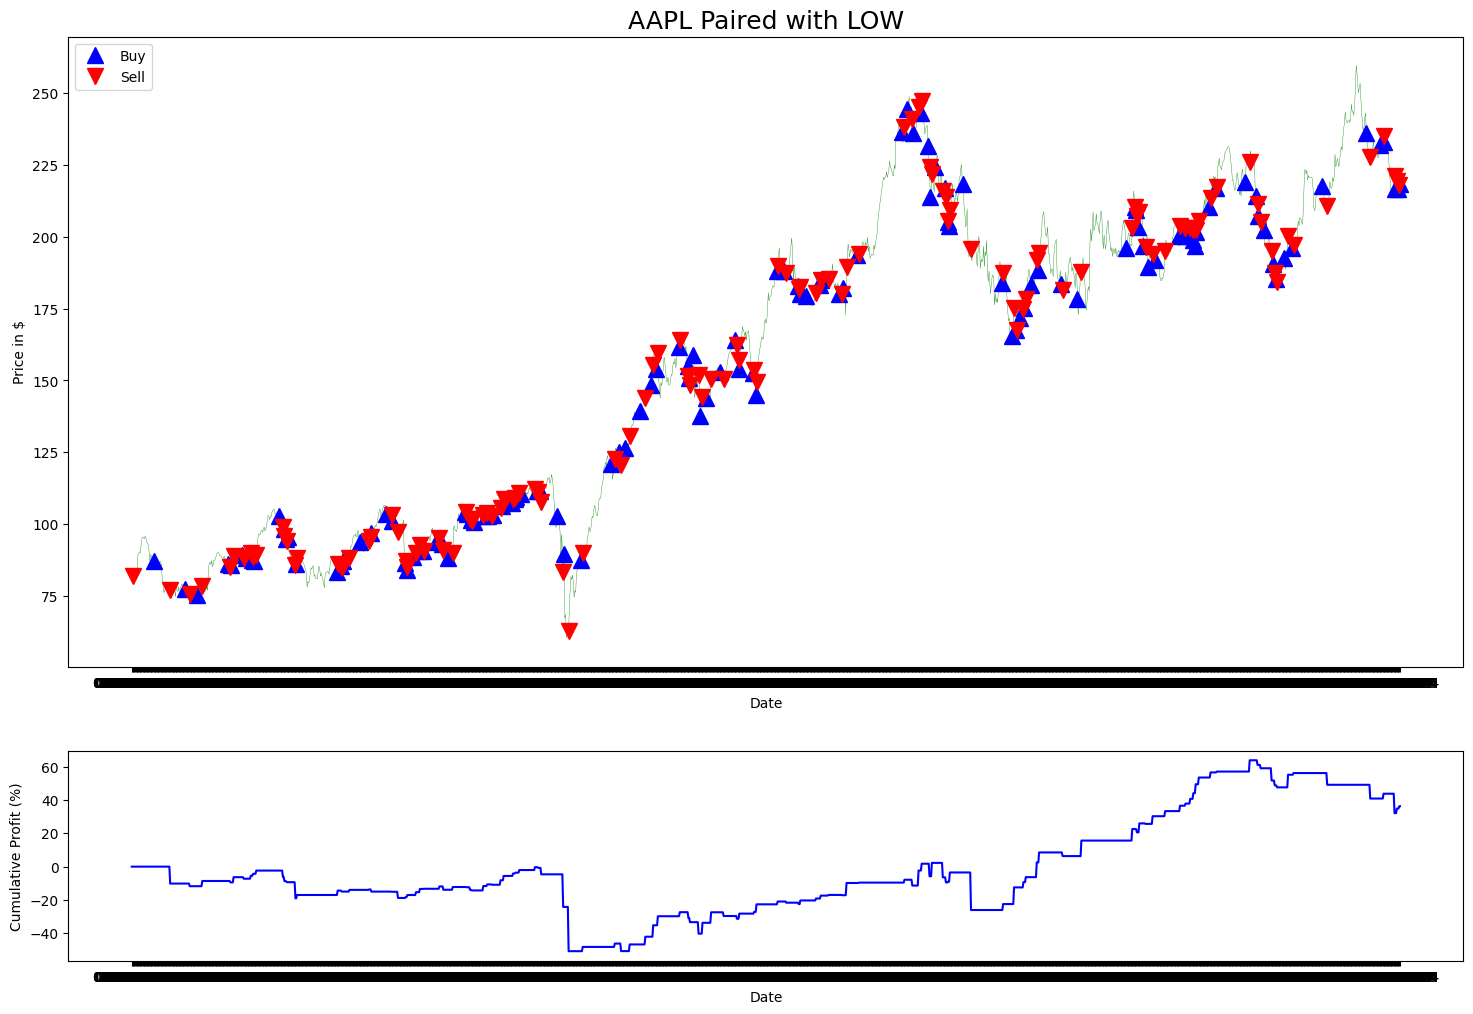

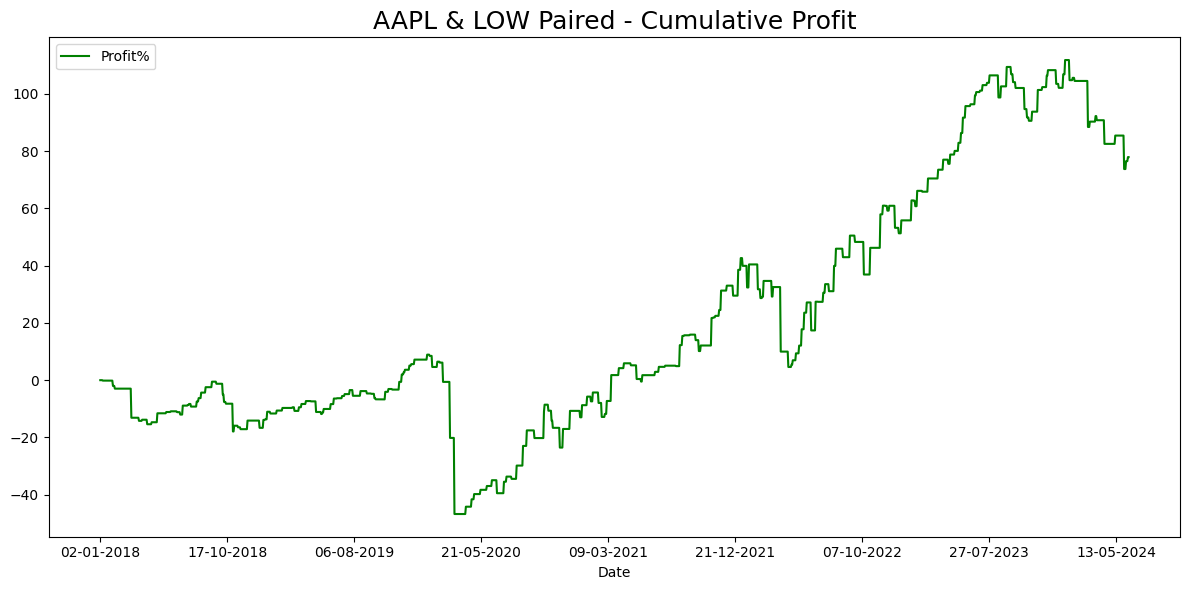

Invested Amount: $10000
Final Cumulative Profit: 77.92391327000013%
Total Return: $17792.391327000012
Profit for pair AAPL and LOW: $17792.391327000012


<Figure size 2600x1800 with 0 Axes>

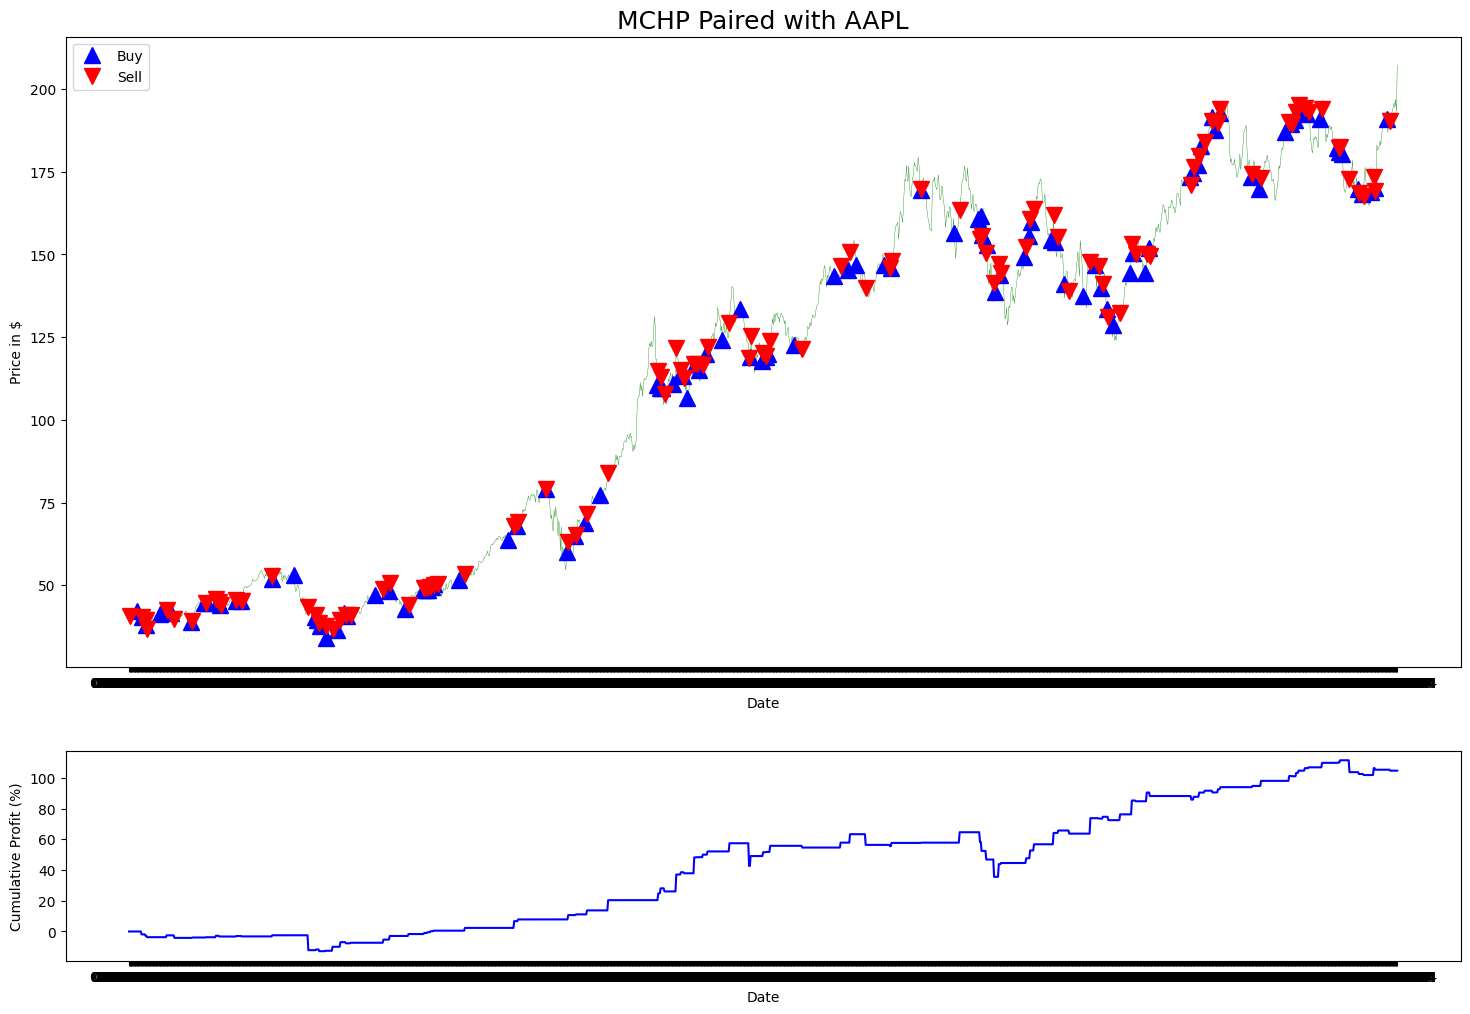

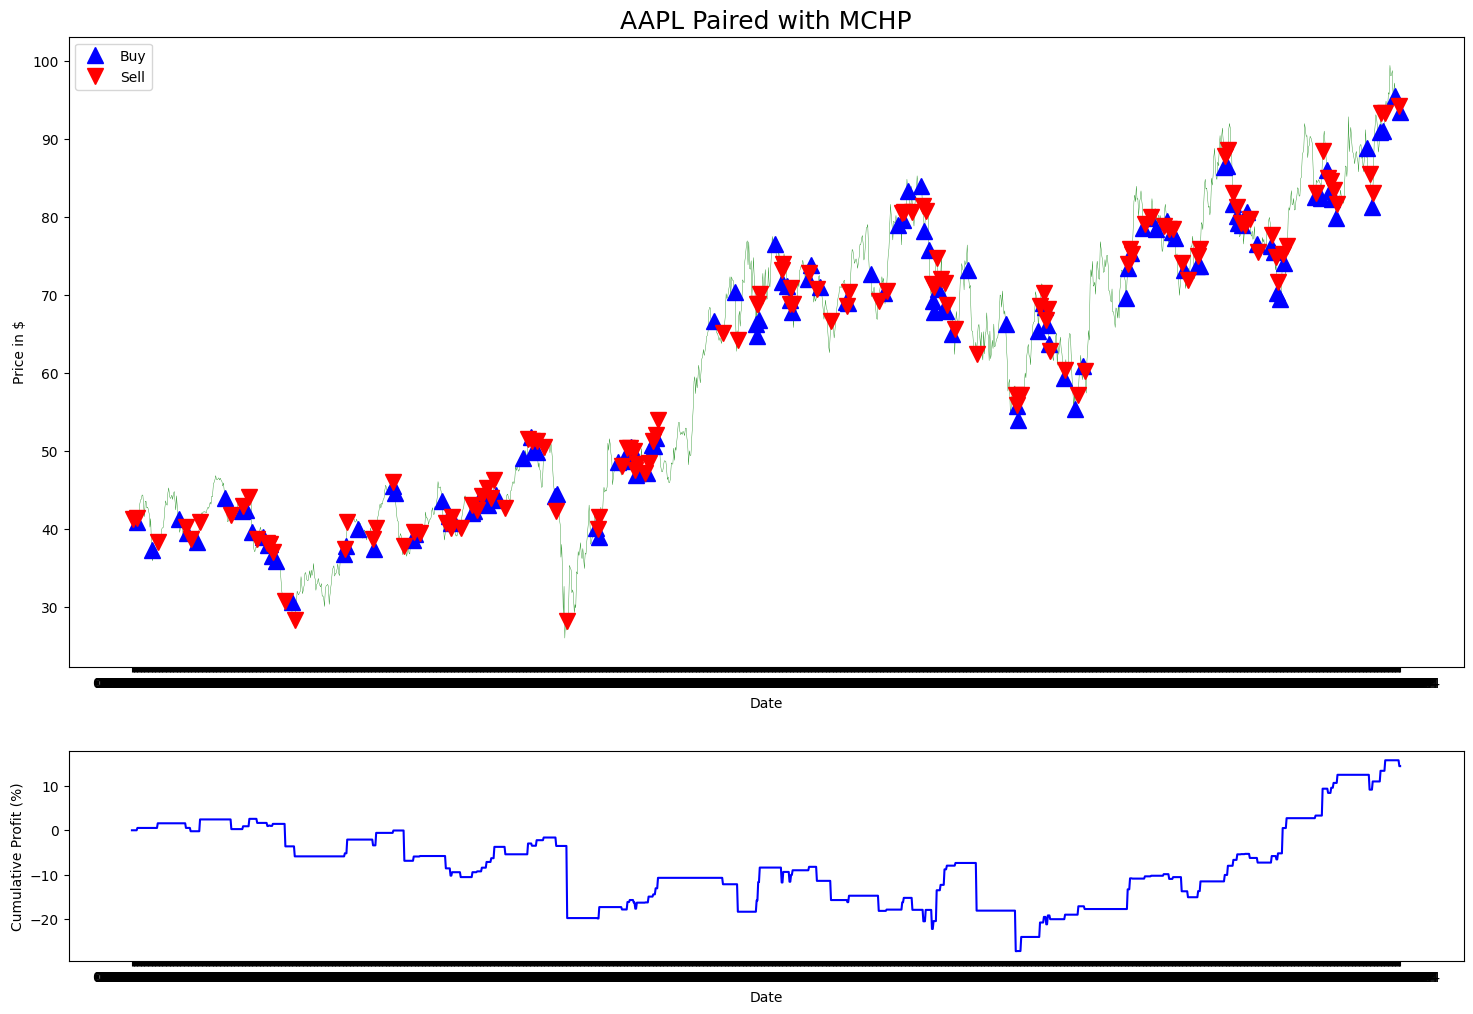

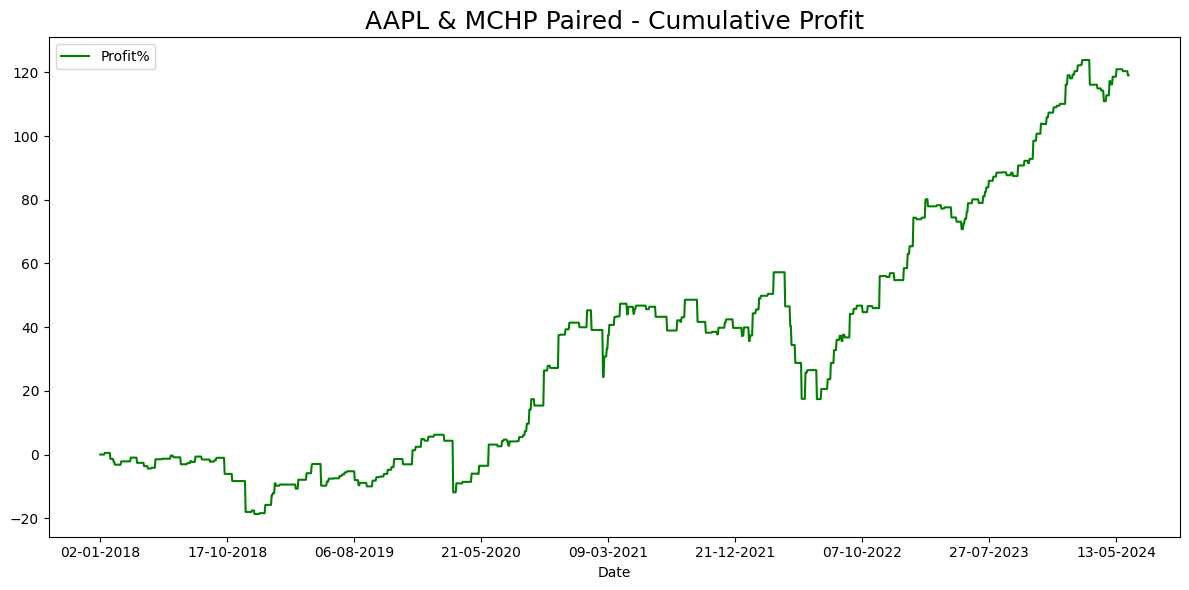

Invested Amount: $10000
Final Cumulative Profit: 119.06100667999993%
Total Return: $21906.100667999992
Profit for pair AAPL and MCHP: $21906.100667999992


<Figure size 2600x1800 with 0 Axes>

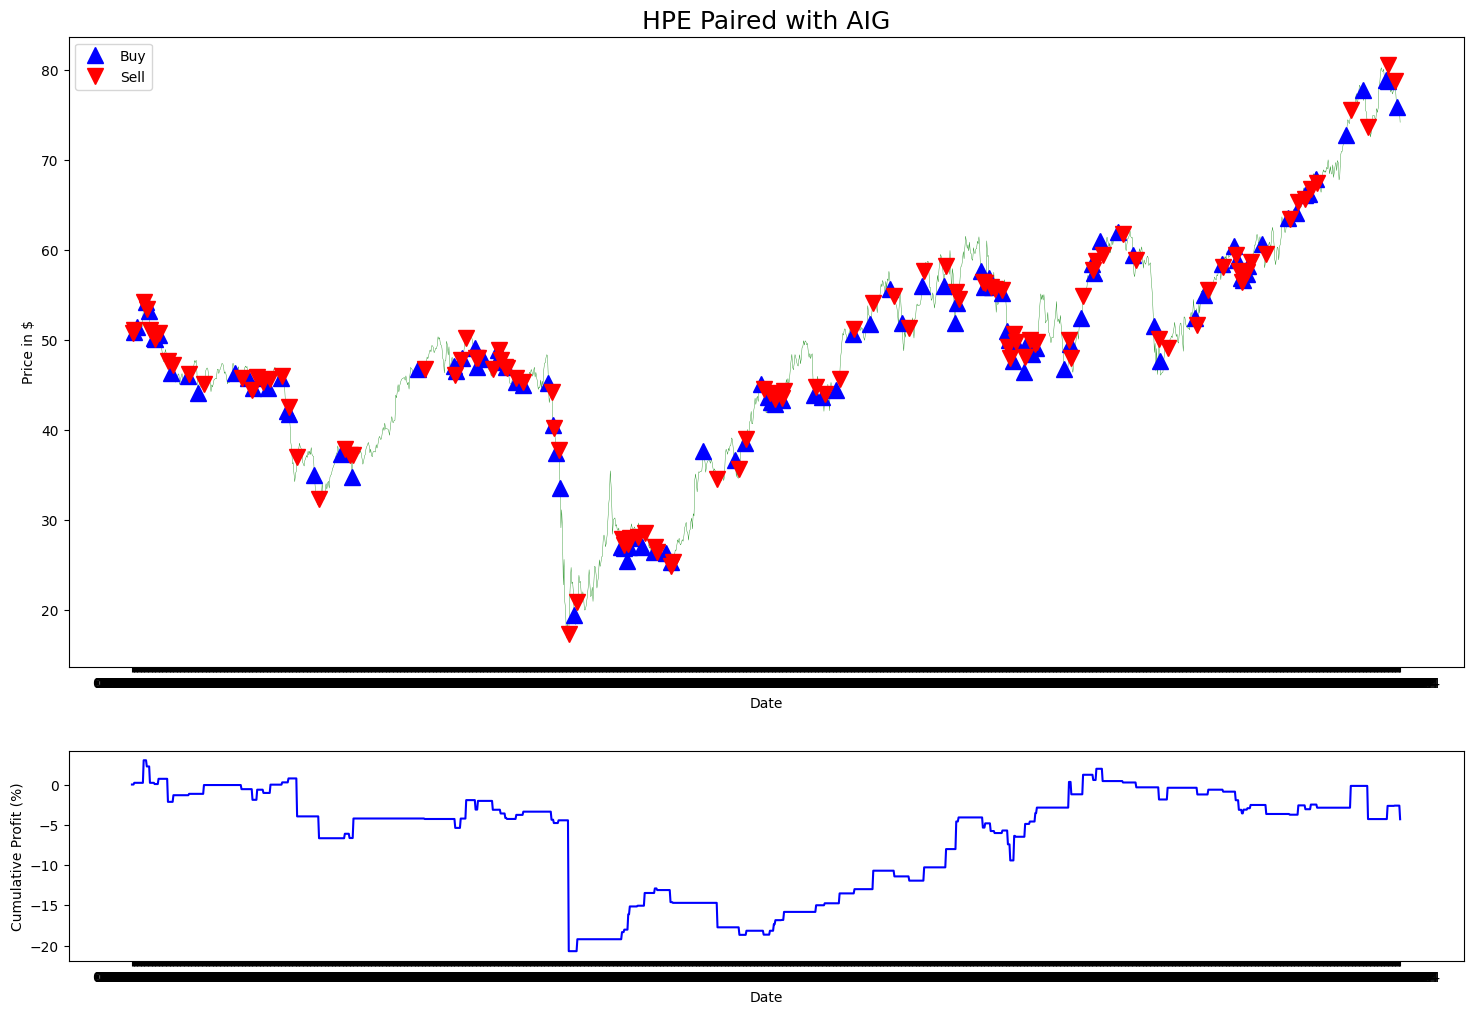

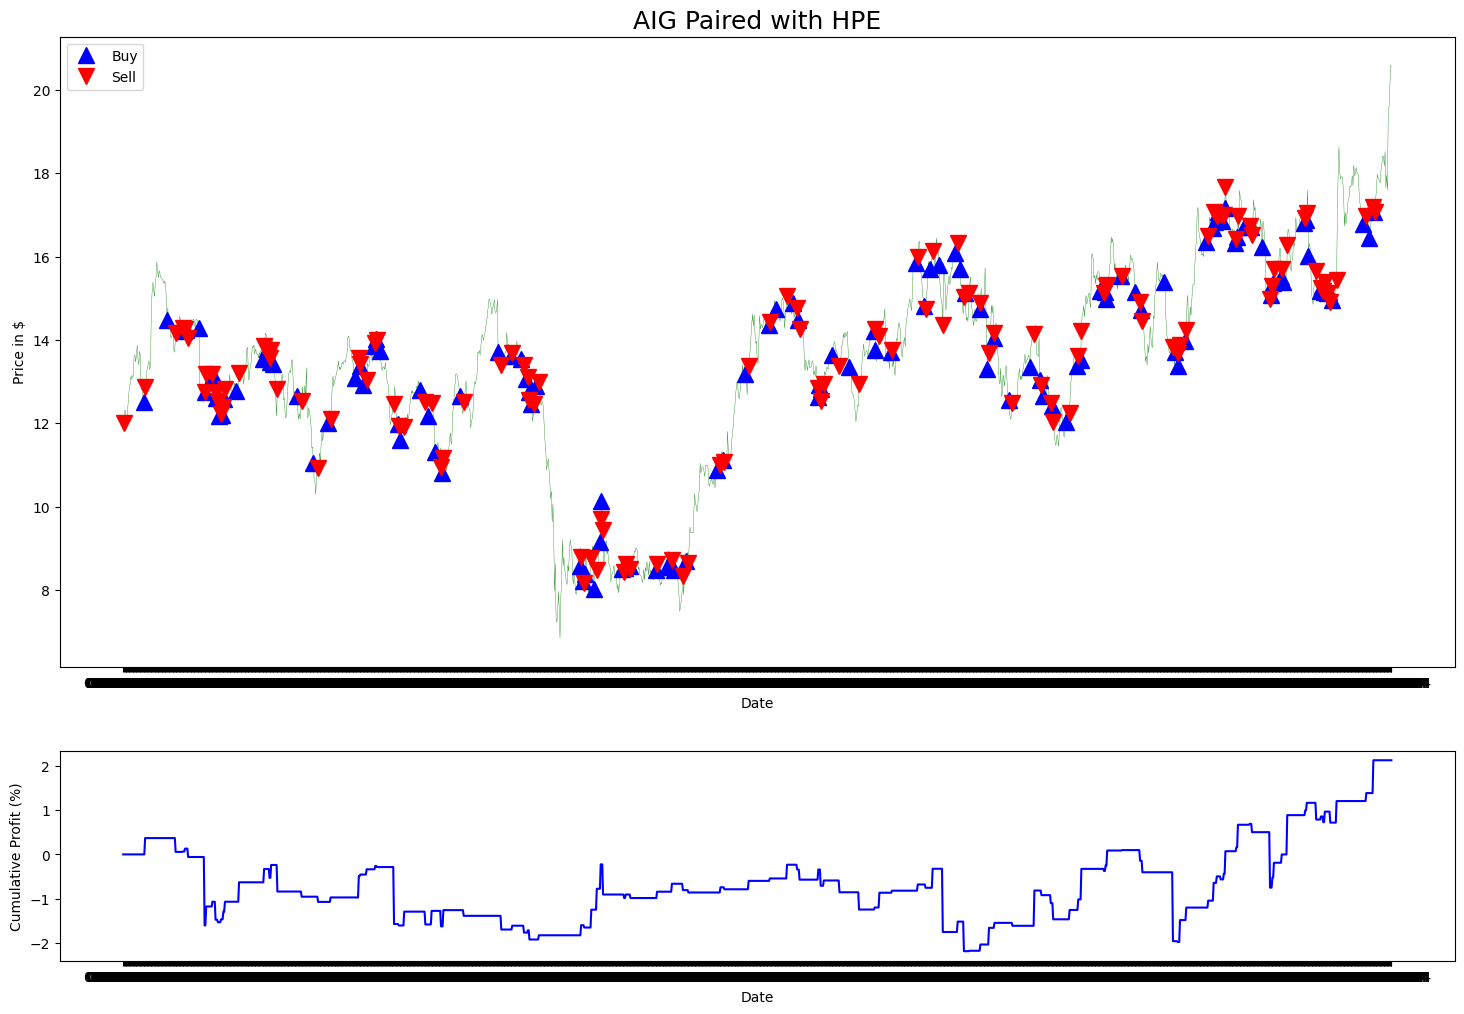

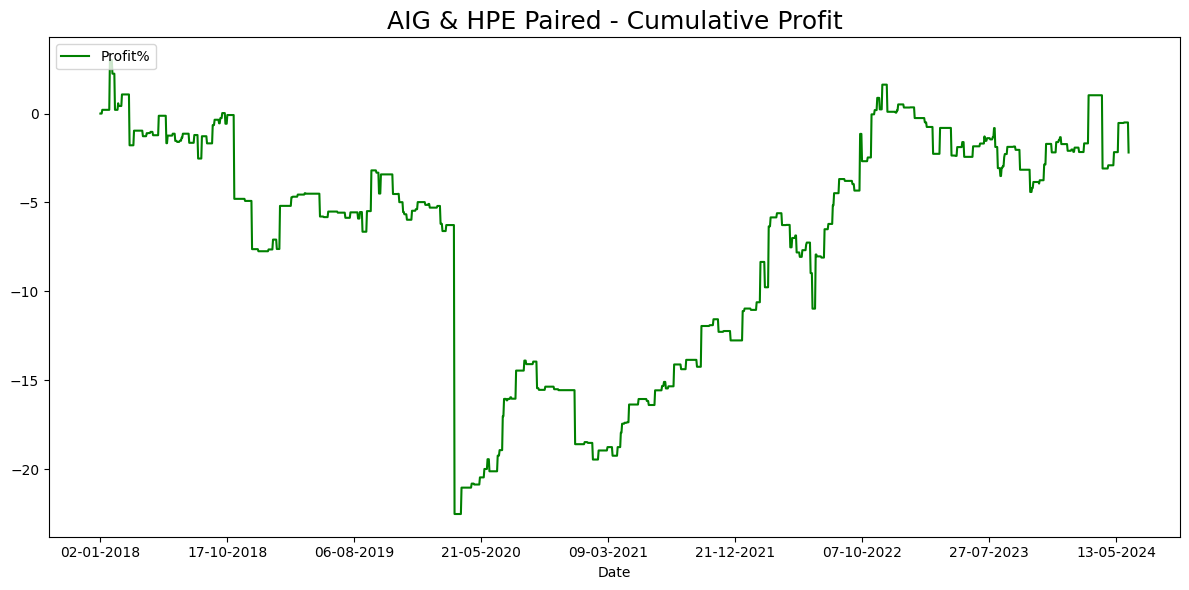

Invested Amount: $10000
Final Cumulative Profit: -2.1889220250000303%
Total Return: $9781.107797499997
Profit for pair AIG and HPE: $9781.107797499997


<Figure size 2600x1800 with 0 Axes>

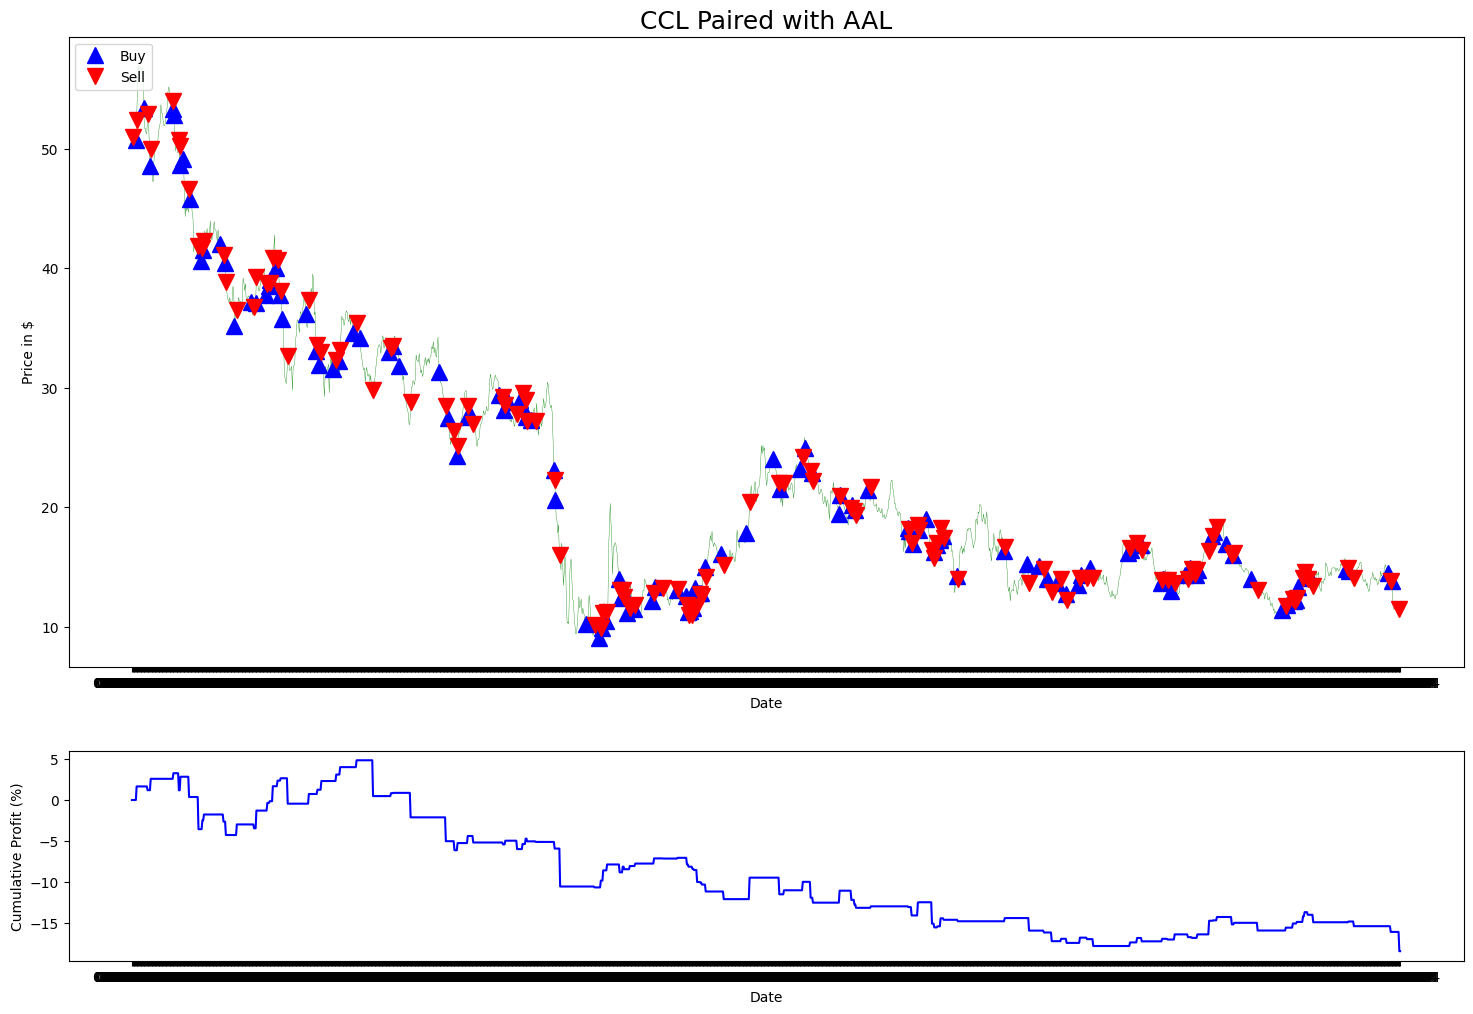

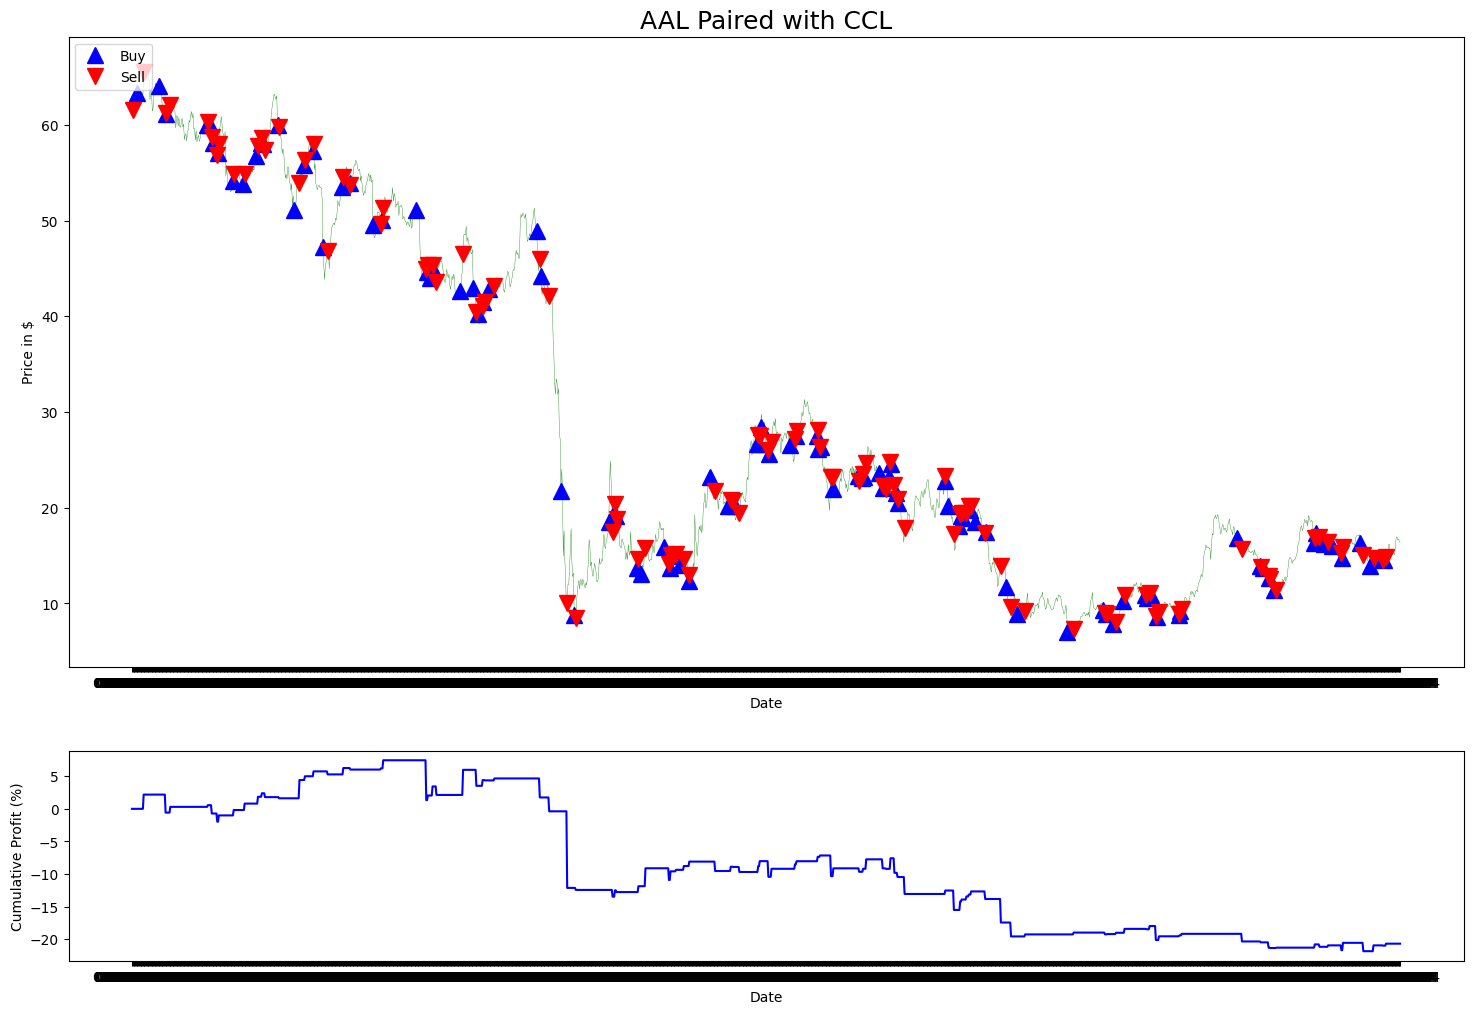

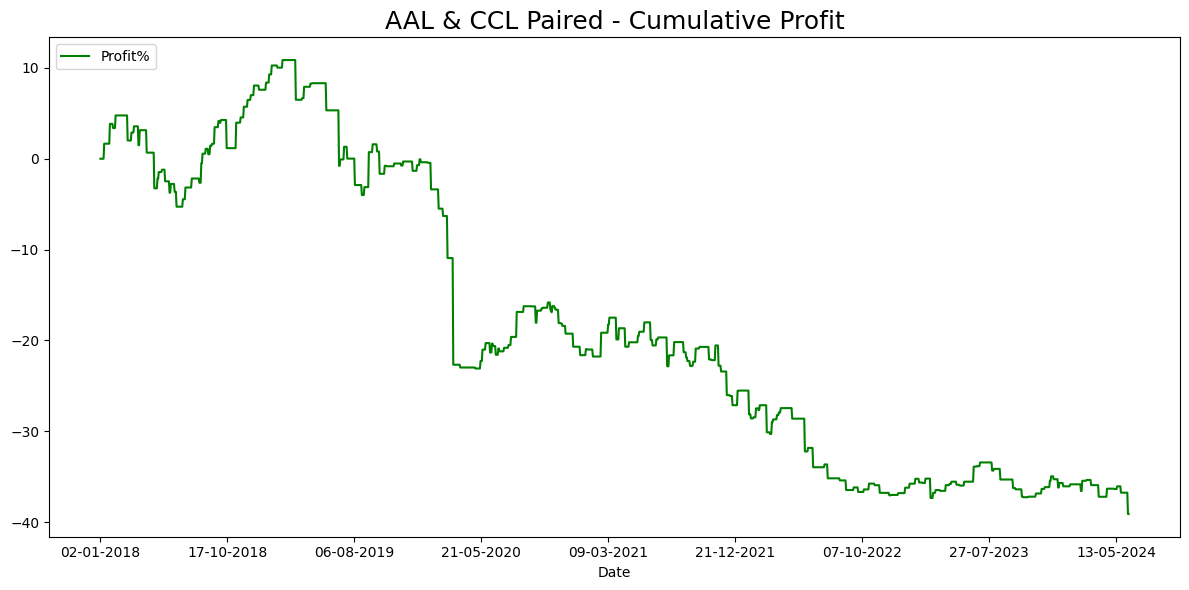

Invested Amount: $10000
Final Cumulative Profit: -39.11612800499998%
Total Return: $6088.387199500003
Profit for pair AAL and CCL: $6088.387199500003


<Figure size 2600x1800 with 0 Axes>

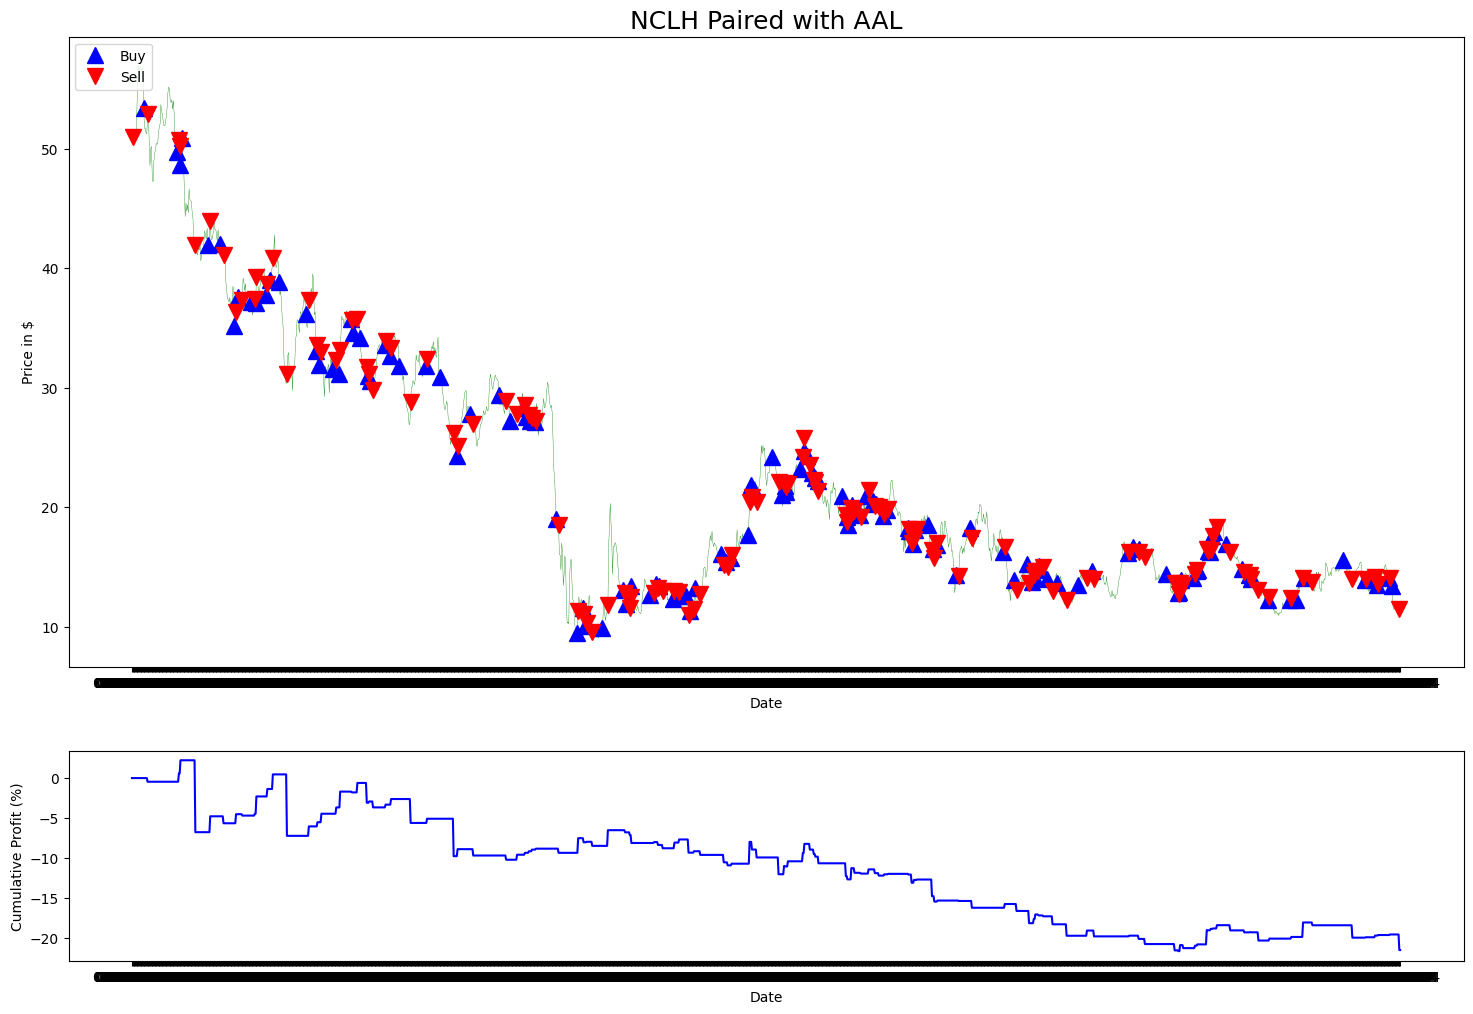

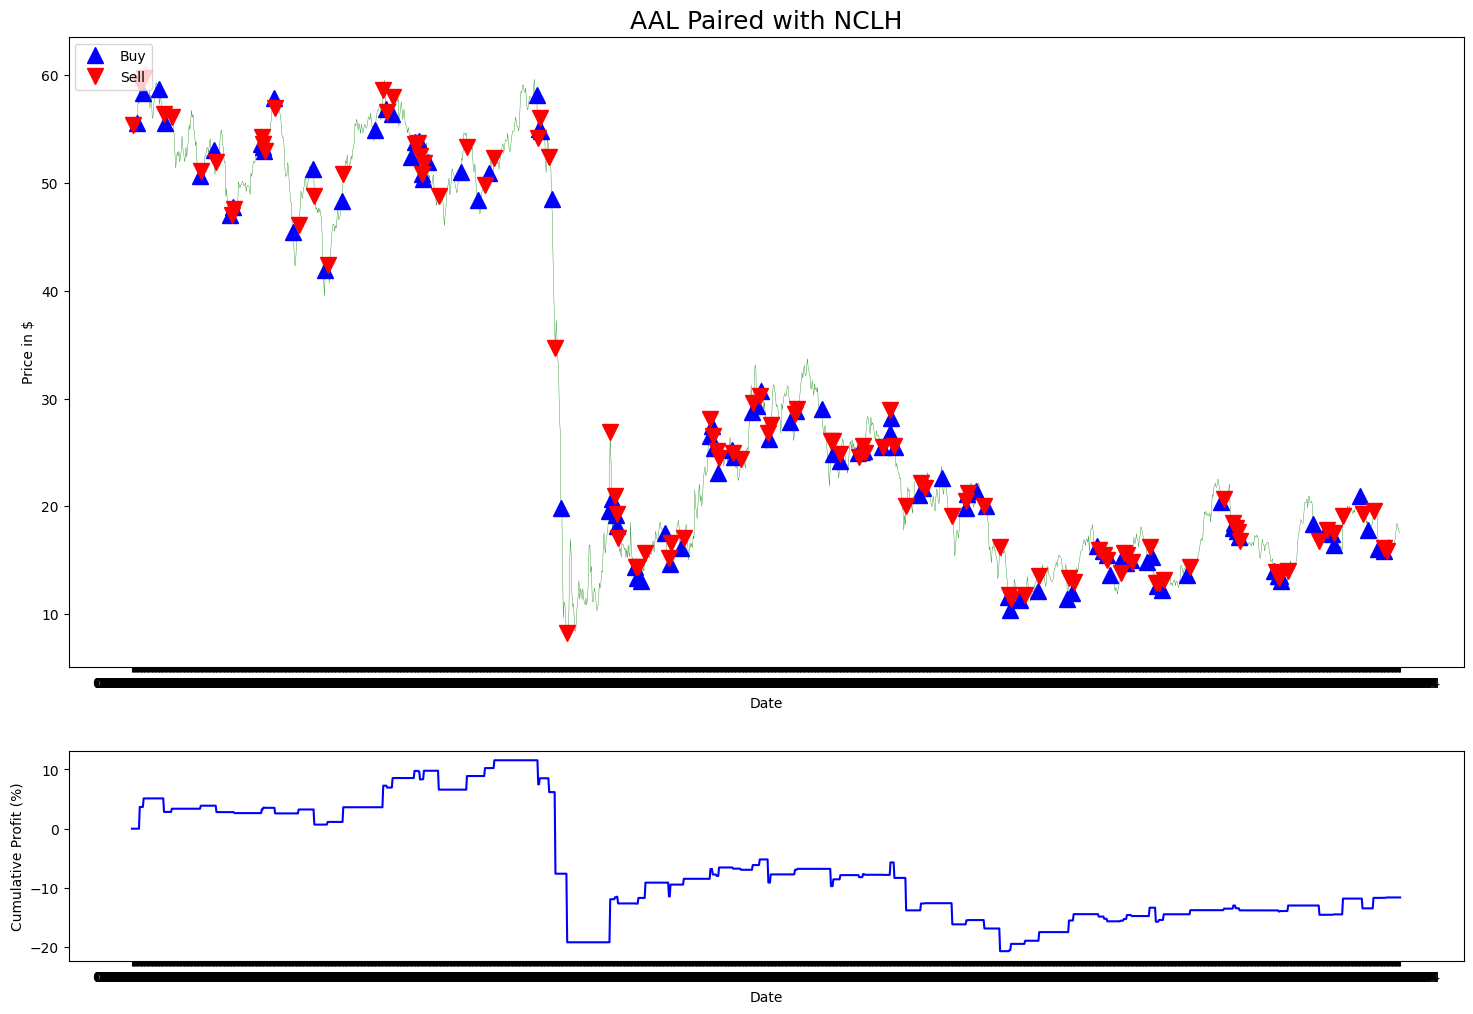

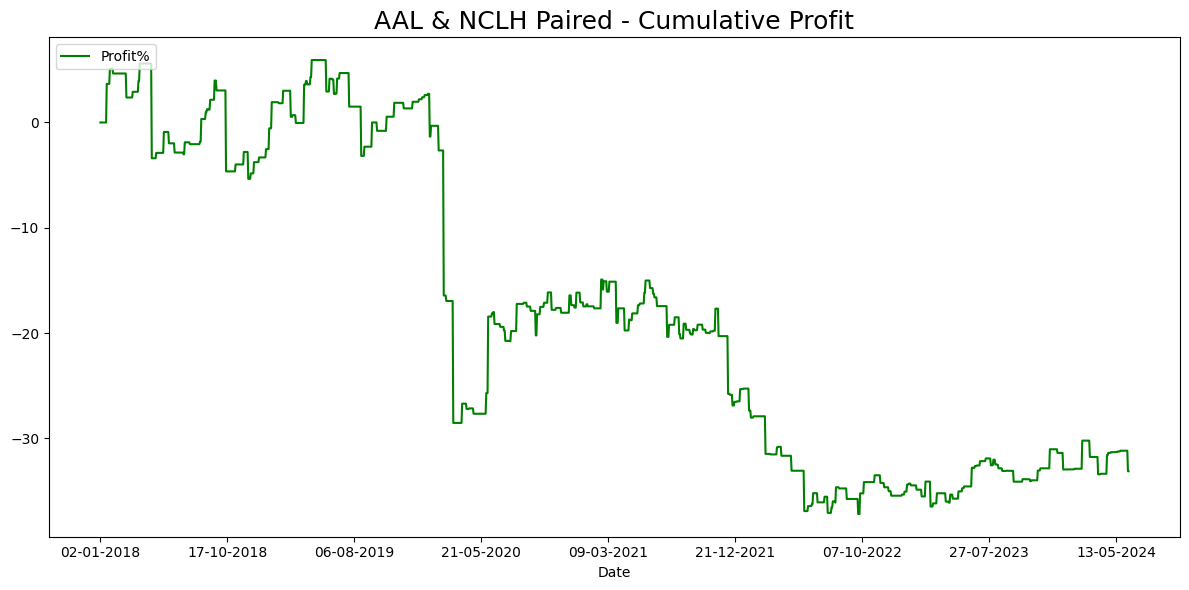

Invested Amount: $10000
Final Cumulative Profit: -33.11625295199997%
Total Return: $6688.374704800003
Profit for pair AAL and NCLH: $6688.374704800003


In [82]:
for i in range(0, len(pairs)):
    pair = pairs[i]
    profit = portfolio_analysis(pair[0], pair[1], data1, 10000)
    print(f"Profit for pair {pair[0]} and {pair[1]}: ${profit}")

In [62]:
data1.head()

A        AAL       AAPL       ABBV        ABT       ACGL  \
Date                                                                           
02-01-2018  64.520721  51.647564  40.615883  73.593399  52.570995  29.433332   
03-01-2018  66.162399  51.014027  40.608822  74.745018  52.687248  29.459999   
04-01-2018  65.666092  51.335663  40.797440  74.318787  52.597839  29.570000   
05-01-2018  66.715988  51.316174  41.261929  75.612534  52.749847  29.453333   
08-01-2018  66.859138  50.809349  41.108669  74.401054  52.597839  29.456667   

                   ACN        ADBE        ADI        ADM  ...         WTW  \
Date                                                      ...               
02-01-2018  139.834564  177.699997  79.776627  33.472794  ...  134.380692   
03-01-2018  140.479965  181.039993  80.766319  33.213963  ...  136.894821   
04-01-2018  142.143387  183.220001  80.677963  33.773376  ...  138.284347   
05-01-2018  143.315918  185.339996  81.004906  33.547935  ...  139.171158   
08-01-2018  144.461182  185.039993  81.146309  33.472794  ...  138.421570   

                   WY        WYNN        XEL        XOM        XYL        YUM  \
Date                                                                            
02-01-2018  27.040955  152.771881  39.708061  62.133781  62.936836  72.576637   
03-01-2018  27.278423  151.116775  39.442299  63.354099  63.704231  72.514397   
04-01-2018  27.056274  151.934998  39.134991  63.441780  64.129547  73.252594   
05-01-2018  27.017979  152.948532  38.860920  63.390625  64.009346  73.679520   
08-01-2018  27.194164  150.912201  39.151608  63.675602  64.240479  73.804039   

                   ZBH        ZBRA        ZTS  
Date                                           
02-01-2018  114.772141  103.709999  68.611481  
03-01-2018  115.567757  105.769997  68.926956  
04-01-2018  115.401237  107.860001  69.338058  
05-01-2018  116.548386  109.540001  70.131516  
08-01-2018  116.770416  110.629997  70.972794  

[5 rows x 485 columns]

In [79]:
def calculate_returns_for_pairs(pairs, data_sanitized, invested_amount):
    returns_list = []

    for pair in pairs:
        ticker1, ticker2 = pair
        
        AAVE_ts = data_sanitized[ticker1]
        C_ts = data_sanitized[ticker2]
        
        signals_df1 = signals_zscore_evolution(AAVE_ts, C_ts)
        profit_df1 = calculate_profit(signals_df1, AAVE_ts)

        signals_df2 = signals_zscore_evolution(AAVE_ts, C_ts, first_ticker=False)
        profit_df2 = calculate_profit(signals_df2, C_ts)
        
        cumulative_profit_combined = profit_df1 + profit_df2

        # Calculate final return
        final_cumulative_profit = cumulative_profit_combined.iloc[-1]
        total_return = invested_amount + (invested_amount * final_cumulative_profit / 100)
        
        returns_list.append({'Pair': f'{ticker1}-{ticker2}',
                             'Final Cumulative Profit %': final_cumulative_profit,
                             'Total Return': total_return})
    
    return returns_list

returns_list = calculate_returns_for_pairs(pairs, data1, 10000)

In [81]:
returns_df = pd.DataFrame(returns_list)
returns_df

Pair  Final Cumulative Profit %  Total Return
0       A-DGX                 626.560993  72656.099276
1       A-HON                  91.467761  19146.776142
2       A-IEX                 824.701778  92470.177849
3       A-KDP                 455.103624  55510.362393
4      A-NDAQ                  86.892297  18689.229738
5       A-NSC                  62.341725  16234.172511
6       A-TXN                 122.713791  22271.379125
7    AAPL-LOW                  77.923913  17792.391327
8   AAPL-MCHP                 119.061007  21906.100668
9     AIG-HPE                  -2.188922   9781.107797
10    AAL-CCL                 -39.116128   6088.387200
11   AAL-NCLH                 -33.116253   6688.374705